<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/Trade%26Ahead_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Security: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting Google Drive to the notebook
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Unsupervised Learning/Project/stock_data.csv")

## Data Overview

In [ ]:
# Displaying first 5 rows of dataset
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
# View a random sample of the dataset
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [ ]:
data.shape

(340, 15)

- The dataset has 340 rows and 15 columns
- The dataset contains information (15 attributes) about the 340 stocks

In [ ]:
# Checking data types of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 11 numeric (float and int type) and 4 string (object type) columns in the dataset

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

- There are no duplicates in the dataset

In [ ]:
# Checking missing values of dataset
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no missing values in the dataset

In [ ]:
# Looking at Statistical Summary of Dataset
data.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

- There are 11 different GICS sectors and industrial is the most prevelant by ~16%
- Current Price of stocks varies from 4.5 to 1274.95
- Price Change for the past 13-weeks is positive for majority of stocks
- Volitility in these stocks for the past 13 weeks is relatively low, but there seems to be some high outliers based on the difference between Q3 and max
- ROE has a big difference between Q3 and max indicating some high outliers, meaning some stocks did quite well during this time period
- Cash Ratio varies from 0 to 958
- Net Cash Flow and Net Income both have very large ranges, indicating some stocks are doing very well and others not so much by beng in the negatives
- Earnings per share show at least 75% of the stocks are profiting
- Estimated Shares Outstanding and P/E Ratio are highly right skewed or has extreme high outliers becaue the mean is above Q3

In [ ]:
# Creating a copy of the dataset to avoid changes to original dataset
df = data.copy()

## Exploratory Data Analysis (EDA)

These are a few of the questions that will be answered through the EDA process

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Functions to Create Plots

In [ ]:
# Creating function to plot boxplots and histograms on the same x-scale

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots

# To create a boxplot with a triangle indicating the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

# To create a histogram
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

# Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

# Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [ ]:
# Creating function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

##Univariate Analysis

### GICS Sector

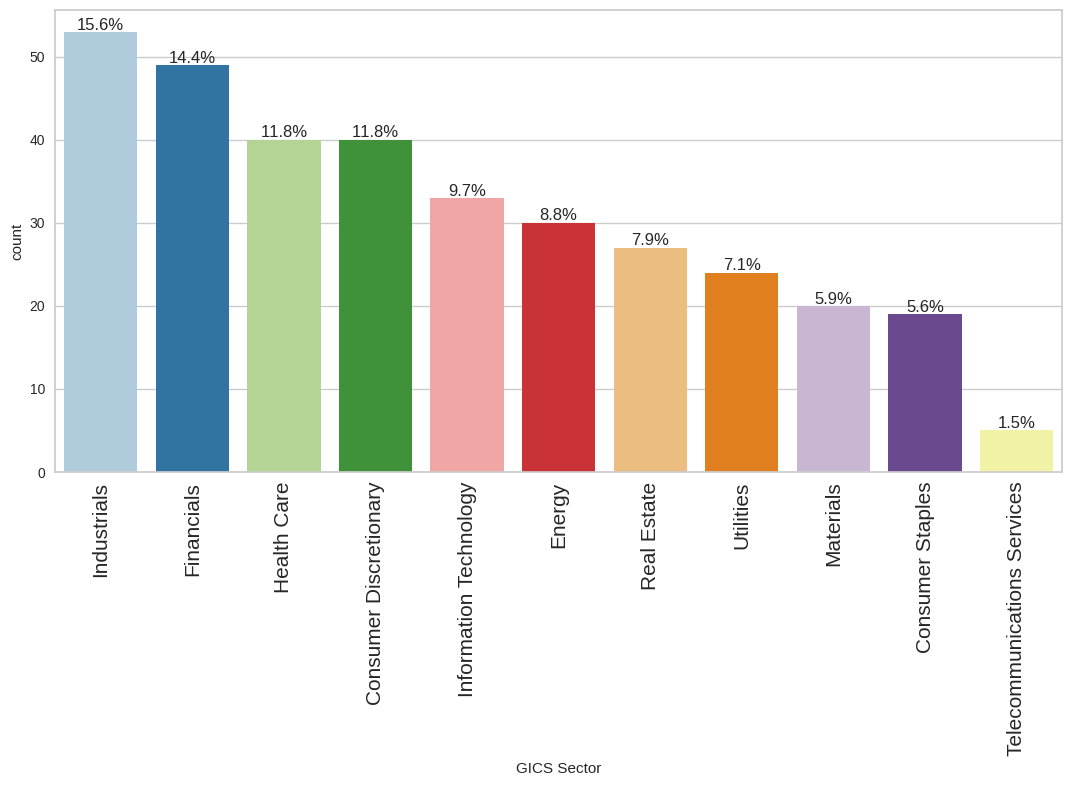

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

- Industrials is the largest percent of these stocks with 15.6%, while Telecommunciations Services is the least with 1.5%

### GICS Sub Industry

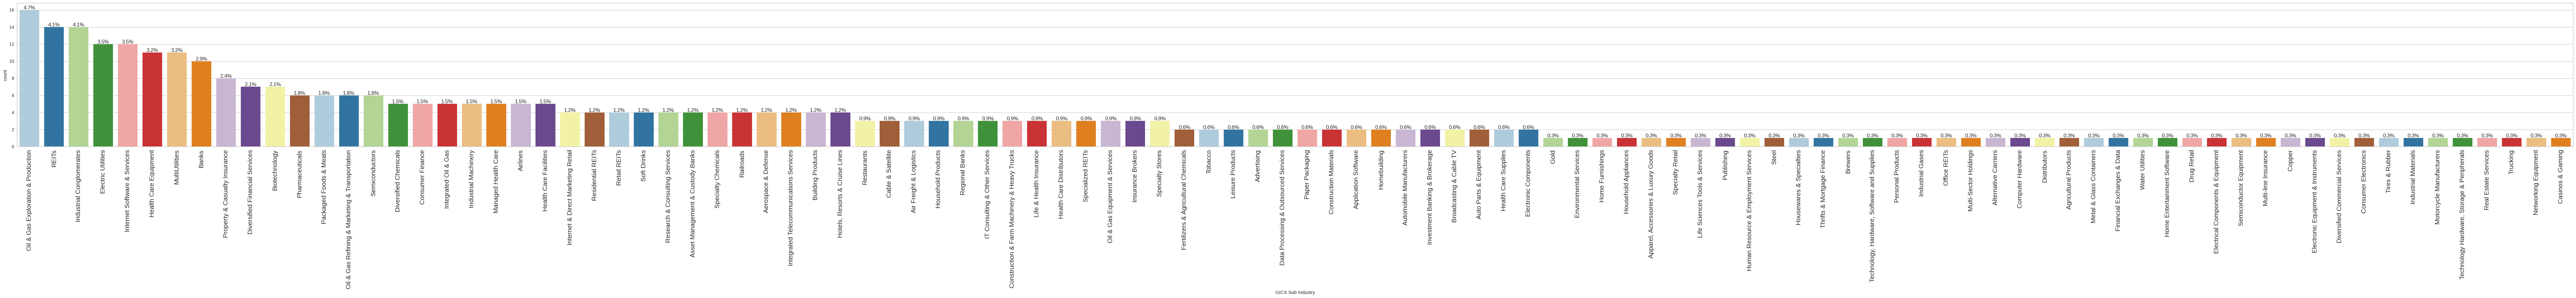

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

- There are three GICS Sub Industries that make up more than 4% of the stocks and they are: Oil & Gas Exploration and Production, REITs, and Industrial Conglomerates
- There are 42 GICS Sub Industries that make up .3% of these stocks

###Current Price

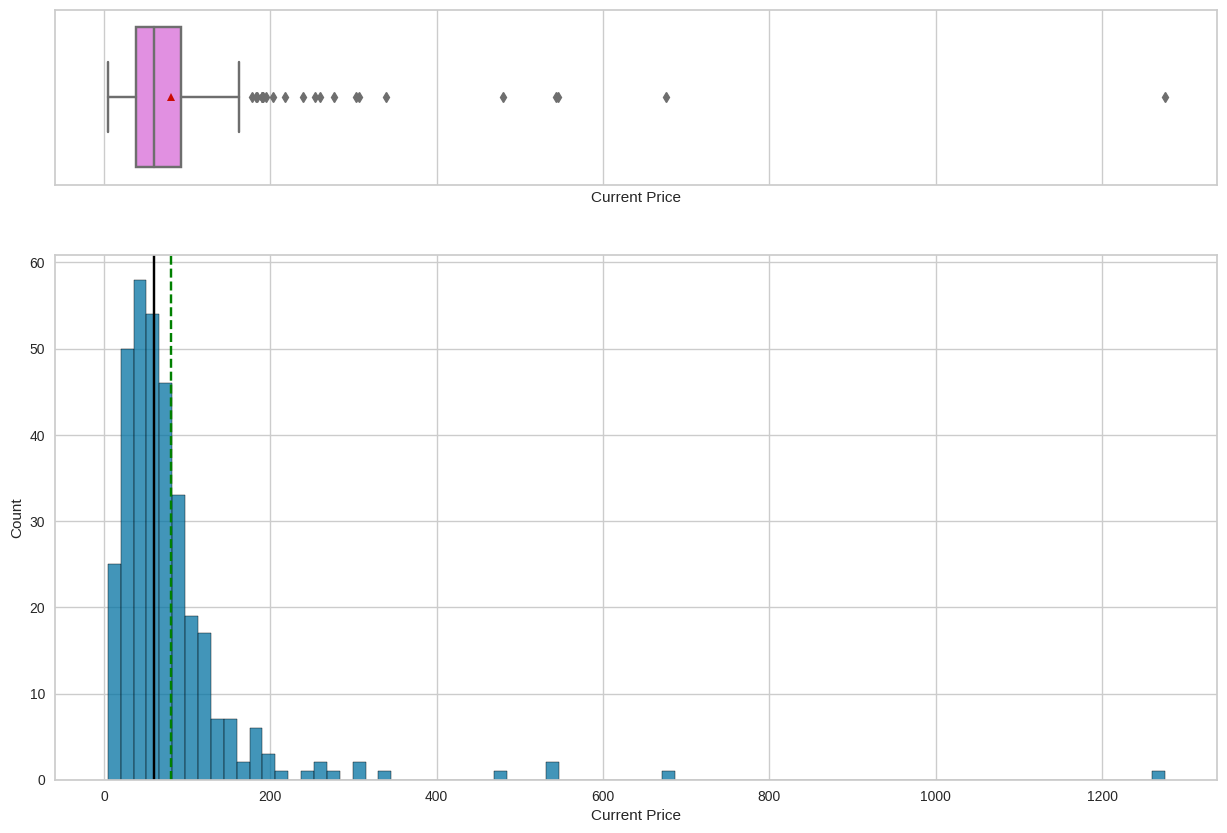

In [ ]:
histogram_boxplot(df, 'Current Price')

- Current Price has a median of ~59.7, IQR of ~56, right skewed distribution with high outliers and one extremely high outlier of ~1275, when the next one is less than 700.

### Price Change

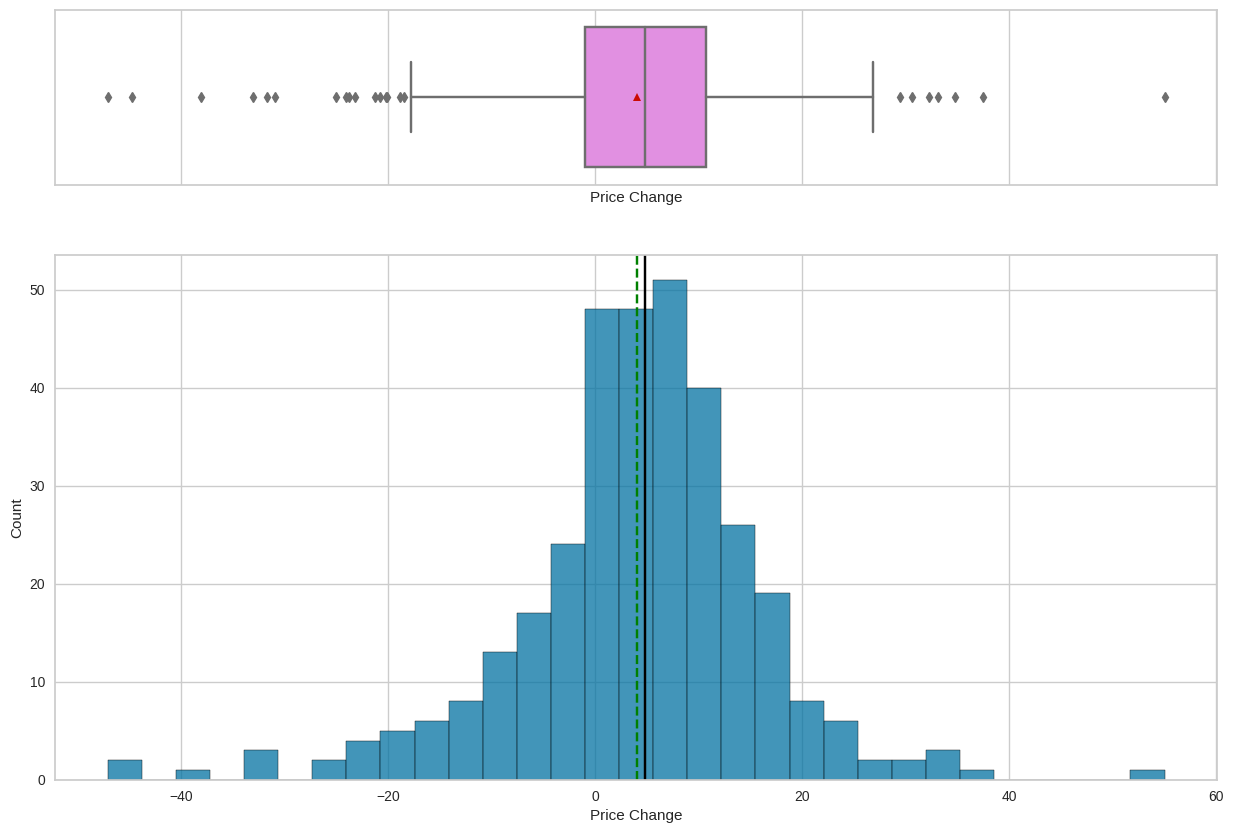

In [ ]:
histogram_boxplot(df, 'Price Change')

- Price change is approximately symmetrical, with a mean of ~4, a range of ~102, and low and high outliers

### Volatility

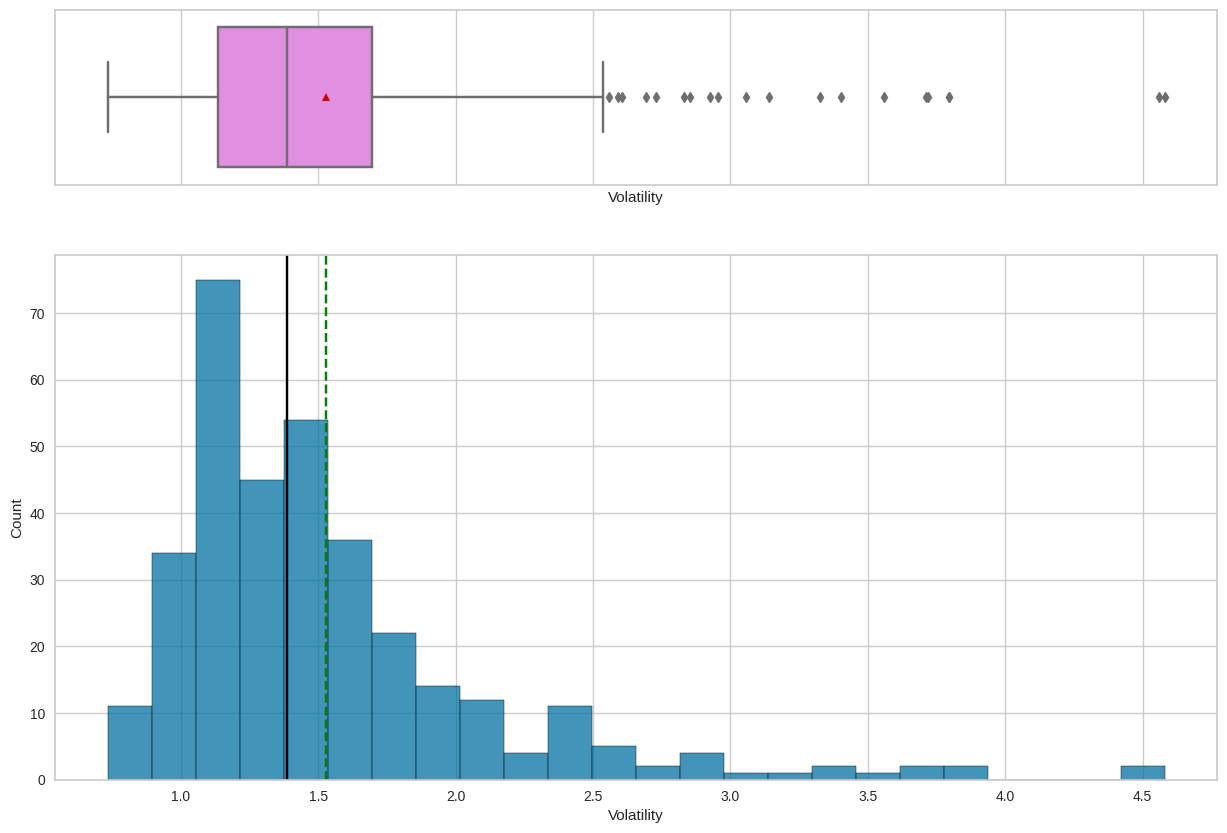

In [ ]:
histogram_boxplot(df, 'Volatility')

- Volititlity is right skewed, has high outliers, a median of ~1.4, and an IQR of ~.5

### ROE

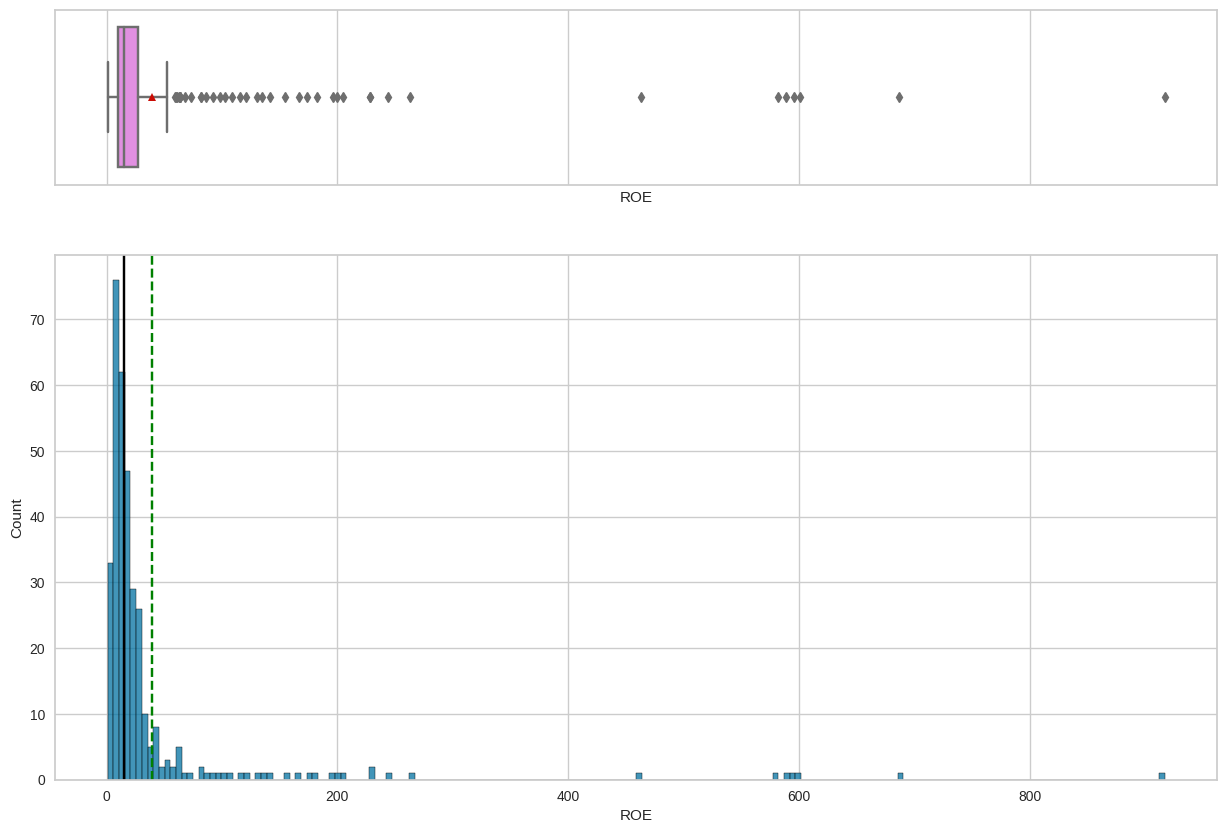

In [ ]:
histogram_boxplot(df, 'ROE')

- ROE is highly skewed right, median of 15, an IQR of ~17, a range of 916, and several high outliers.  The highest being 917, and there is a small cluster of outliers around 600.

### Cash Ratio

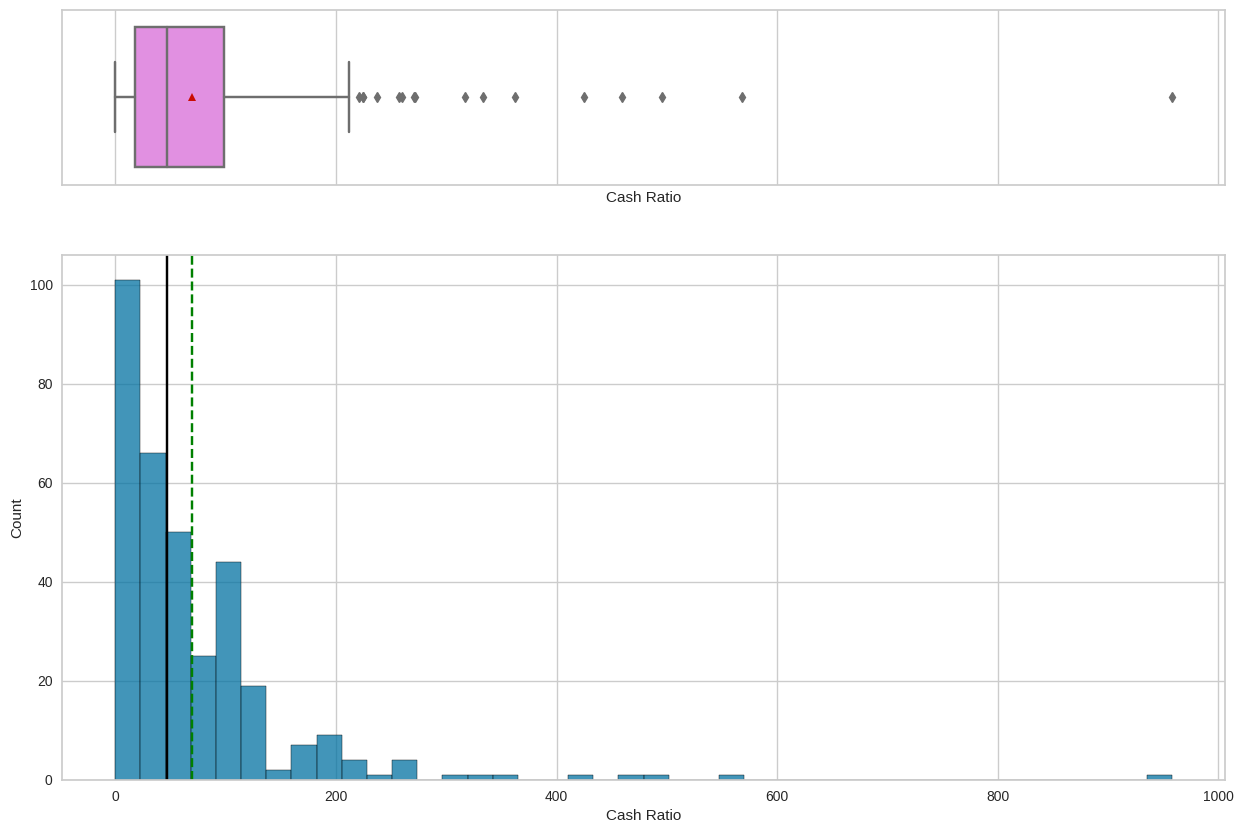

In [ ]:
histogram_boxplot(df, 'Cash Ratio')

- Cash Ratio is skewed right, median of 47, IQR of 81, a range of 958, and has a few high outliers.  The highest outlier being at 958, and is almost 300 away from the next outlier.

### Net Cash Flow

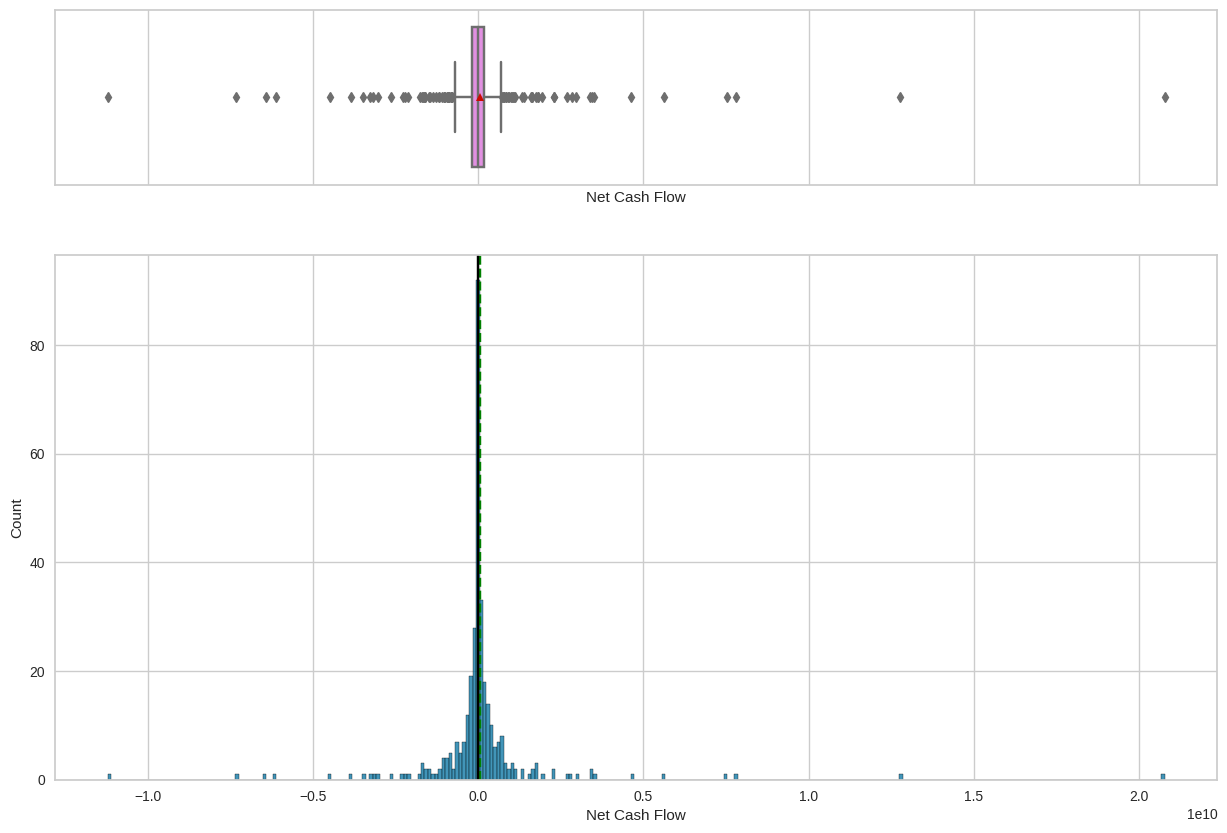

In [ ]:
histogram_boxplot(df, 'Net Cash Flow')

- Net Cash Flow is approximately symmetrical, has a mean of ~55million, a spread of about 30billion, and has several high and low outliers. There is one extremely high outlier over 20billion which is pulling the mean higher.

### Net Income

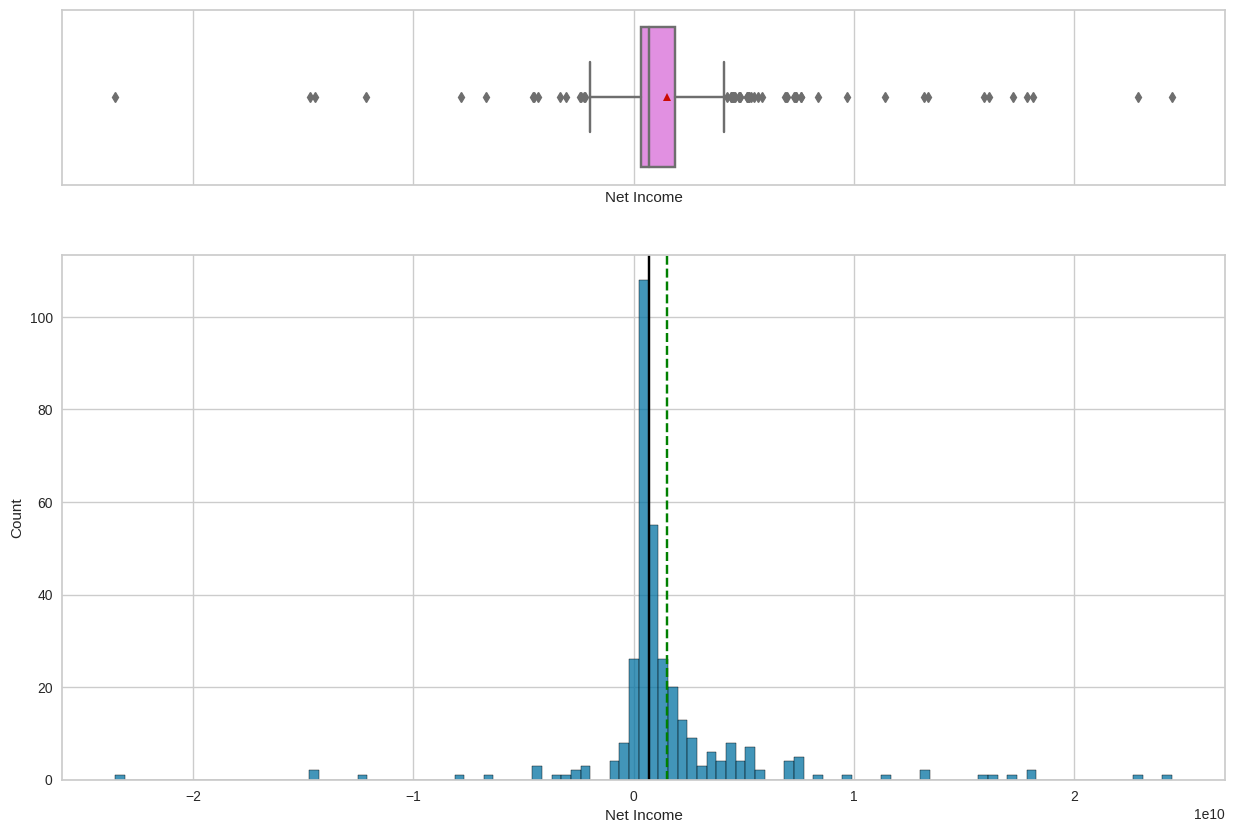

In [ ]:
histogram_boxplot(df, 'Net Income')

- Net income is slightly right skewed, has a mean of ~1.5billion, a range of ~47billion, and has low and high outliers

### Earnings Per Share

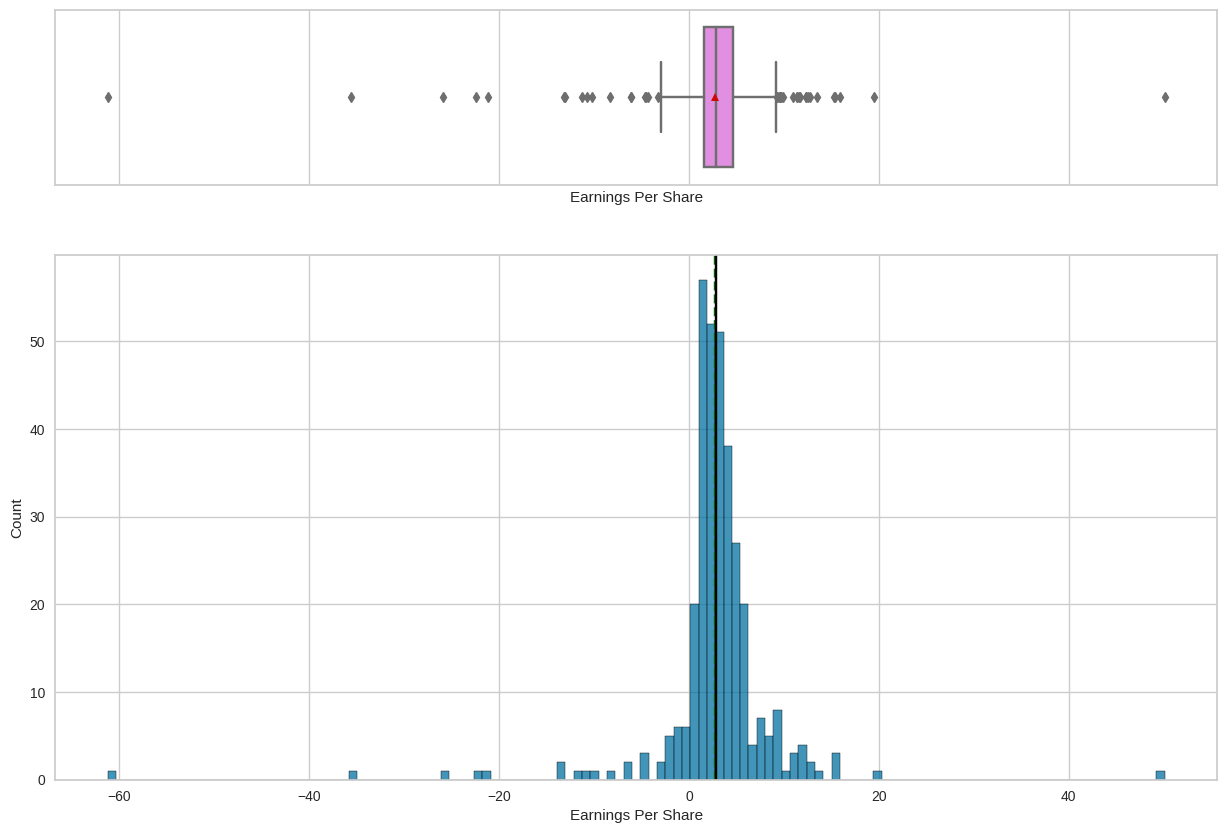

In [ ]:
histogram_boxplot(df, 'Earnings Per Share')

- Earnings per share is approximately symmetrical, with a mean of ~2.8, a range of ~110, and high and low outliers, the lowest outlier is at ~ -61, while the highest outlier is ~ 50.

### Estimated Shares Outstanding

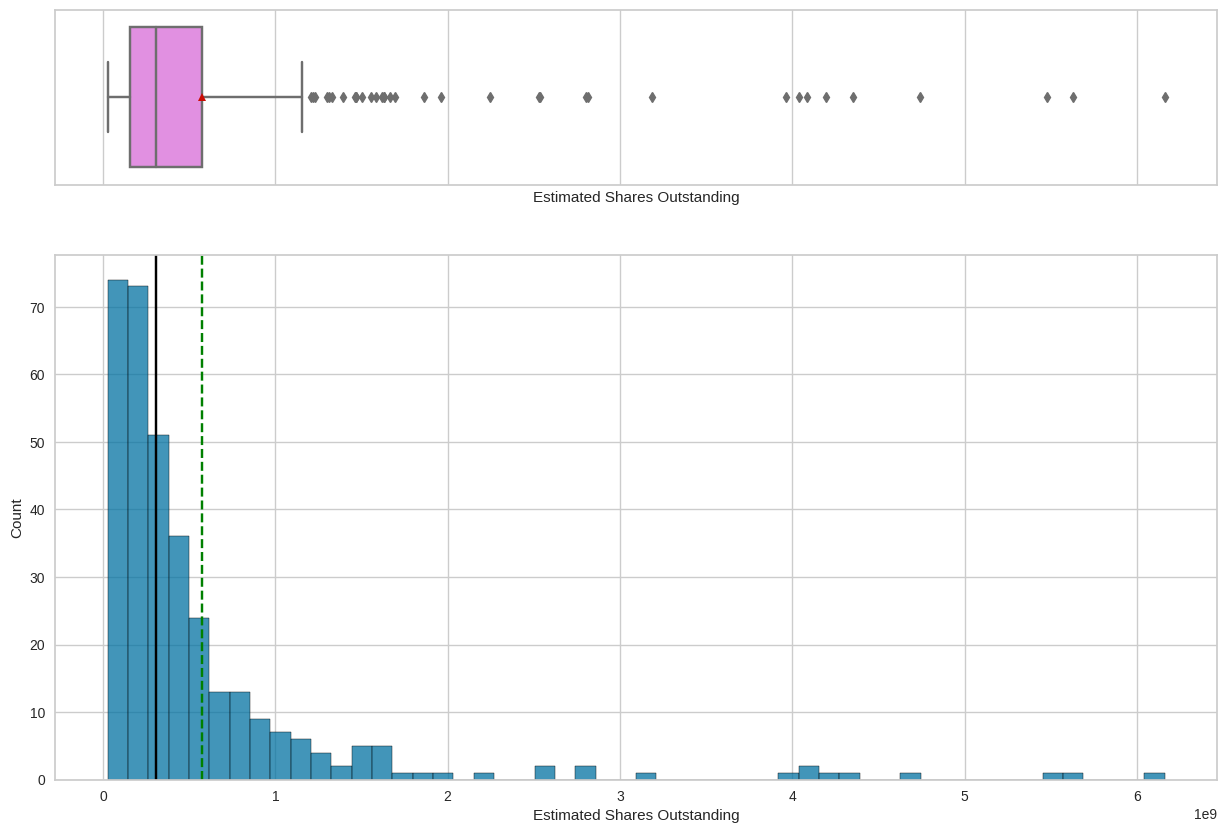

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

- Estimated Shares Outstanding is heavily right skewed, with a medain of ~309million, several high outliers the highest being over 6billion

### P/E Ratio

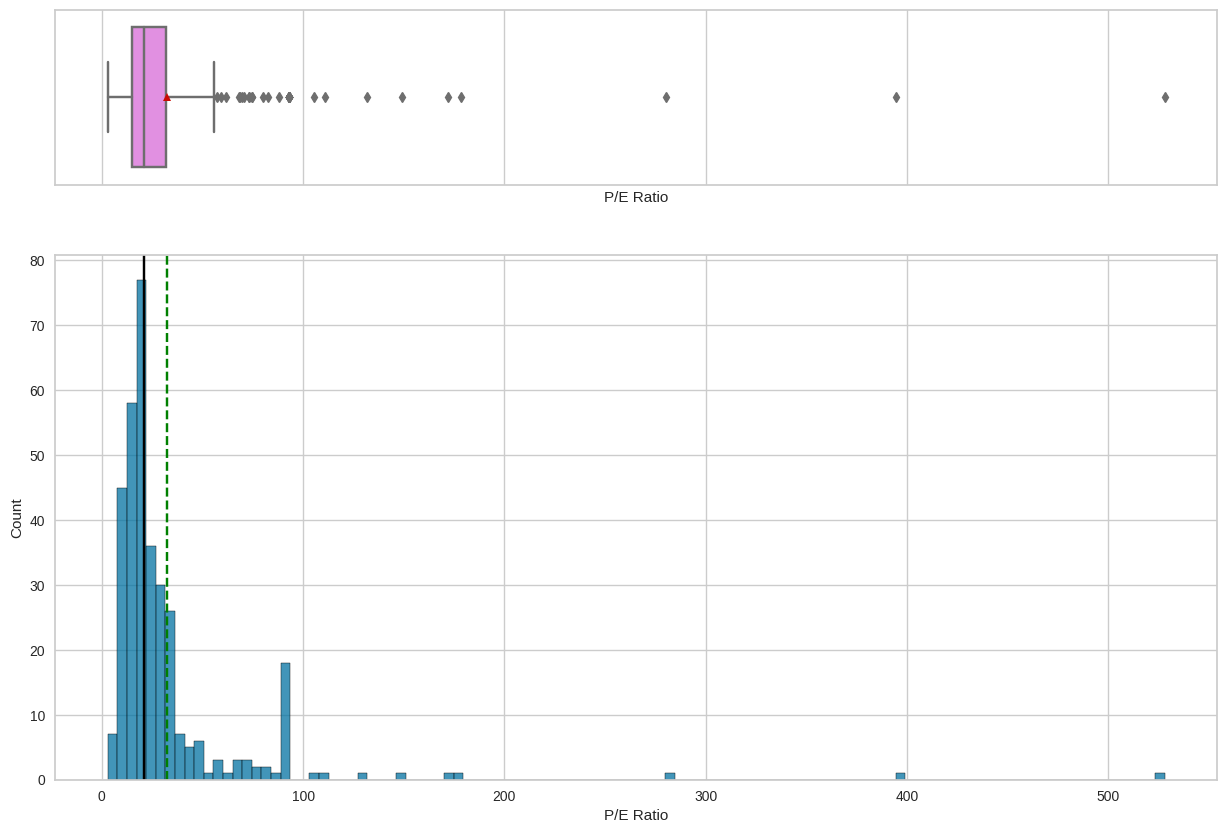

In [ ]:
histogram_boxplot(df, 'P/E Ratio')

- P/E Ratio is highly right skewed, median of ~21, a range of ~525, and several high outliers, the top three are ~528, ~390, and ~280.

### P/B Ratio

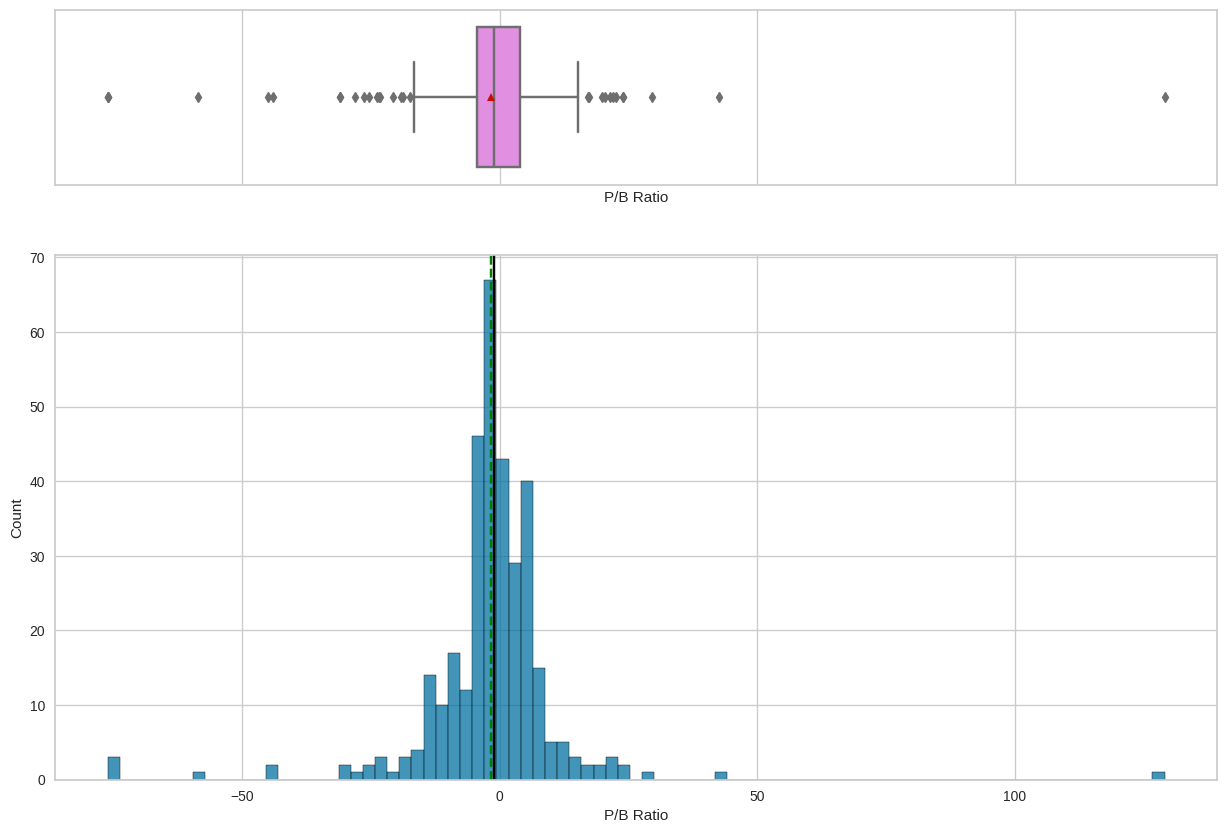

In [ ]:
histogram_boxplot(df, 'P/B Ratio')

- P/B Ratio is approximately symmetrical, has a median of ~ -1, a range of ~205, and has low and high outliers.  The lowest outlier is ~-76, and the highest outlier is ~129.  There is a large gap between the next highest outlier which is ~40.

## Bivariate Analysis

In [ ]:
#Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

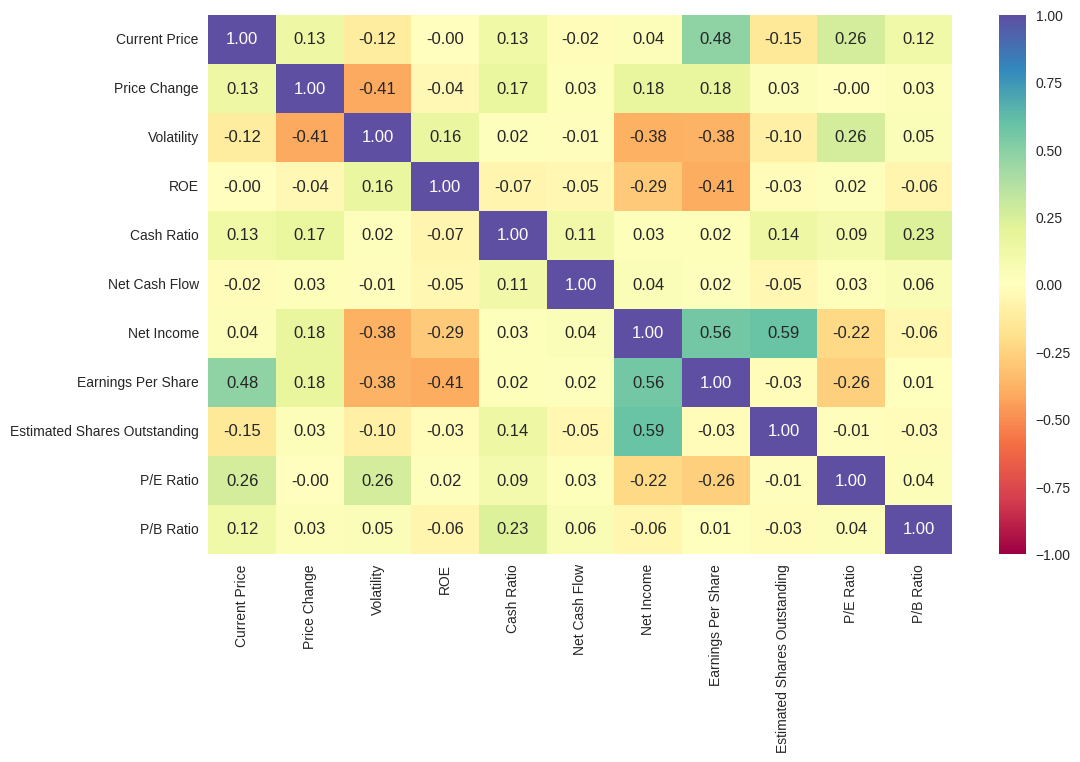

In [ ]:
#Creating heat map of numerical data
plt.figure(figsize=(12, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

- There is a moderate correlation between Estimated Shares Outstanding and Net Income (.59)
- There is a moderate correlation between Earnings Per Share and Current price (.48)
- There is a moderate correlation between Earnings Per Share and Net Income (.56)
- Earnings per share has a moderately weak correlation with Current Price (.48)
- Volitility has a weak negative correlation with Price Change, Net Income, and Earnings Per Share (-41, -38, -38 respectively). This makes sense if a stock is volitile then it will not generally perform well.

### GICS Sector vs other variables

####GICS vs Current Price

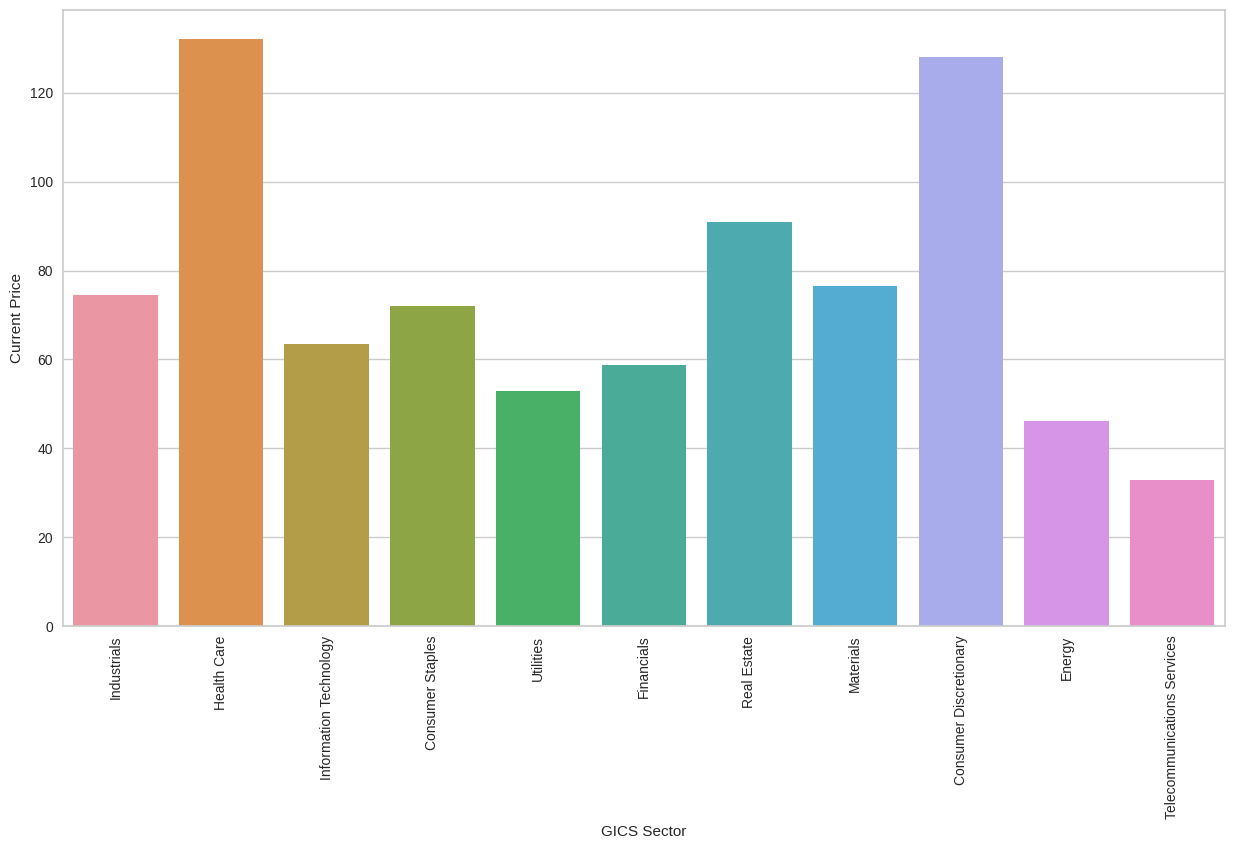

In [ ]:
#GICS vs Current Price
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Current Price', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

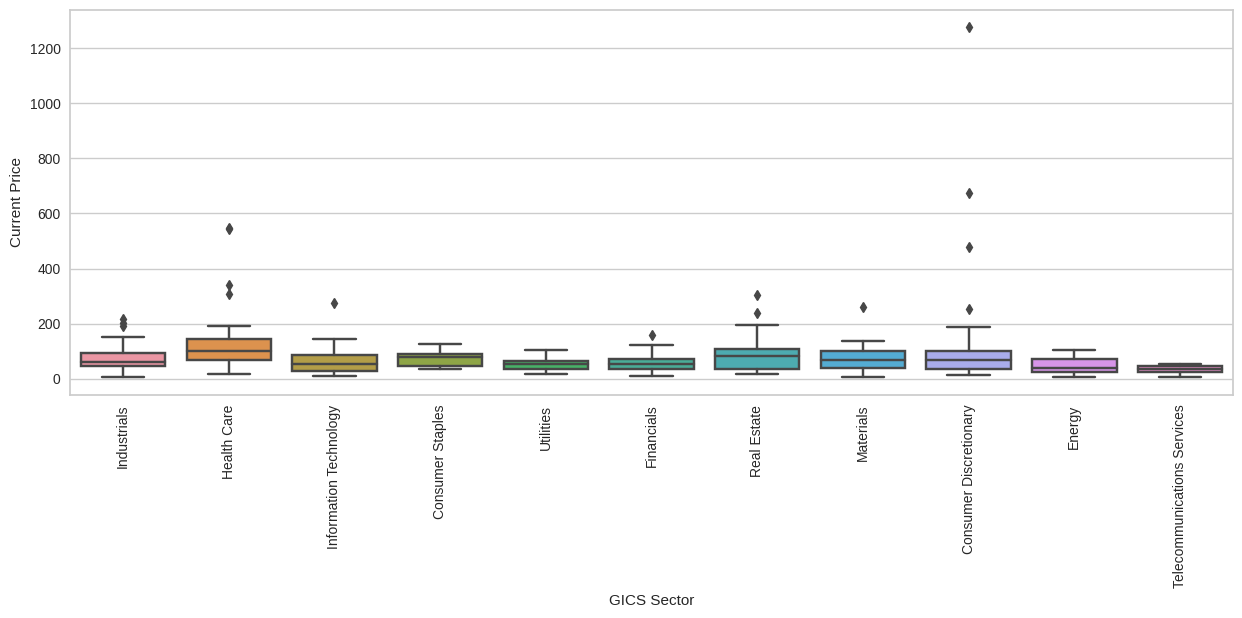

In [ ]:
# GICS Sector vs Current Price
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Current Price');
plt.xticks(rotation=90);

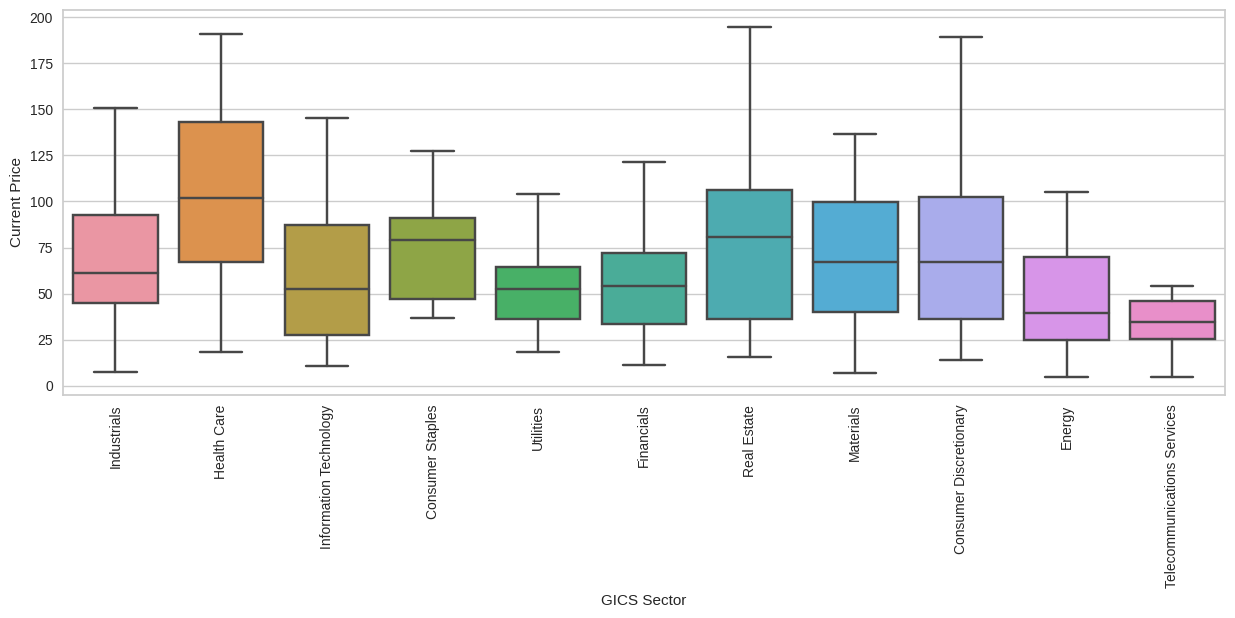

In [ ]:
# GICS Sector vs Current Price with no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Current Price', showfliers=False);
plt.xticks(rotation=90);

- Average Current Price
  - Health Care (135) is the highest followed by Consumer Discretionary (130)
  - Telecomunication Services has the lowest (~35)
- Consumer Distretionary is aveaged to be higher because of a few extreme high outliers. Without these few outliers it would be similar to Real Estate and Materials.
  - This also elicits how outliers can dramatically change the average
- Health Care has the highest median followed by Real Estate and Consure Staples

####GICS vs Price Change

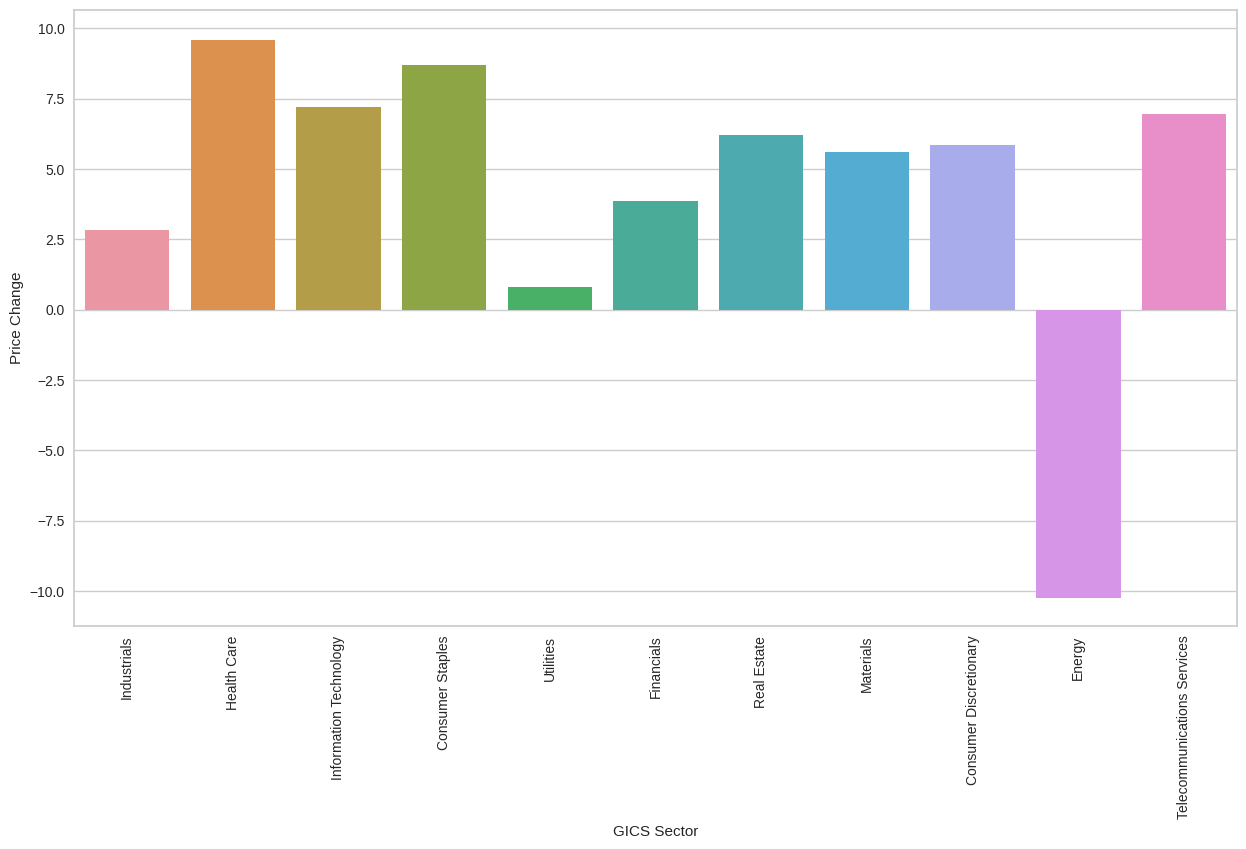

In [ ]:
#GICS vs Price Change
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

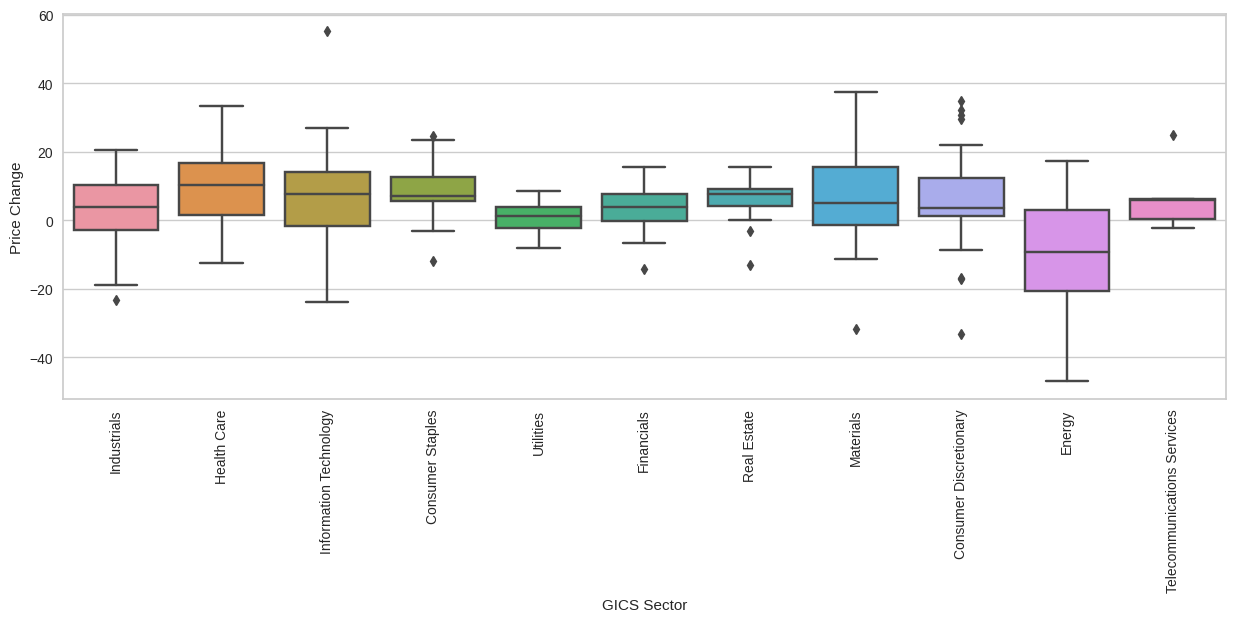

In [ ]:
# GICS Sector vs Price Change
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Price Change');
plt.xticks(rotation=90);

- Average Price Change
  - Health Care and Consumer Staples have the highest price change of approximately 9.5 and 8.5 respectively.
  - Energy has the lowest of approx. -10.2, and is the only sector to have a negative price change
- All sectors have some positive and negative change.  
- Information Technology has the highest variation and Utilities has the least (this is including otliers)
- The largest IQR is Energy and Real Estate has the smallest.  
-Excluding outliers, Real Estate is the only sector to have no negative price change.

####GICS vs Volatility

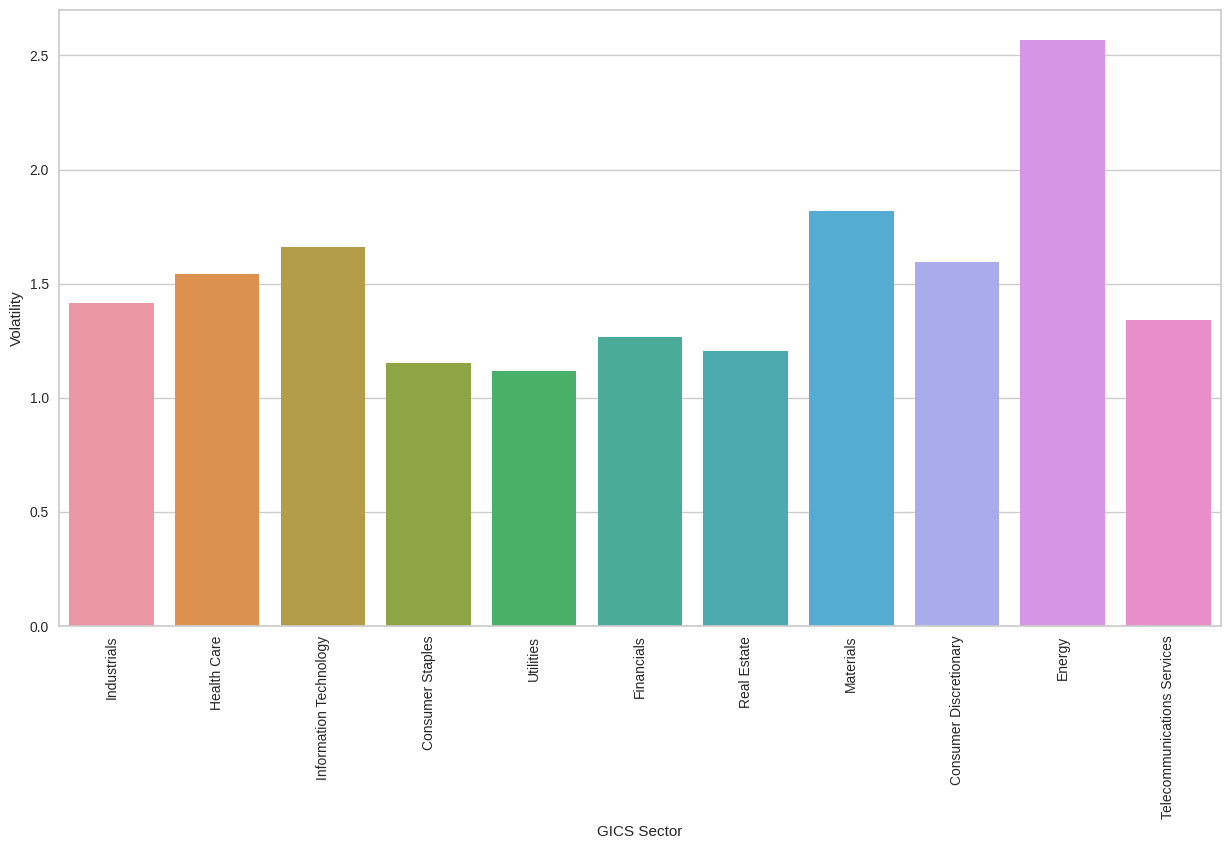

In [ ]:
#GICS vs Volatility
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

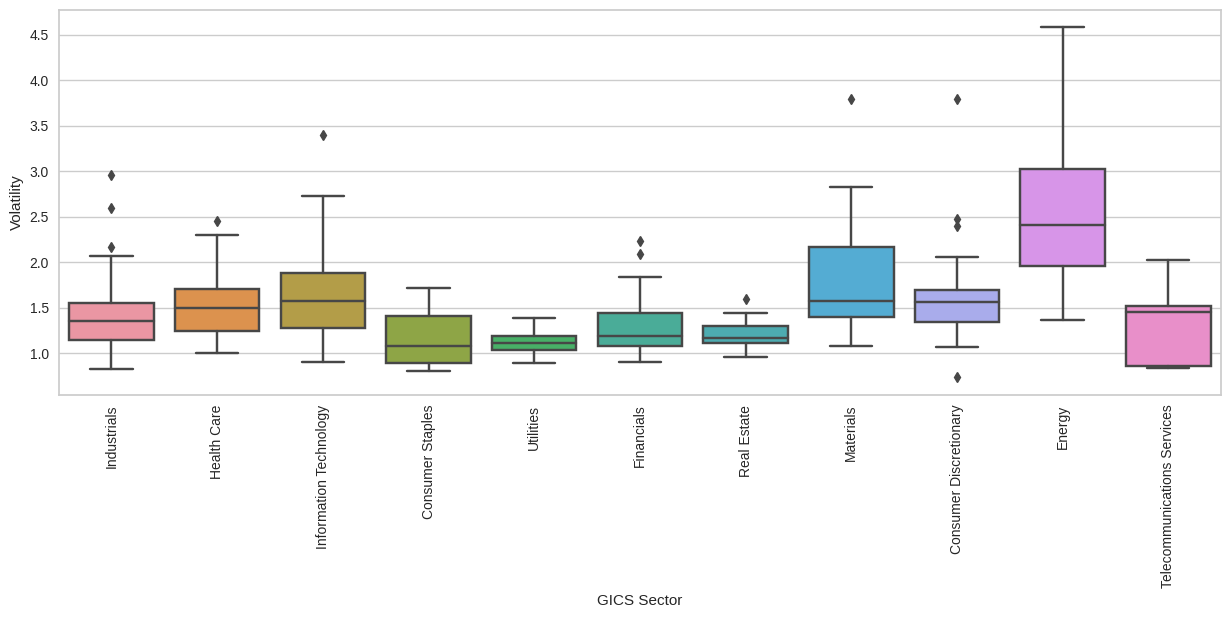

In [ ]:
# GICS Sector vs Volatility
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Volatility');
plt.xticks(rotation=90);

- Energy has the highest volitility and this is without having any outliers, and has the greatest range in volatility. This is showing Energy is a very volitile sector.
- Utilites has the least amount of variability in volatility
- Excluding Energy the median volatility for all sectors is between 1 and 2.

####GICS vs ROE

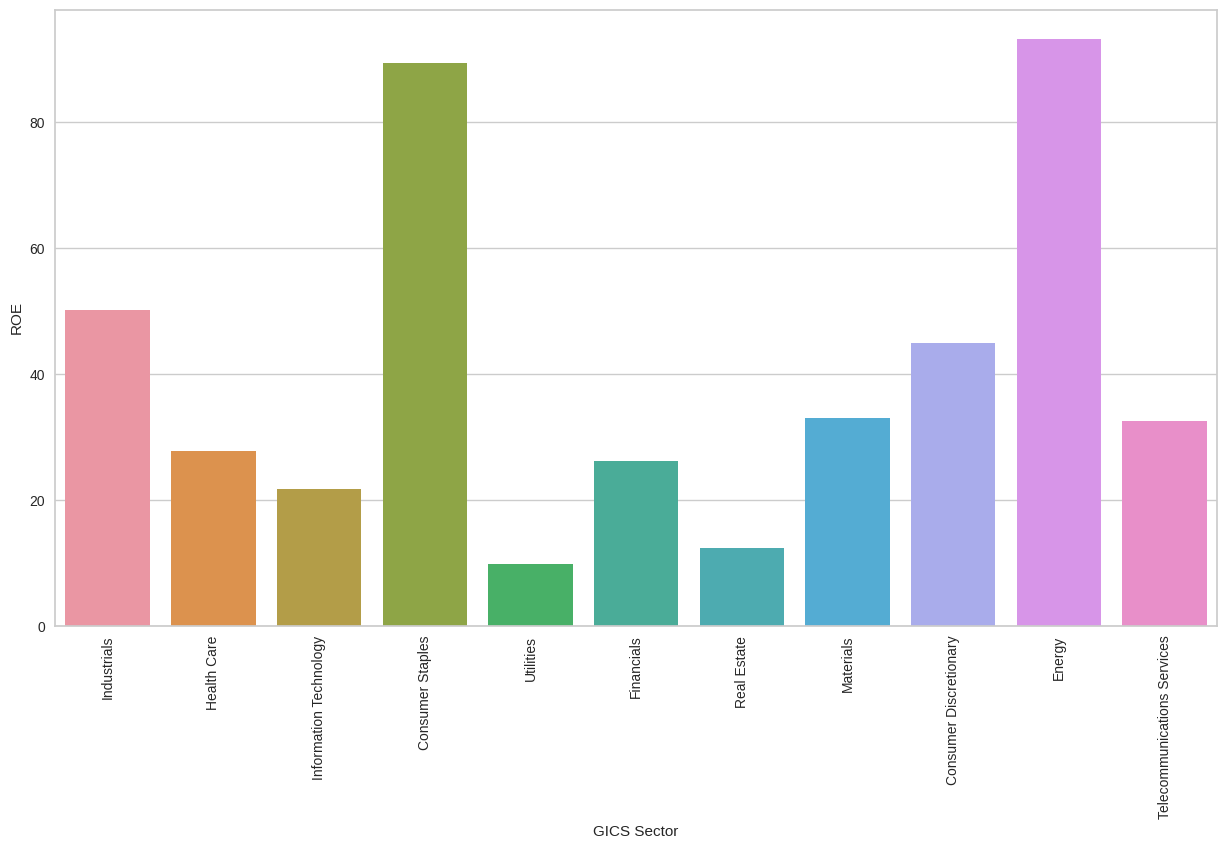

In [ ]:
#GICS vs ROE
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='ROE', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

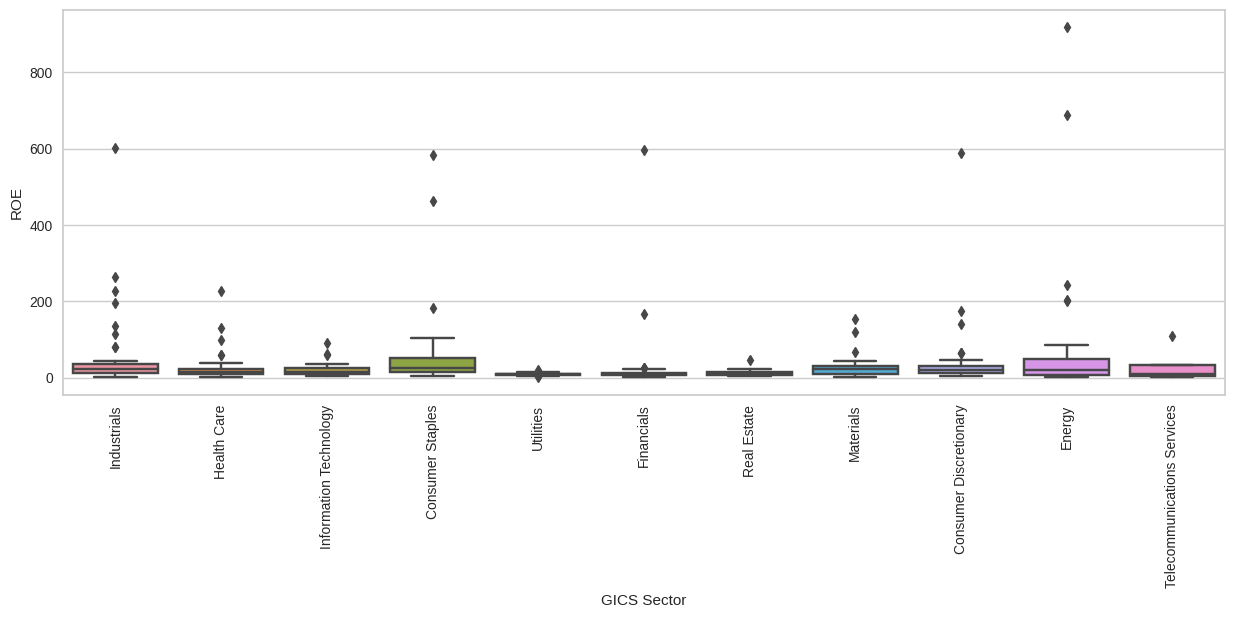

In [ ]:
# GICS Sector vs ROE
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='ROE');
plt.xticks(rotation=90);

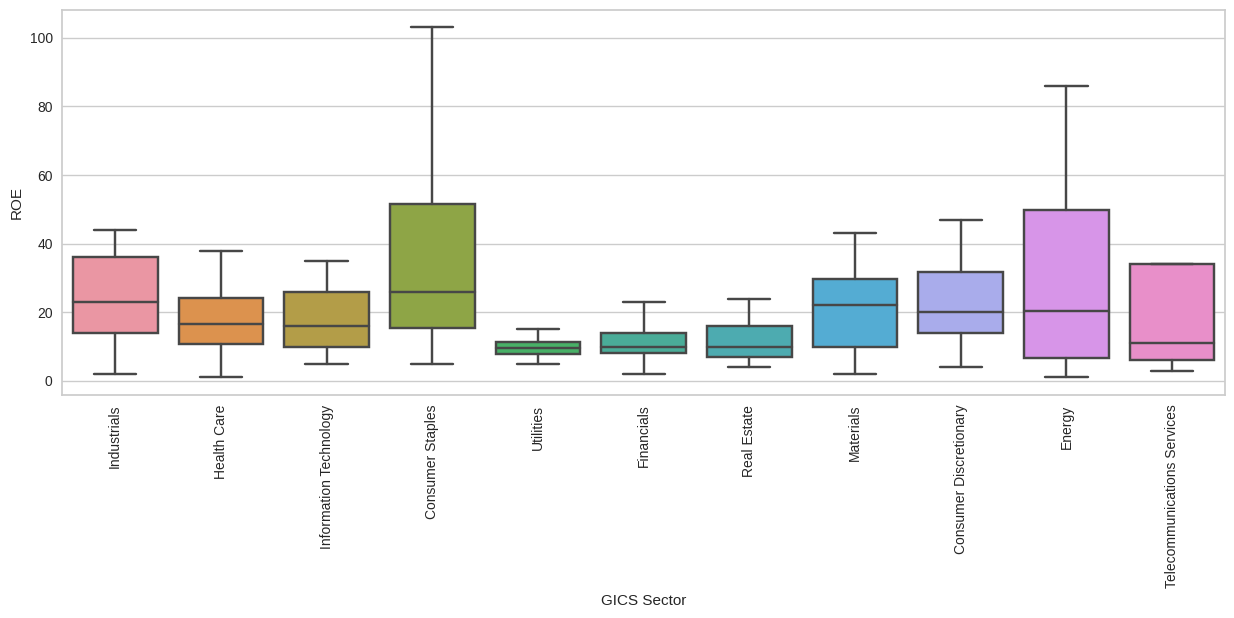

In [ ]:
# GICS Sector vs ROE with no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='ROE', showfliers=False);
plt.xticks(rotation=90);

- On averages
  - Energy and Consumer Staples have the highest ROE
  - Utilities and Real Estate have the lowest ROE
- All sectors have outliers, but some have very high outliers, and Energy has two outliers that are further than any other sector
- On Medians
  - Consumer Staples and Materials have the highest ROE
  - Utilities, Financials, and Real Estate are the bottom 3
- Variablility
  - Utilities has the least variablility, and Energy has the greatest, including outlers.  
  - Without outliers Utilities is still the least but then Consumer Staples has the greatest.

####GICS vs Cash Ratio

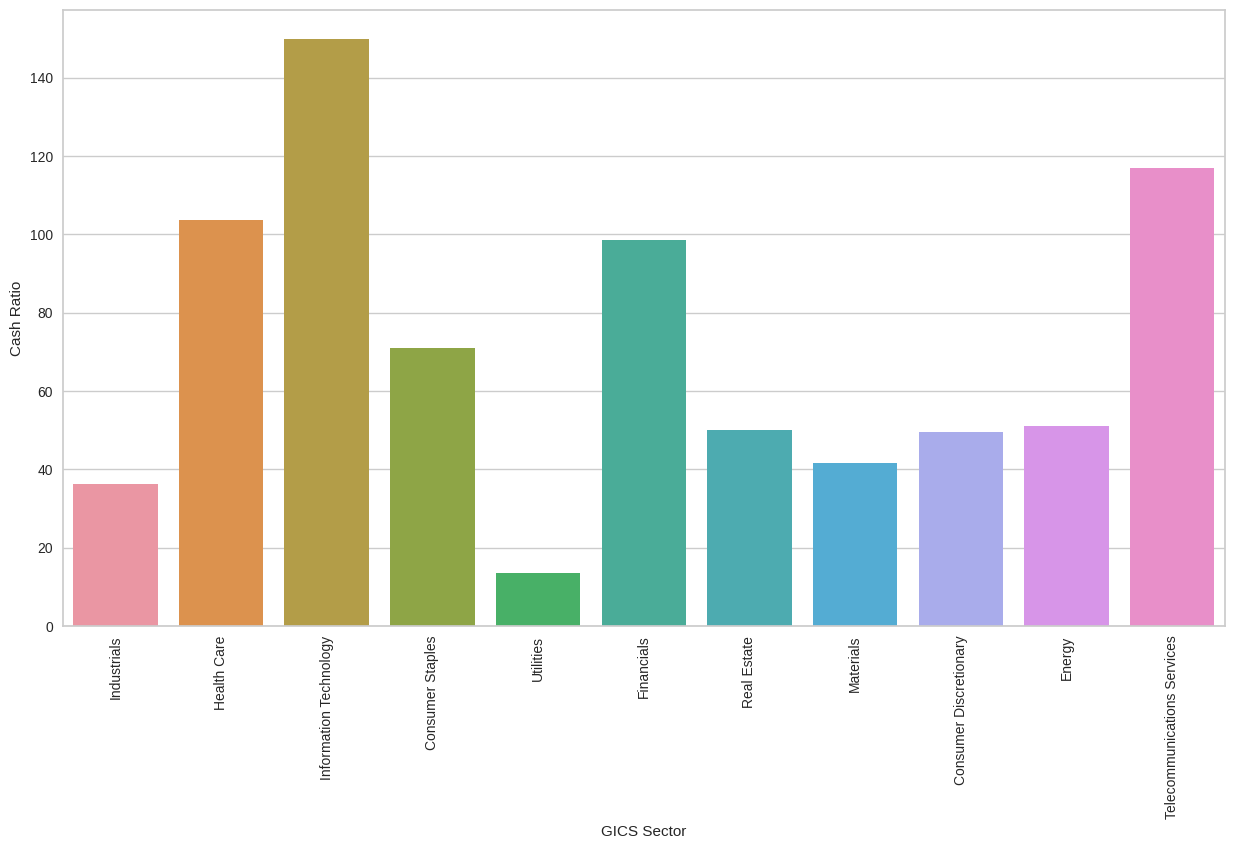

In [ ]:
#GICS vs Cash Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

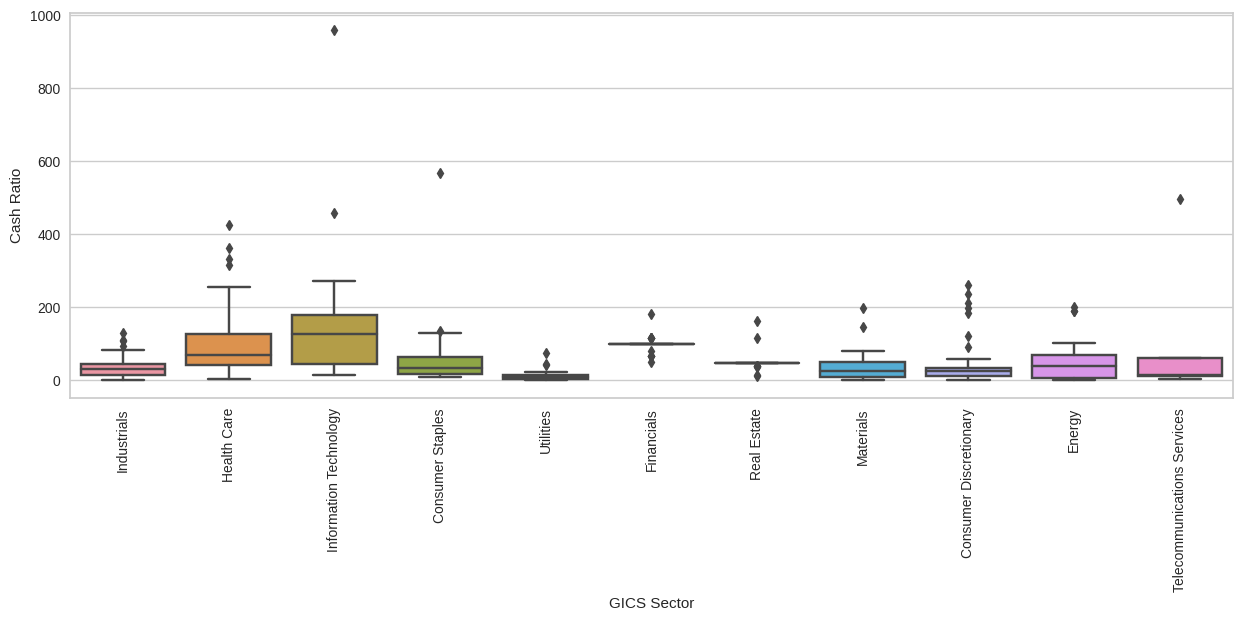

In [ ]:
# GICS Sector vs Cash Ratio
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Cash Ratio');
plt.xticks(rotation=90);

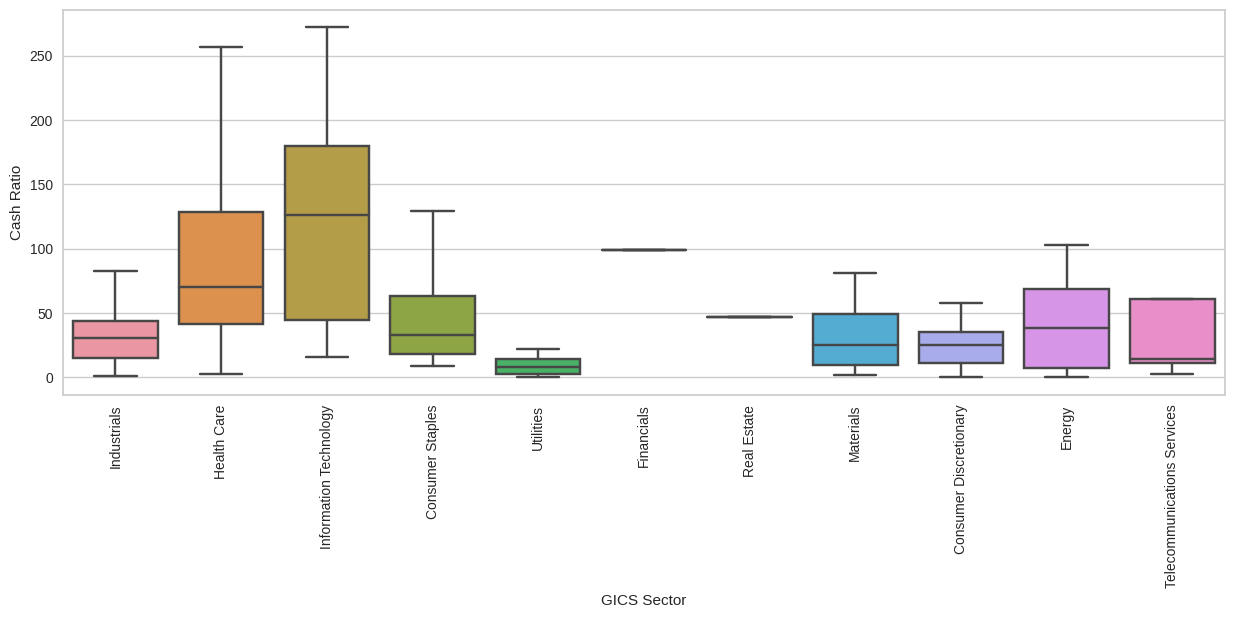

In [ ]:
# GICS Sector vs Cash Ratio no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Cash Ratio', showfliers=False);
plt.xticks(rotation=90);

- On average
  - Information Technology has the highest cash ratio, followed by Telecommuncication Services, and healh care
  - The lowest is Utilities
- All have outliers, but Information Technology has an outlier close to 1000, and the next highest outlier is less than 600
- On Medians
  - Information Technology is still the highest, but now is followed by Financials and Health Care
- Financials and Real Estate have the smallest variablility not including outliers. Their minimum to maximum seem to within 5 or less from each other.

####GICS vs Net Cash Flow

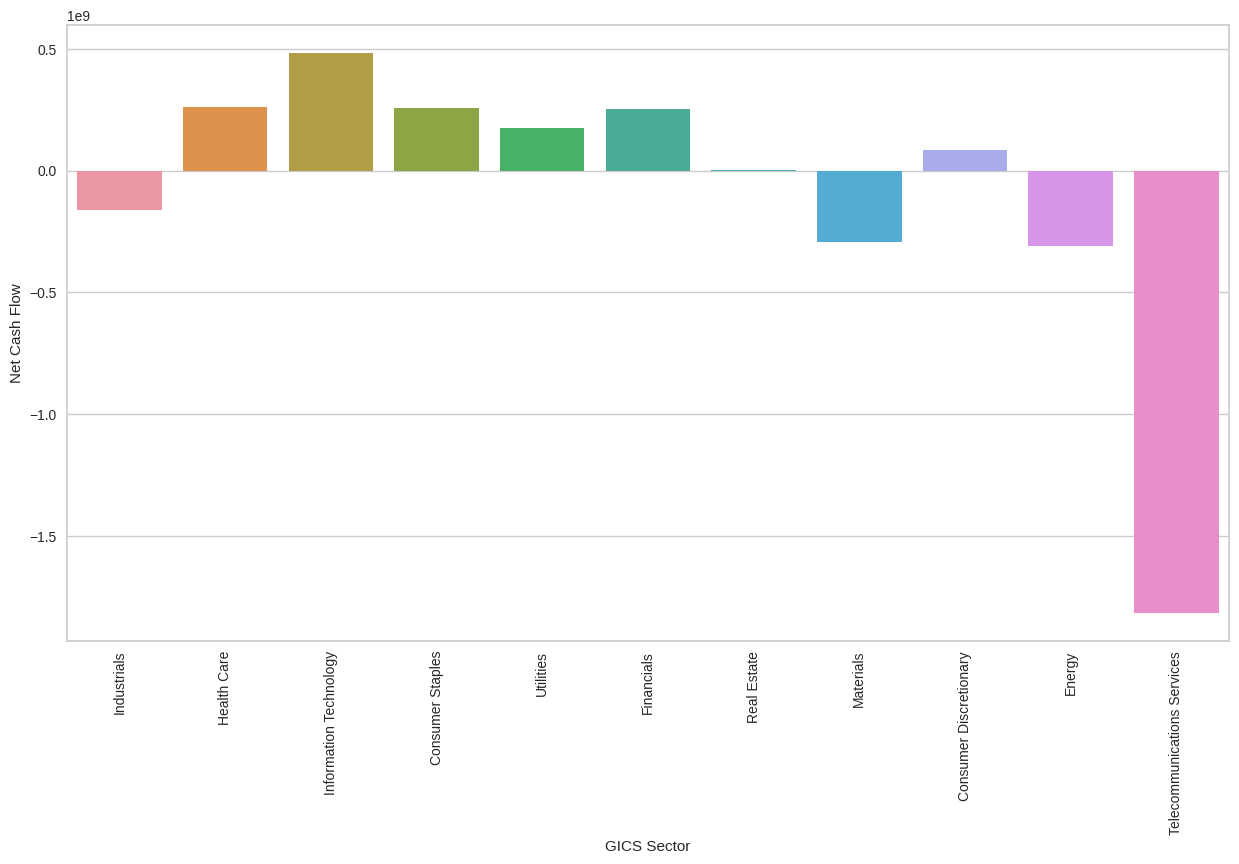

In [ ]:
#GICS vs Net Cash Flow
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Net Cash Flow', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

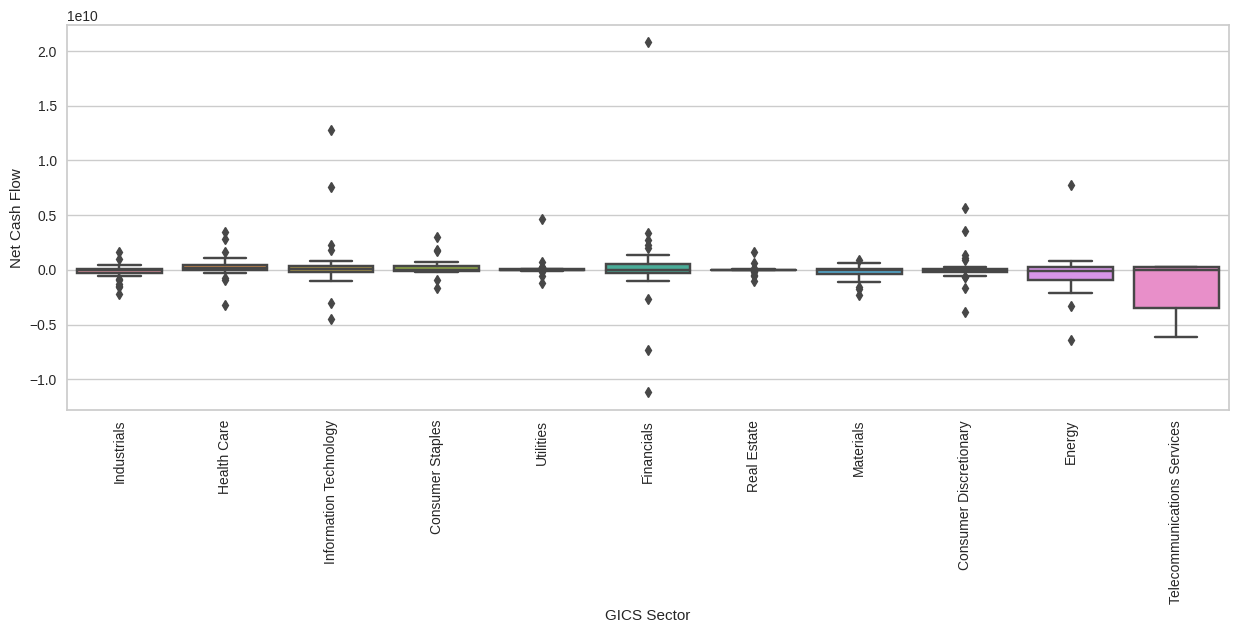

In [ ]:
# GICS Sector vs Net Cash Flow
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Net Cash Flow');
plt.xticks(rotation=90);

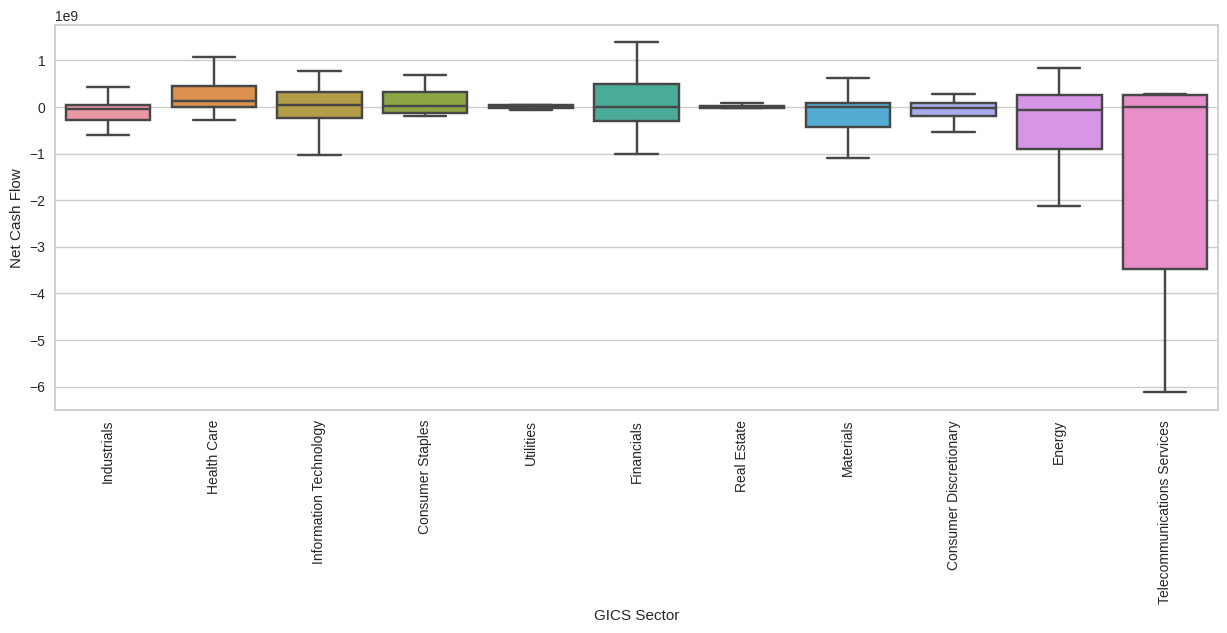

In [ ]:
# GICS Sector vs Net Cash Flow no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Net Cash Flow', showfliers=False);
plt.xticks(rotation=90);

- On Average
  - Information Technology has the highest, and then the next three (Health Care, Consumer Staples, and Financials) are about the same
  - Telecommunications Services have the largest negative cash ratio by almost 5 times the next negative
- Financials has the greatest variability including outliers. Without outliers the greatest is Telecommunications Services
- Real Estate has the least variability
- The medians for all sectors are all similar (close to zero)

####GICS vs Net Income

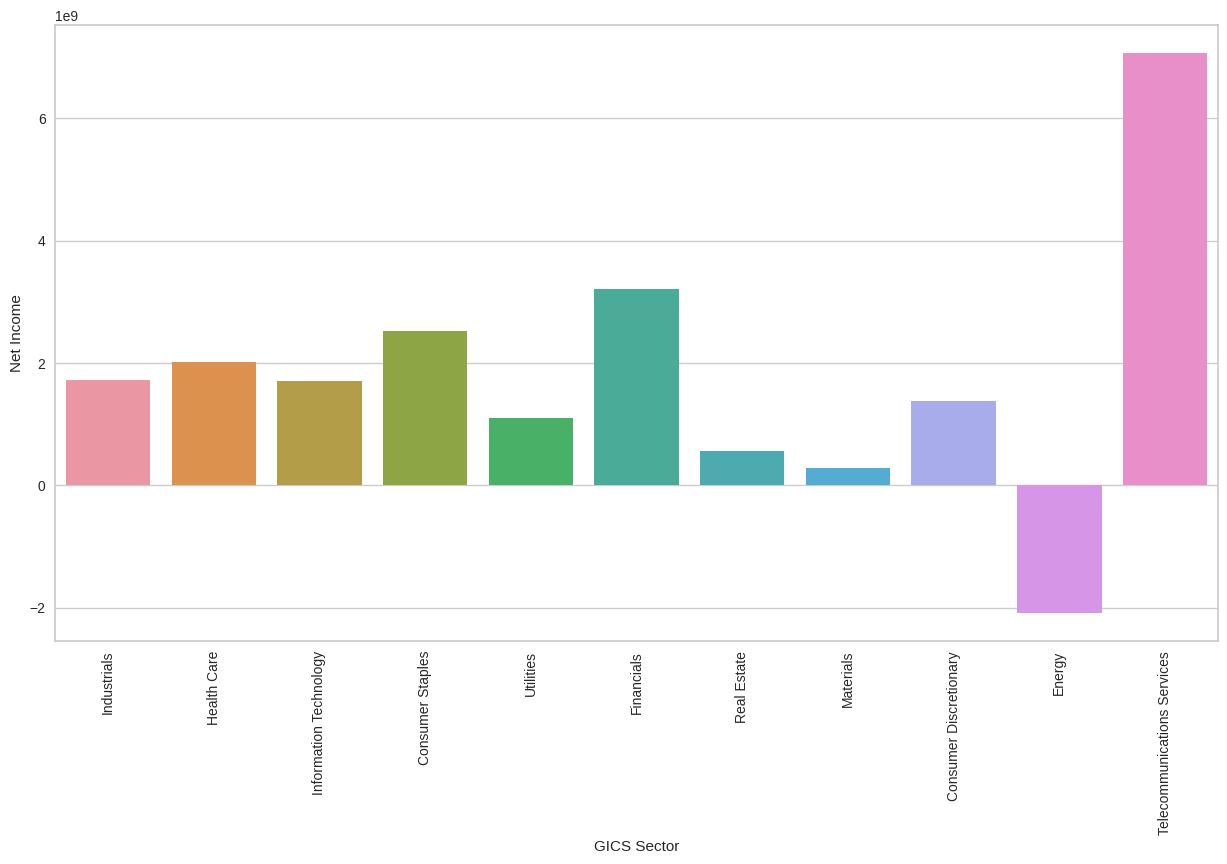

In [ ]:
#GICS vs Net Income
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Net Income', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

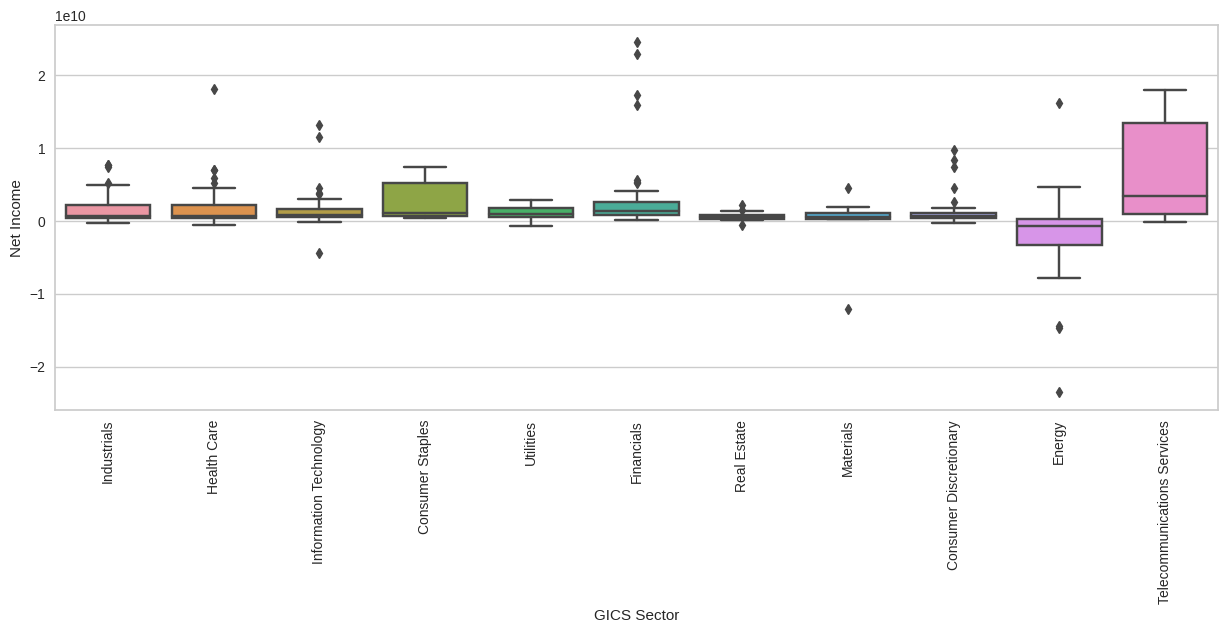

In [ ]:
# GICS Sector vs Net Income
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Net Income');
plt.xticks(rotation=90);

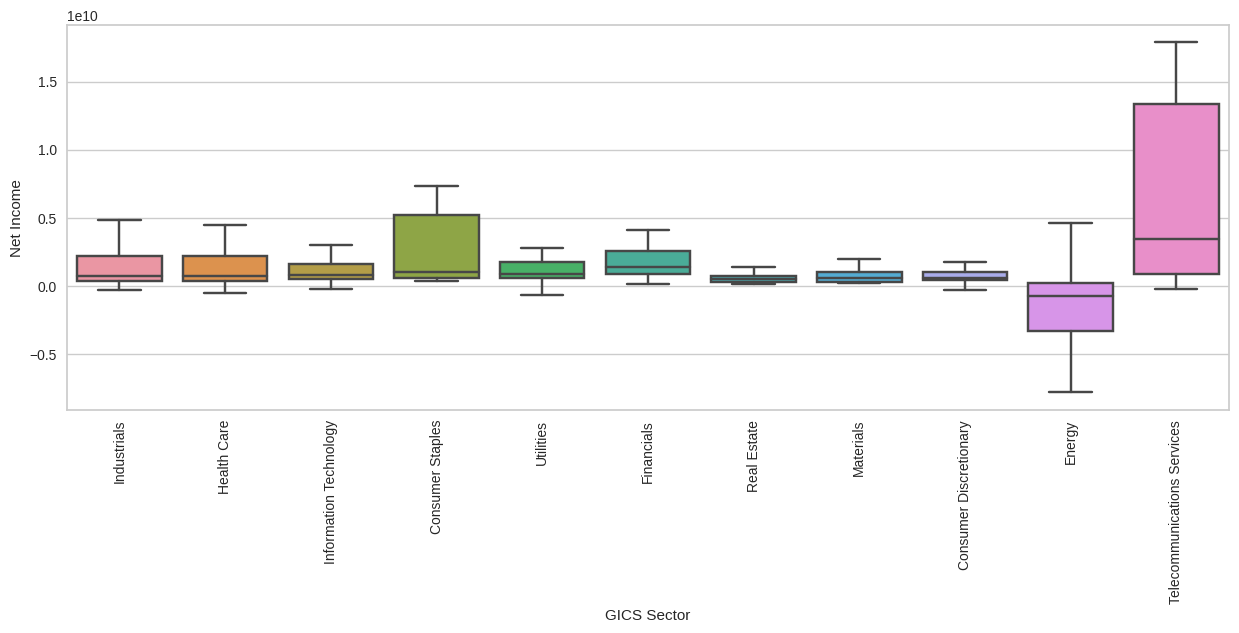

In [ ]:
# GICS Sector vs Net Income no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Net Income', showfliers=False);
plt.xticks(rotation=90);

- On Average
  - Telecommunication Services has the highest Net Income, followed by Financials and Consumer Staples
  - Energy is the lowet and is the only average which is in the negatives
- Financials is the only one that has all values in the positive of net income. Excluding outliers then we could include Consumer Staples, Real Estate, and Materials
- Telecommunication Services median is higher than all Q3 except consumer staples

####GICS vs Earnings Per Share

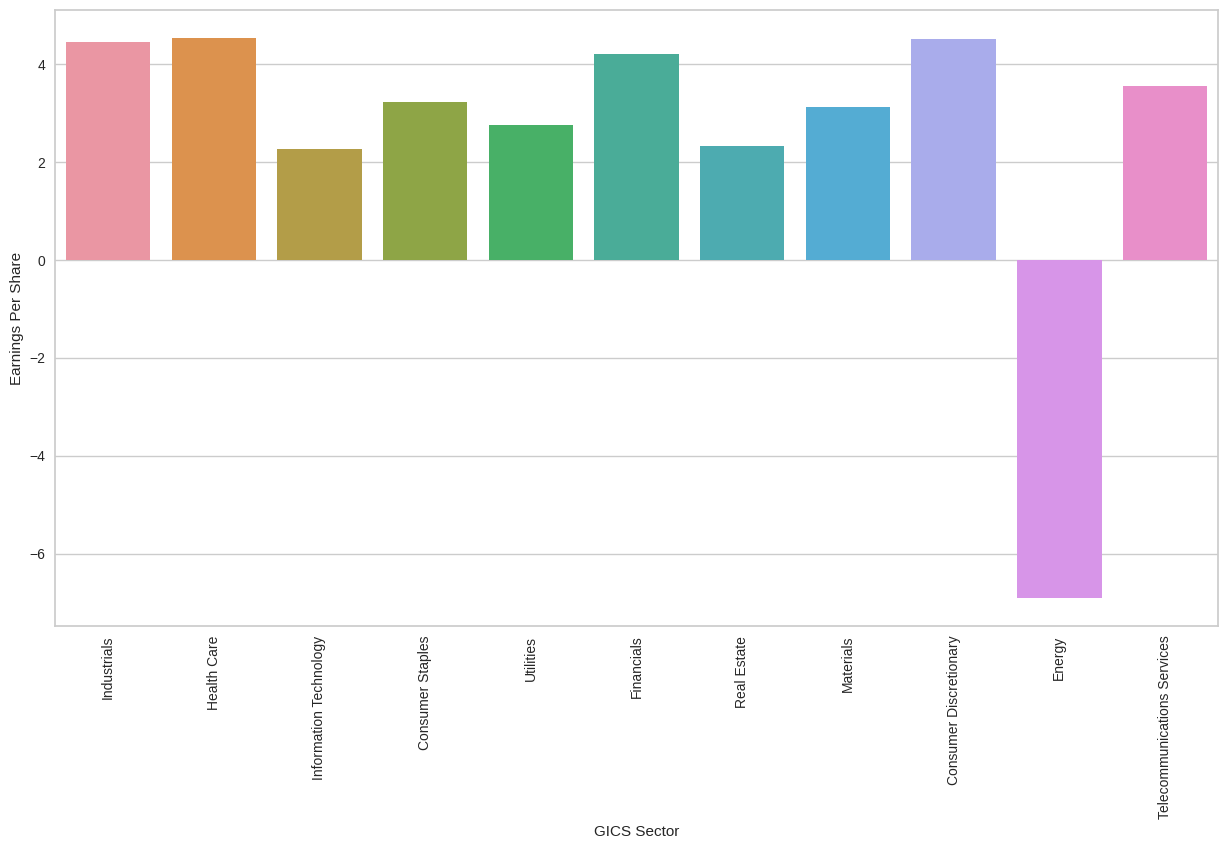

In [ ]:
#GICS vs Earnings Per Share
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Earnings Per Share', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

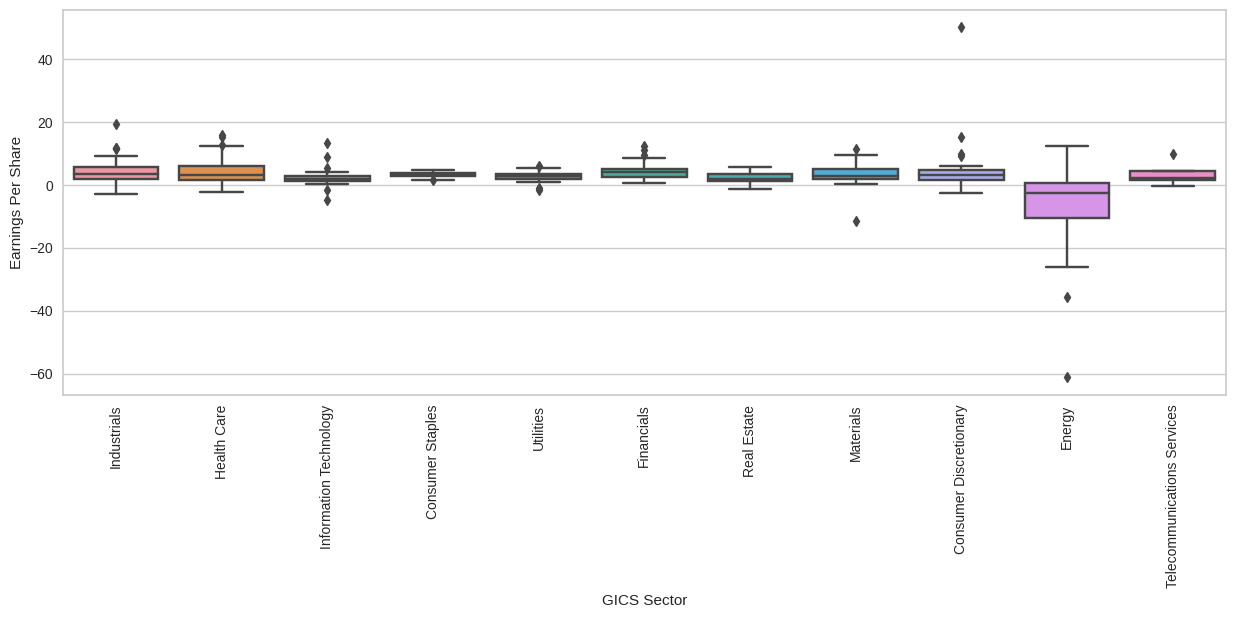

In [ ]:
# GICS Sector vs Earnings Per Share
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Earnings Per Share');
plt.xticks(rotation=90);

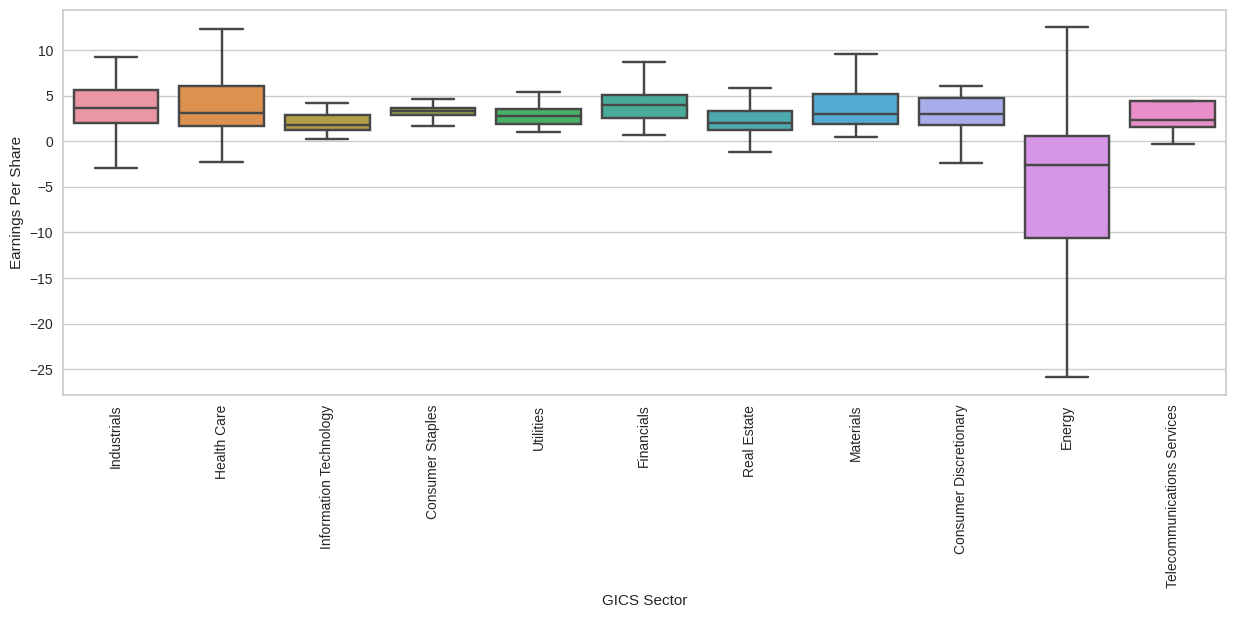

In [ ]:
# GICS Sector vs Earnings Per Share no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Earnings Per Share', showfliers=False);
plt.xticks(rotation=90);

- On Average
  - Health Care and Conumer Discretionary are the highest
  - Energy is the lowest and is the only one in the negatives
- Energy is the only one with a median that is in the negatives, and it's Q3 is lower than all others Q1, and it has the most variability
- Financials has the higest median

####GICS vs Estimated Shares Outstanding

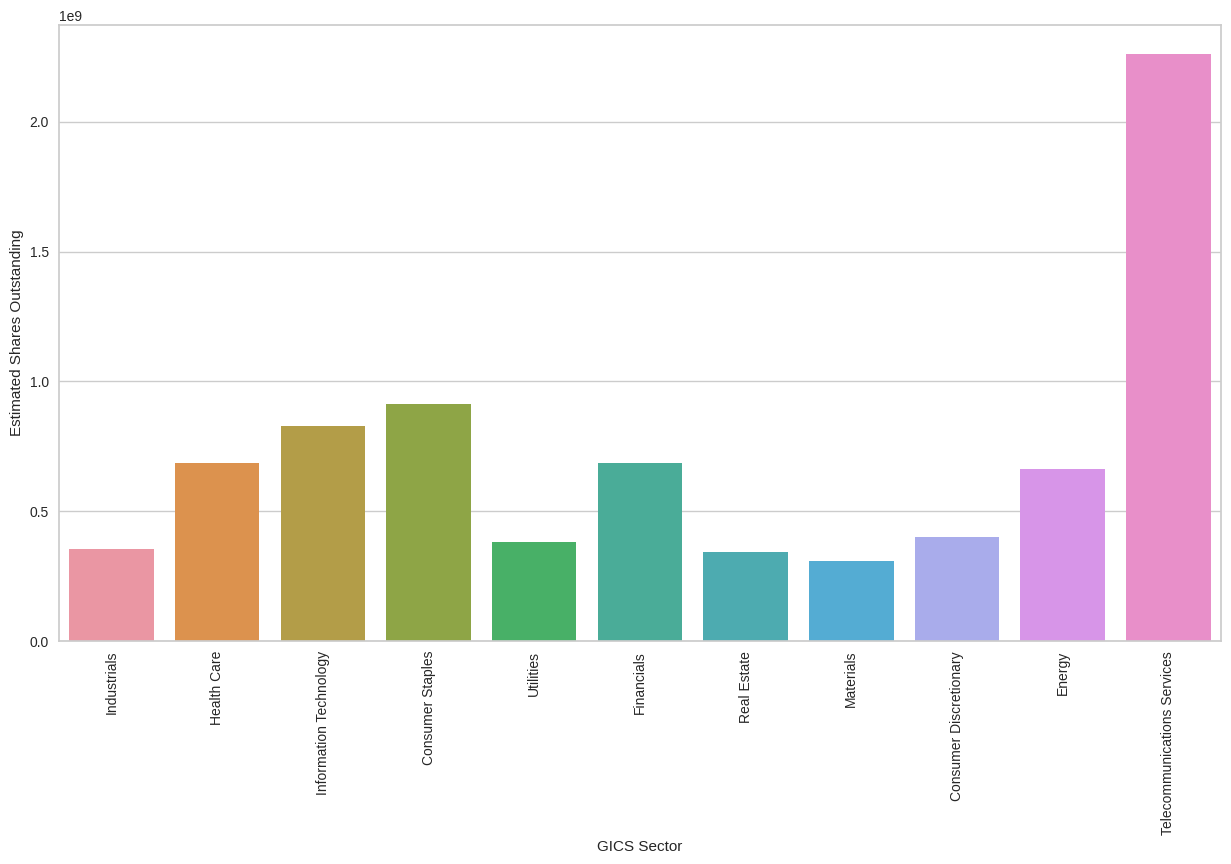

In [ ]:
#GICS vs Estimated Shares Outstanding
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Estimated Shares Outstanding', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

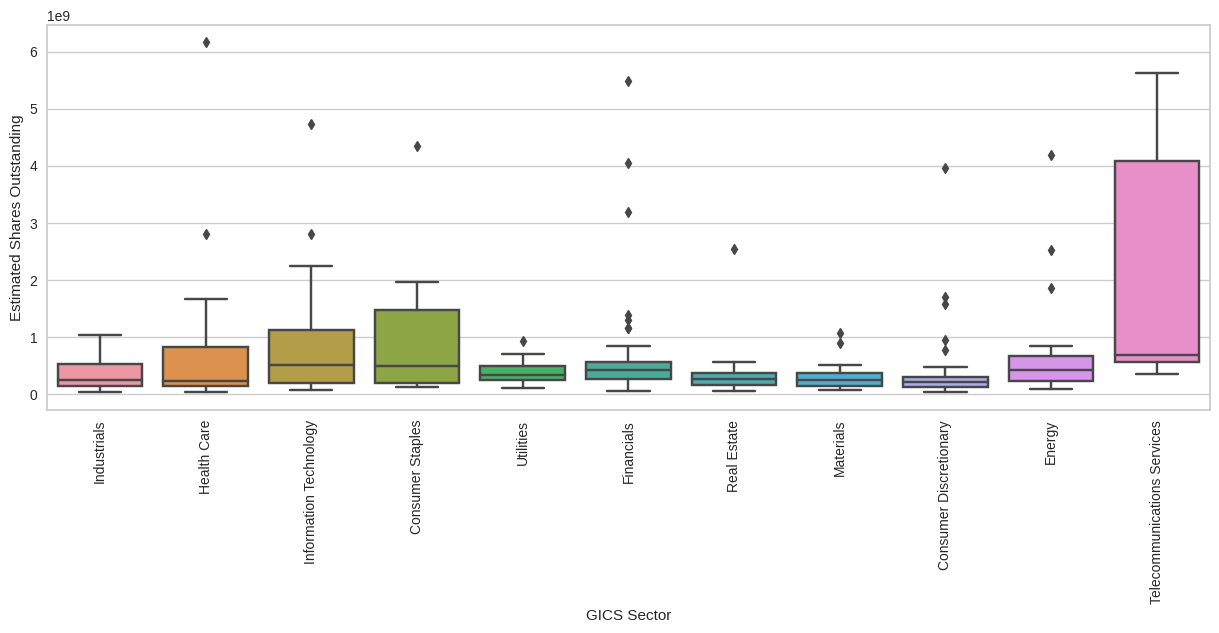

In [ ]:
# GICS Sector vs Estimated Shares Outstanding
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='Estimated Shares Outstanding');
plt.xticks(rotation=90);

- Telecomunication Services is more than double the next based on the average Estimated Shares Outstanding.  It has a large spread inbetween the median and Q3 (from less than 1 to more than 4).  The median is also higher than all others.
- Materials has the lowest variablity and lowest average as well

####GICS vs P/E Ratio

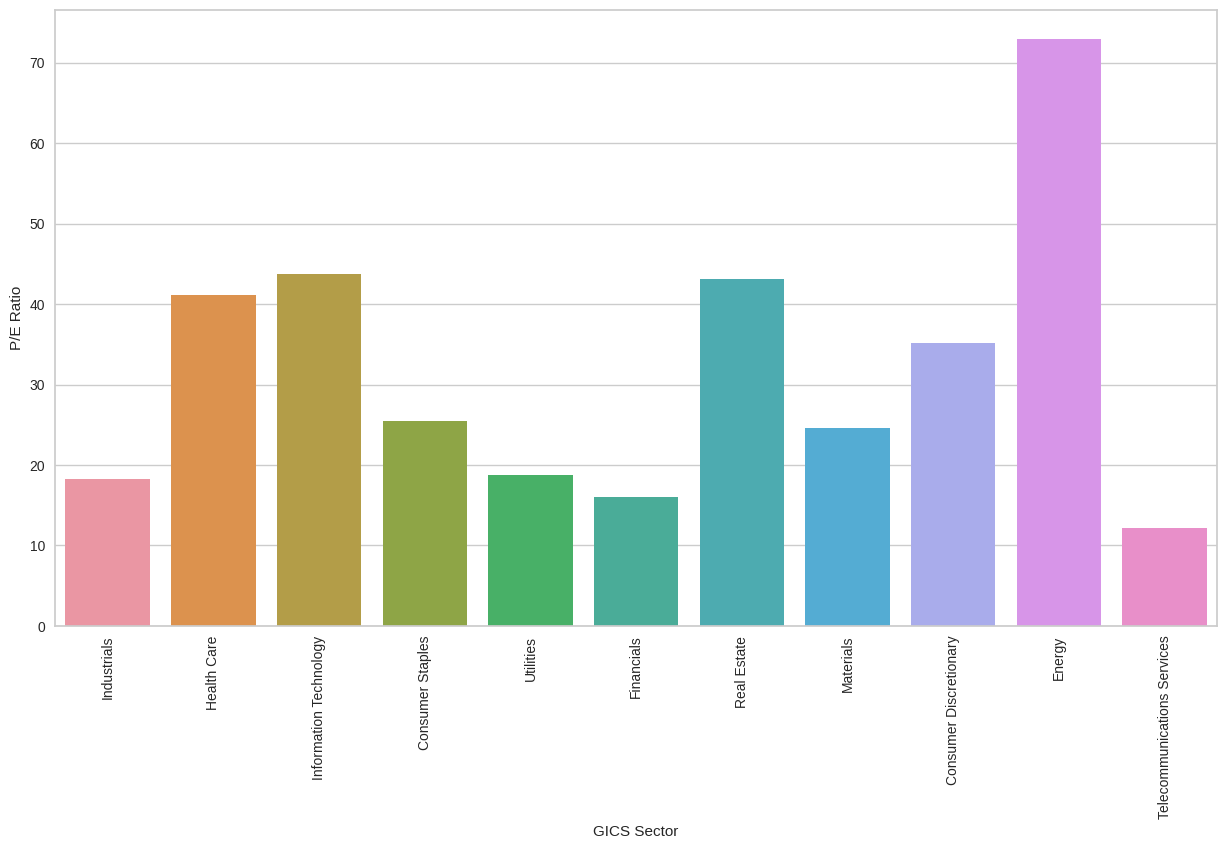

In [ ]:
#GICS vs P/E Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

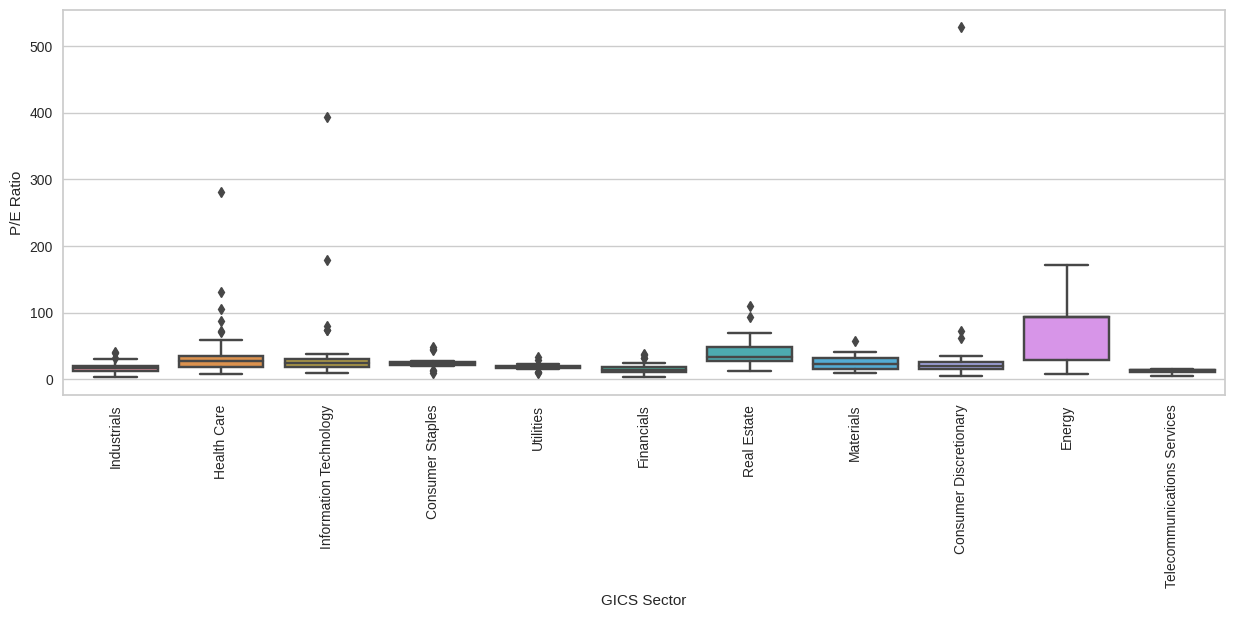

In [ ]:
# GICS Sector vs P/E Ratio
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='P/E Ratio');
plt.xticks(rotation=90);

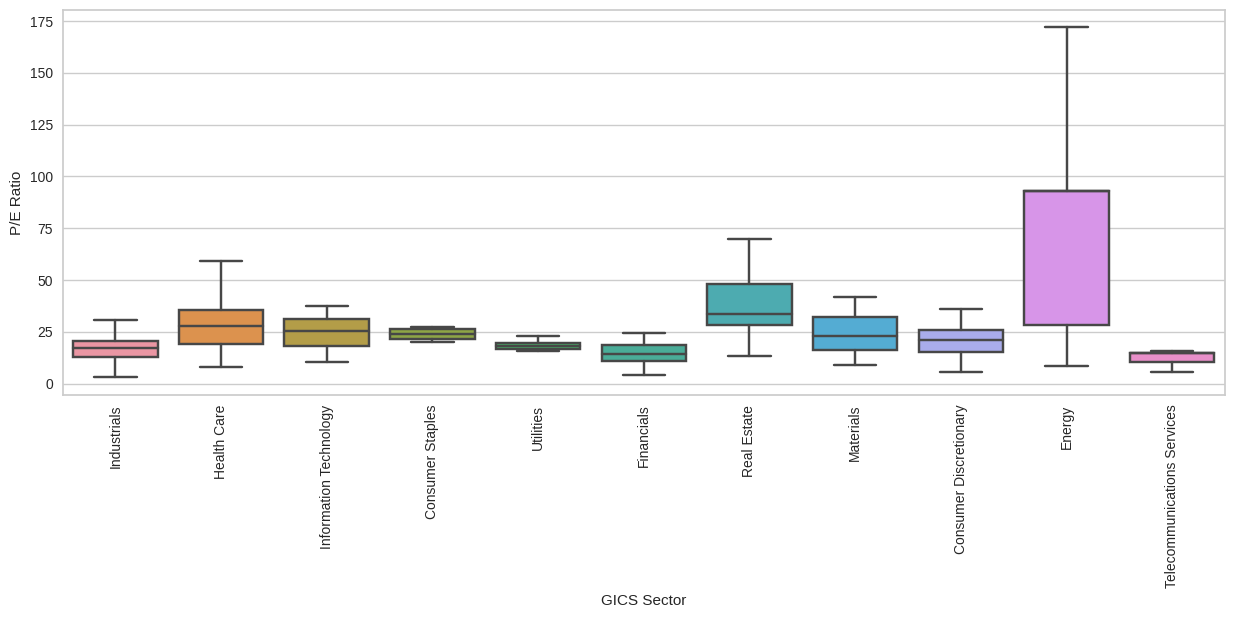

In [ ]:
# GICS Sector vs P/E Ratio no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='P/E Ratio', showfliers=False);
plt.xticks(rotation=90);

- Energy has the highest average by a little less than double the next, which is Information Technology.  Energy also has it's median higher than all other maximum excluding outliers. Energy also has the largest variability excluding outliers.  Energy's Q1 is greater than all medians as well.
- Consumer Discretionary has a very high outlier over 500 and its next outlier is less than 100


####GICS vs P/B Ratio

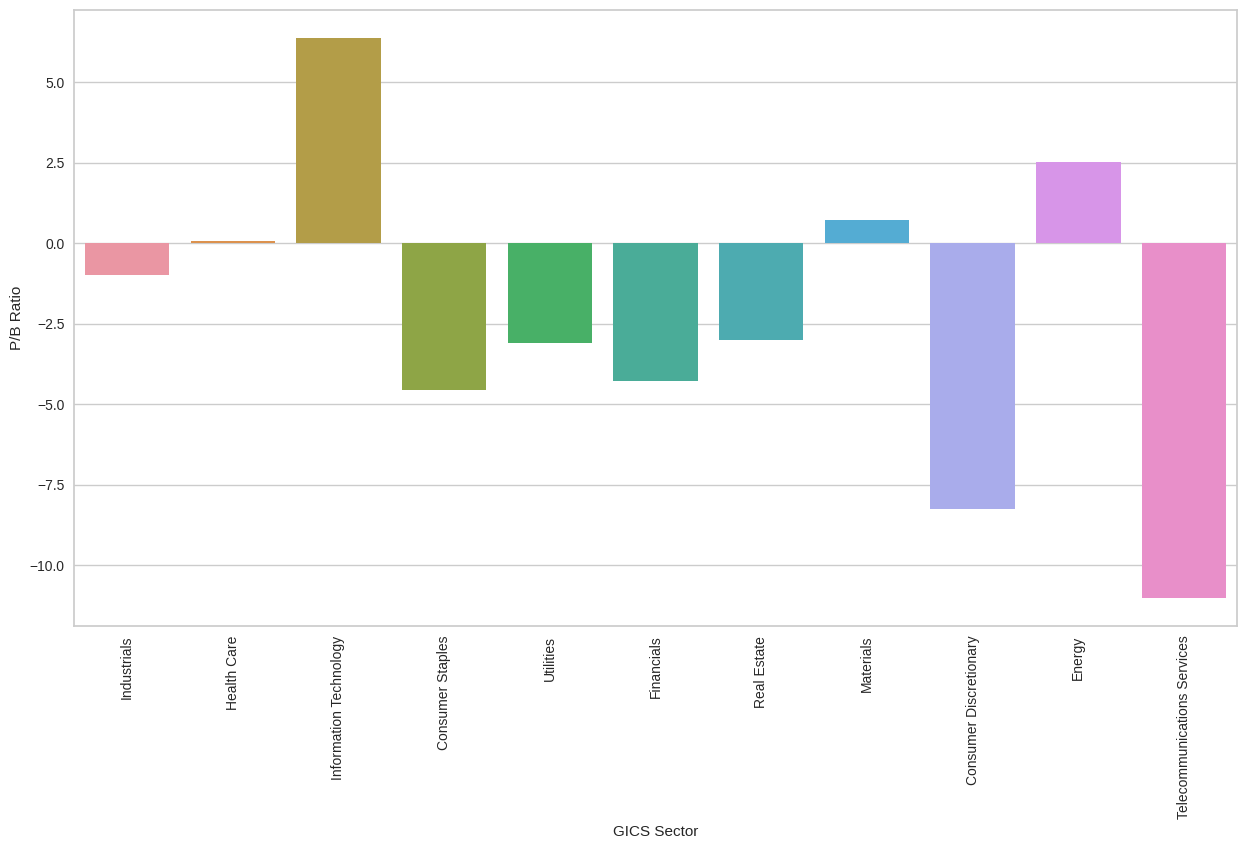

In [ ]:
#GICS vs P/B Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/B Ratio', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.show()

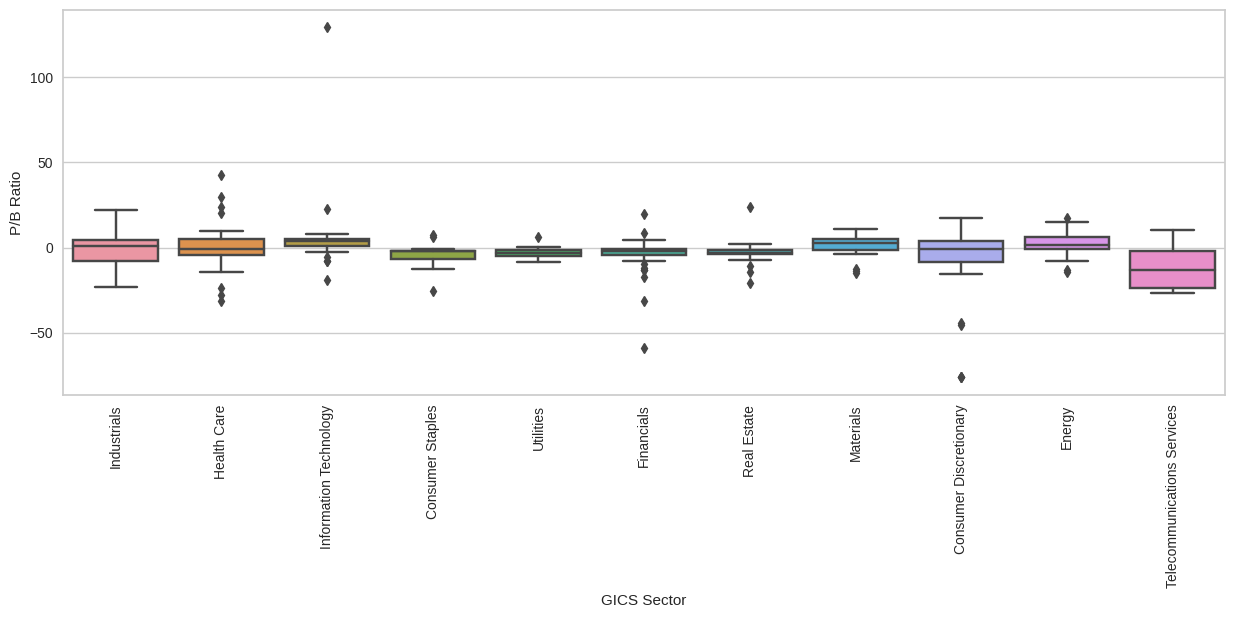

In [ ]:
# GICS Sector vs P/B Ratio
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='P/B Ratio');
plt.xticks(rotation=90);

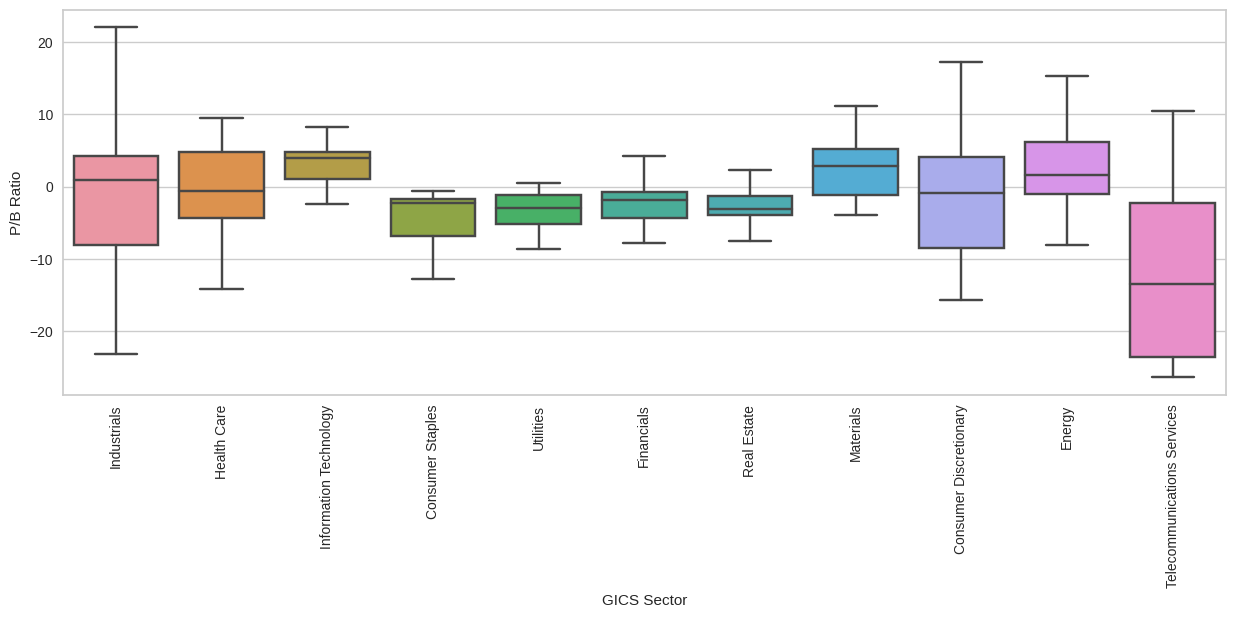

In [ ]:
# GICS Sector vs P/B Ratio no outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='GICS Sector', y='P/B Ratio', showfliers=False);
plt.xticks(rotation=90);

- Information Technology has the highest on average P/B ratio, which is mostly attributed to the high outlier, which is almost 75 more than the next greatest outlier on any sector
- Industrials, Information Technology, Materials, and Energy are the only sectors to have a positive medians.  
- All of Consumer Staples values are negative excluding the couple of outliers

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

###Outlier Check

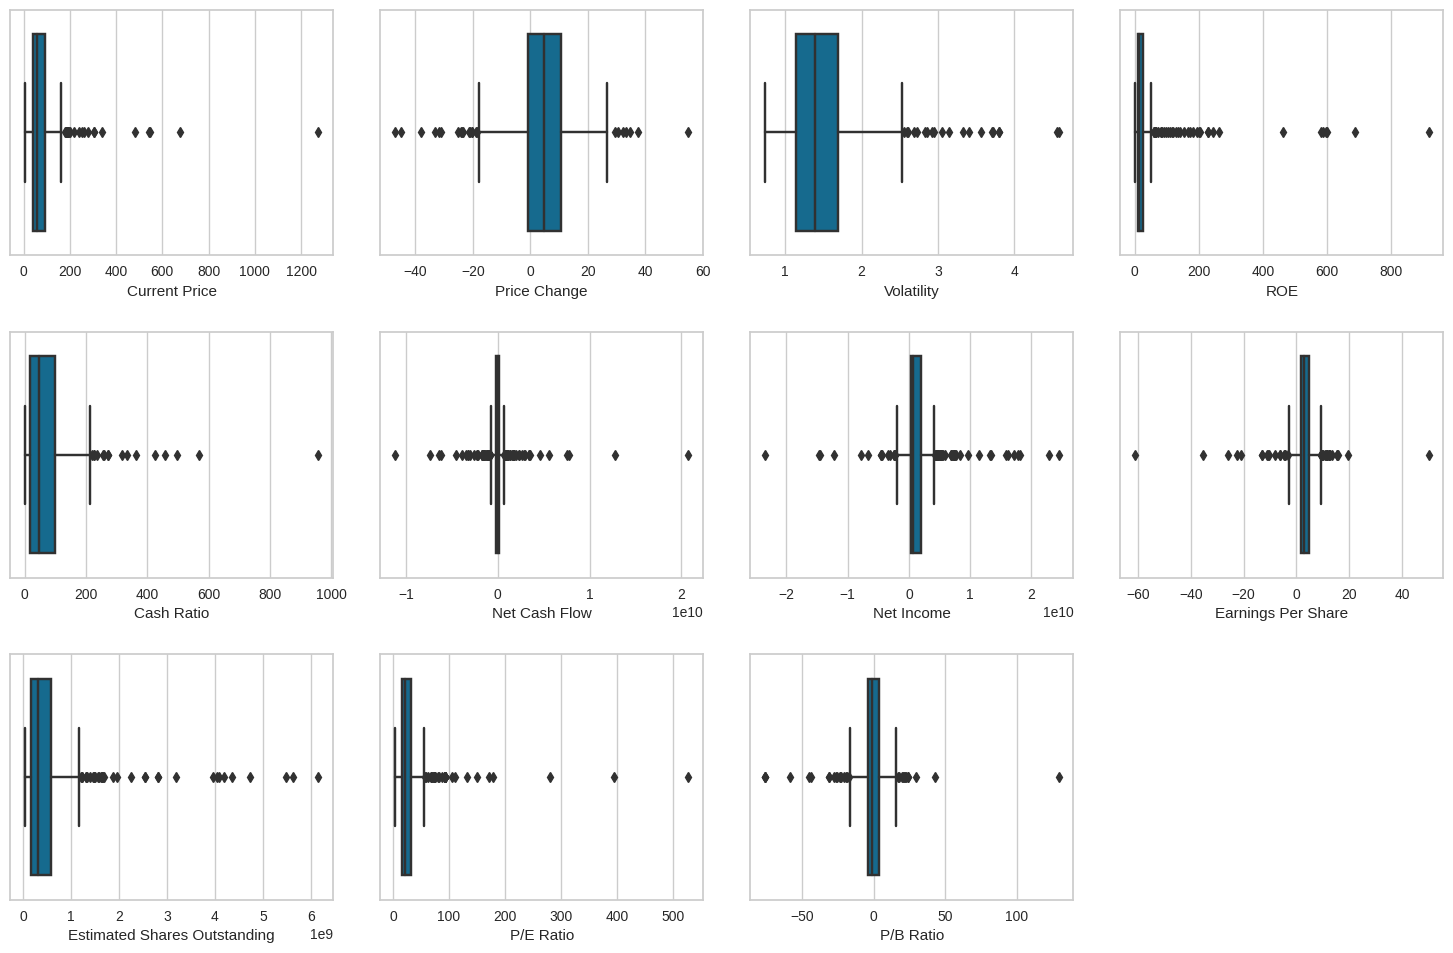

In [ ]:
# Outlier detection using boxplot
num_cols = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are several outliers which we have already seen from the EDA, but we will not treat these outliers because they are valid data points

### Scale the Data

In [ ]:
#Scaling the dataset before clustering
scaler = StandardScaler()
#Creating subset of numeric columns and then making copy to not mess with original data
subset = df[num_cols].copy()
#Fitting new dataset and then transforming
subset_scaled = scaler.fit_transform(subset)
# Creating a dataframe from the scaled dataset
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

In [ ]:
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

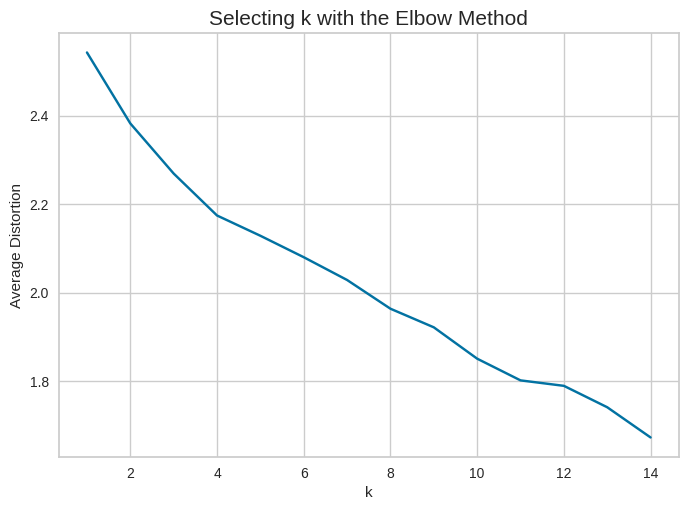

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=15)


- Based on this graph, possible values of K could be 2, 4, 8, or 11

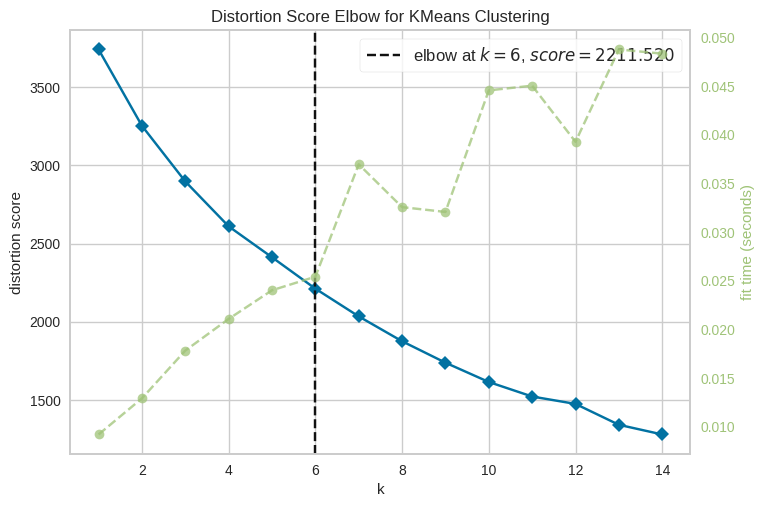

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1) # Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(1, 15))
visualizer.fit(subset_scaled_df) # Fit the data to the visualizer
visualizer.show() # Show the data

- Using the yellowbrick's KElbowBisualizer it is stating a k value of 6
- Compared to the average distortion model before at 6 there was a very small knick in the graph
- With this we will need to investigate further using silhouette scores and plots to help identify an appropriate k-groups to use
- Based on information thus far we will be investigating groups of 2, 4, 6, 8, and 11

### Checking Silhouette Scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.43228336443659804
For n_clusters = 6, silhouette score is 0.4005422737213617
For n_clusters = 7, silhouette score is 0.3976335364987305
For n_clusters = 8, silhouette score is 0.40278401969450467
For n_clusters = 9, silhouette score is 0.3778585981433699
For n_clusters = 10, silhouette score is 0.13458938329968687
For n_clusters = 11, silhouette score is 0.1421832155528444
For n_clusters = 12, silhouette score is 0.2044669621527429
For n_clusters = 13, silhouette score is 0.23424874810104204
For n_clusters = 14, silhouette score is 0.12102526472829901


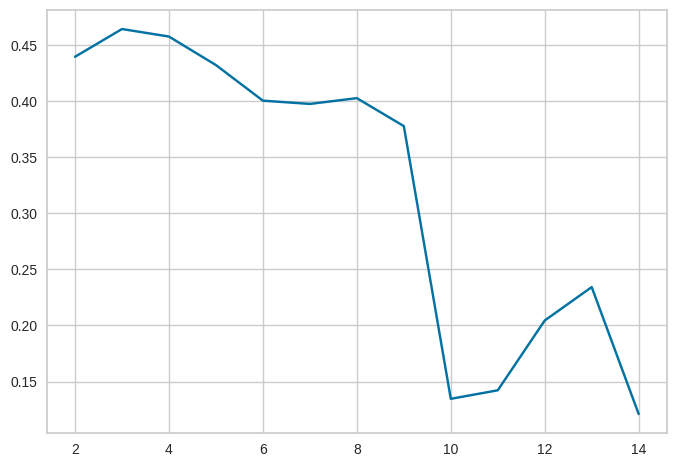

In [ ]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

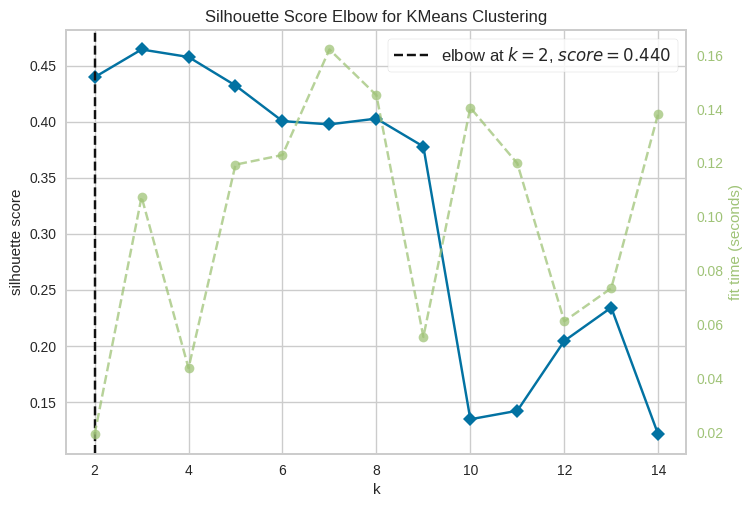

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1) # Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette")
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # show the data

- According to the the yellowbrick KElbowvisulaizer 2 groups would be appropriate which is one of the groupings to investigate further
- The highest silhouette score is at 3, which only had a small average distortion knick in the Elbow graph
- 11 has a low silhoutte score, thus we will not investigate 11 further
- Cluster groups of 2, 4, 6, and 8 have decent silhouette scores so we will investigate these along with 3 because it had the highest silhouette score

## Checking different K-groupings

###2 K-Groups

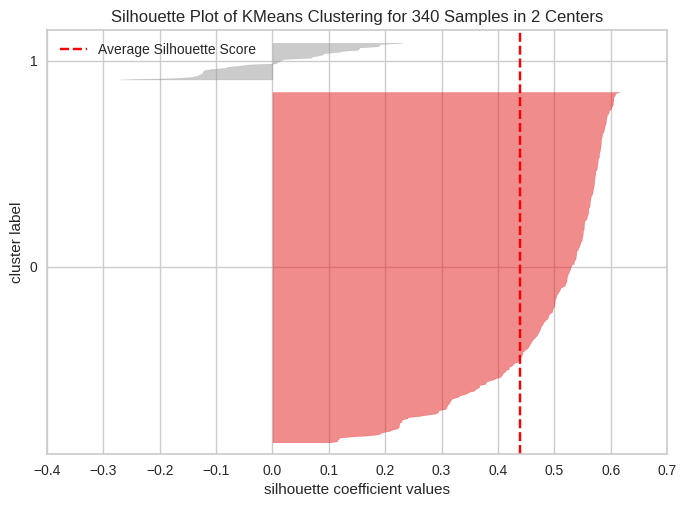

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhoutte Graph
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

####Selecting Model for Cluster

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=2, random_state=1)

In [ ]:
#Creating a copy of dataframe to preserve for later use
df_k2 = df.copy()

#Creating a copy of scaled dataframe
subset_scaled_df_k2 = subset_scaled_df.copy()

In [ ]:
# Adding Kmeans cluster labels to dataframe
df_k2["K_Groups"] = kmeans.labels_

# Adding Kmeans cluster labels to scaled dataframe
subset_scaled_df_k2["K_Groups"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = df_k2.groupby("K_Groups").mean()

In [ ]:
cluster_profile["number_in_K_Group"] = (
    df_k2.groupby("K_Groups")["Security"].count().values
)

In [ ]:
# Display Cluster Profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

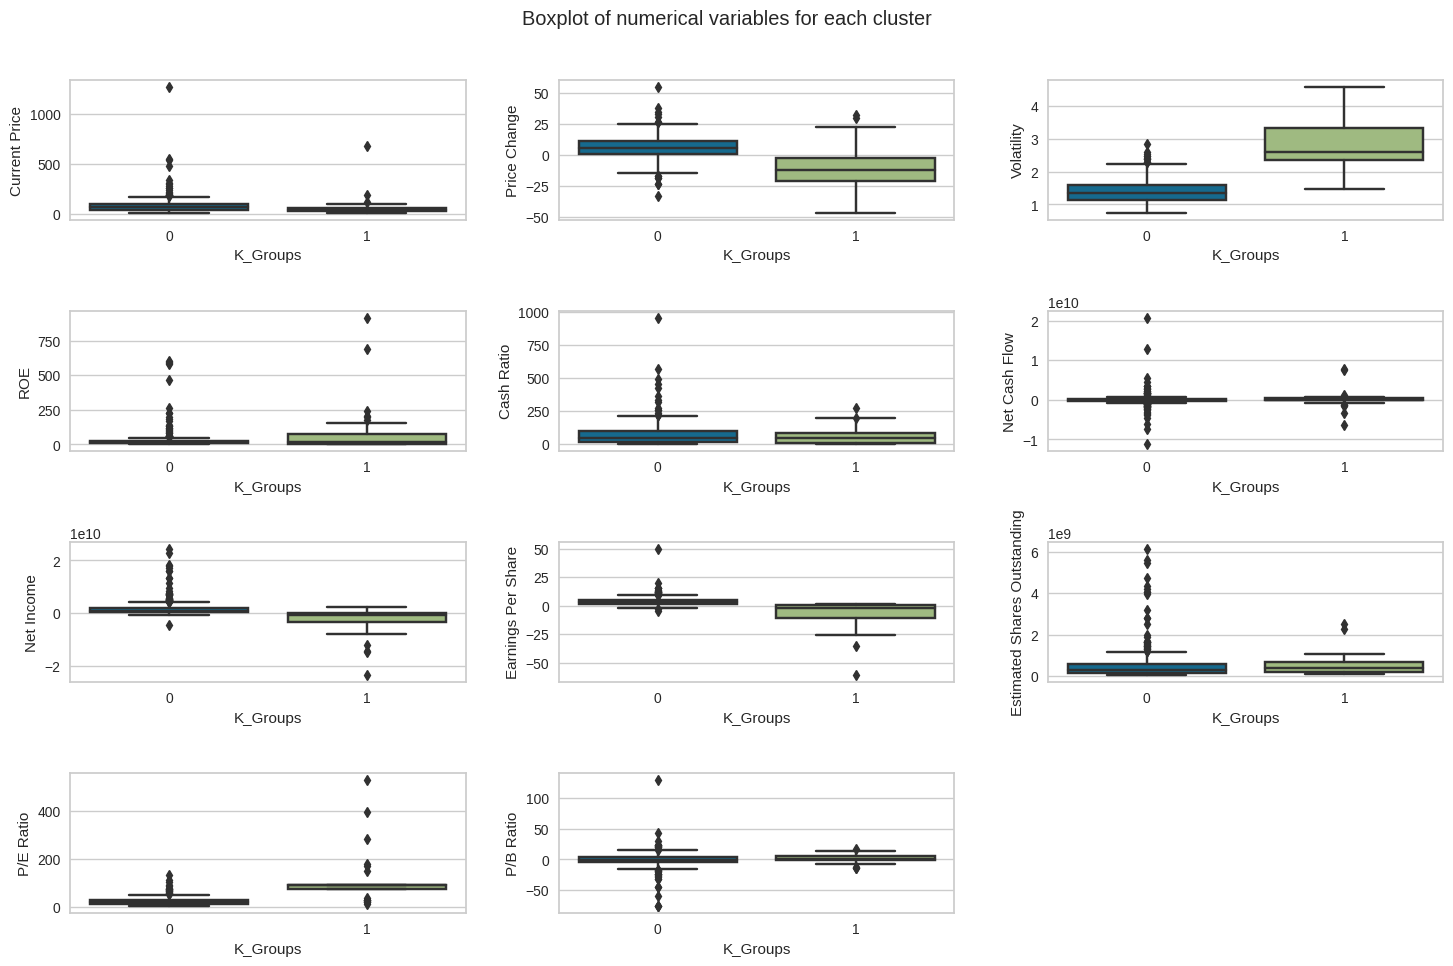

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_k2, x="K_Groups", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_Groups'>

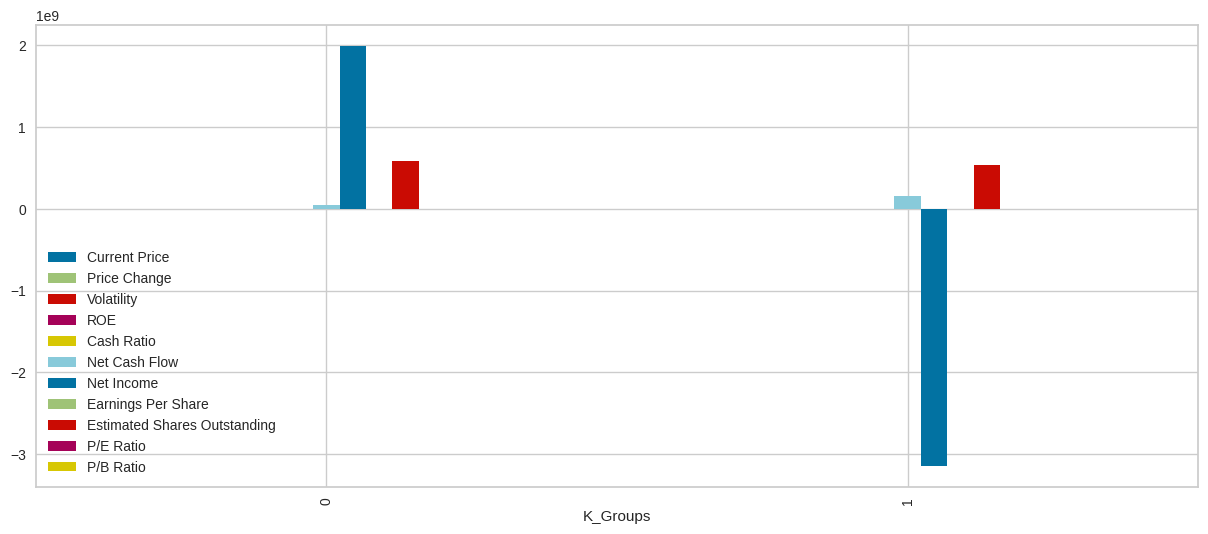

In [ ]:
df_k2.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='K_Groups'>

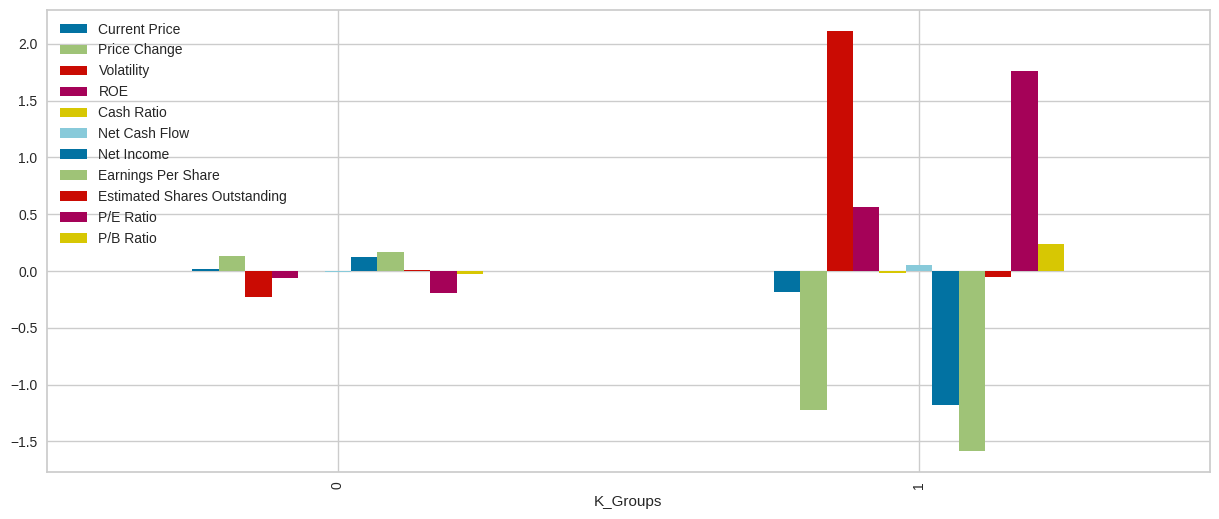

In [ ]:
subset_scaled_df_k2.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

In [ ]:
# Companies in each cluster group
for name in df_k2['K_Groups'].unique():
  print("Cluster {} contains these companies:".format(name))
  print(df_k2[df_k2['K_Groups'] == name]["Security"].unique())
  print()

Cluster 0 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Propertie

In [ ]:
#Displaying how many companies are in each sector
df_k2.groupby(["GICS Sector"])["Security"].count()

GICS Sector
Consumer Discretionary         40
Consumer Staples               19
Energy                         30
Financials                     49
Health Care                    40
Industrials                    53
Information Technology         33
Materials                      20
Real Estate                    27
Telecommunications Services     5
Utilities                      24
Name: Security, dtype: int64

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df_k2.groupby(["K_Groups", "GICS Sector"])["Security"].count()

K_Groups  GICS Sector                
0         Consumer Discretionary         38
          Consumer Staples               19
          Energy                          6
          Financials                     49
          Health Care                    39
          Industrials                    52
          Information Technology         29
          Materials                      19
          Real Estate                    27
          Telecommunications Services     5
          Utilities                      24
1         Consumer Discretionary          2
          Energy                         24
          Health Care                     1
          Industrials                     1
          Information Technology          4
          Materials                       1
Name: Security, dtype: int64

- Between these two cluster there is a big differnce in net income (cluster 0 is positive, and cluster 1 is a large negative); which go along with price change and earnings per share
- Volatility, P/E ratio, Price Change, and earnings per share are factors which show a great differnce when scaled between these two clusters
- I think two clusters isn't enough because there is quite a bit of variability within each cluster.

###3 K-Groups

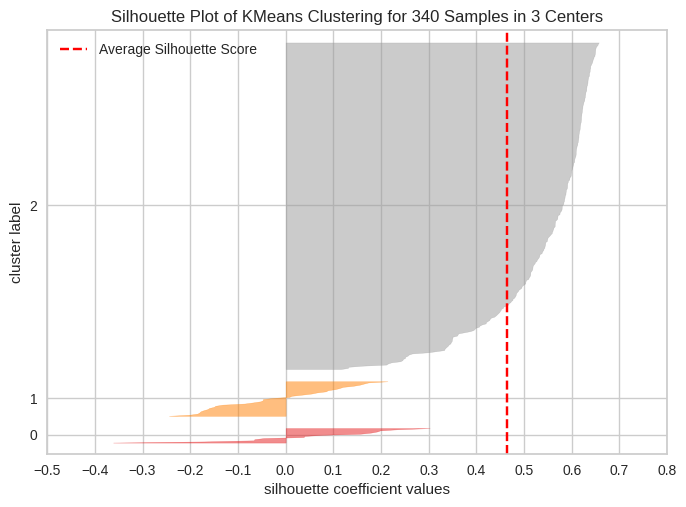

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhoutte Graph
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

####Selecting Model for Cluster

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

In [ ]:
#Creating a copy of dataframe to preserve for later use
df_k3 = df.copy()

#Creating a copy of scaled dataframe
subset_scaled_df_k3 = subset_scaled_df.copy()

In [ ]:
# Adding Kmeans cluster labels to dataframe
df_k3["K_Groups"] = kmeans.labels_

# Adding Kmeans cluster labels to scaled dataframe
subset_scaled_df_k3["K_Groups"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = df_k3.groupby("K_Groups").mean()

In [ ]:
cluster_profile["number_in_K_Group"] = (
    df_k3.groupby("K_Groups")["Security"].count().values
)

In [ ]:
# Display Cluster Profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

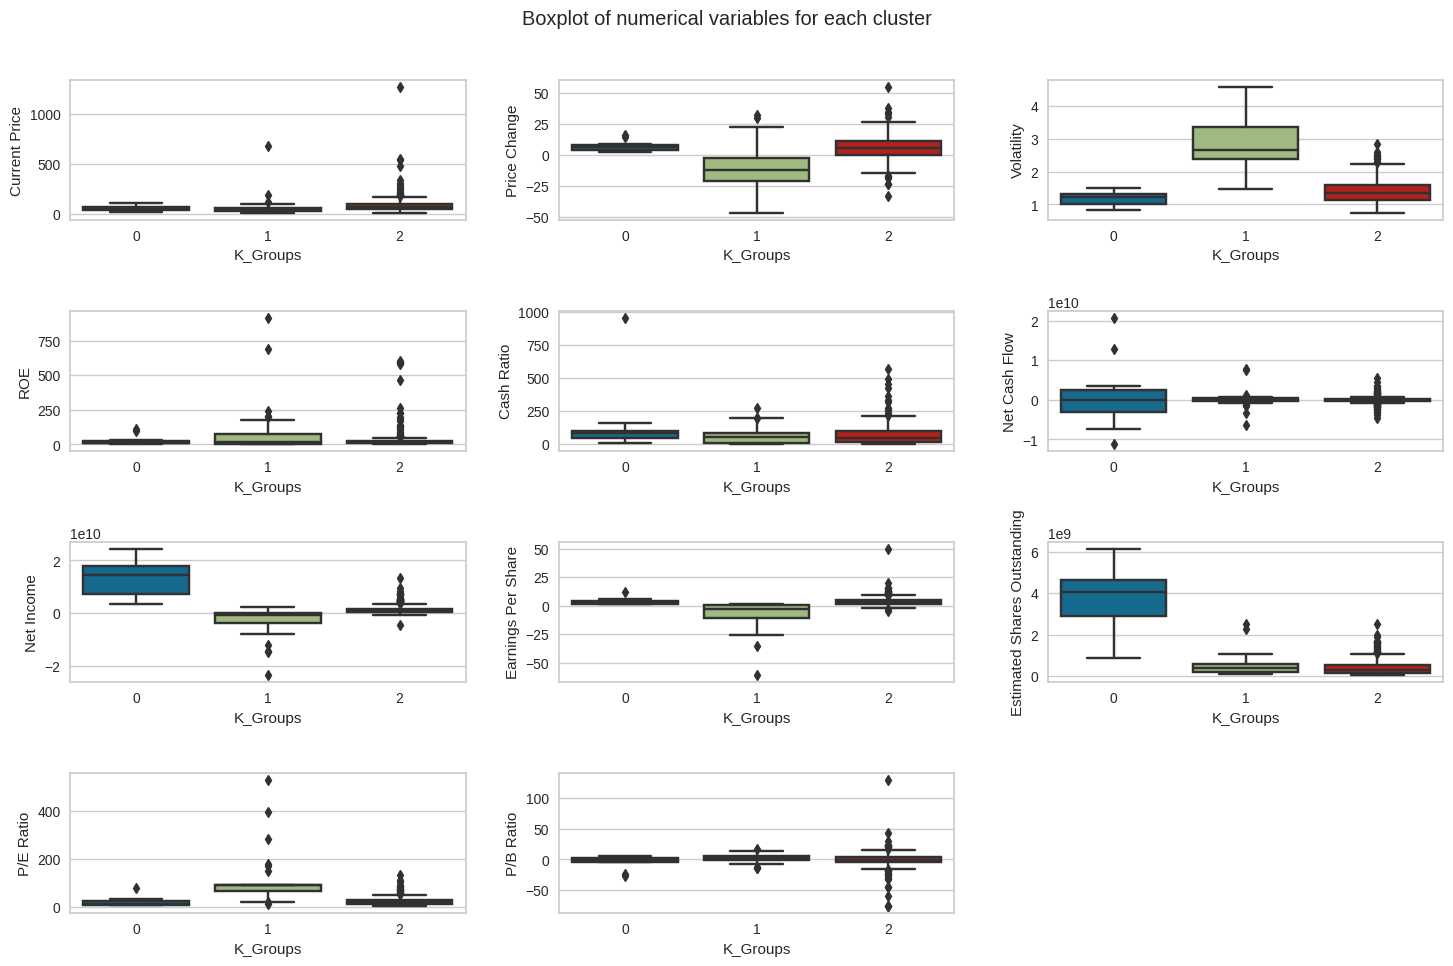

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_k3, x="K_Groups", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_Groups'>

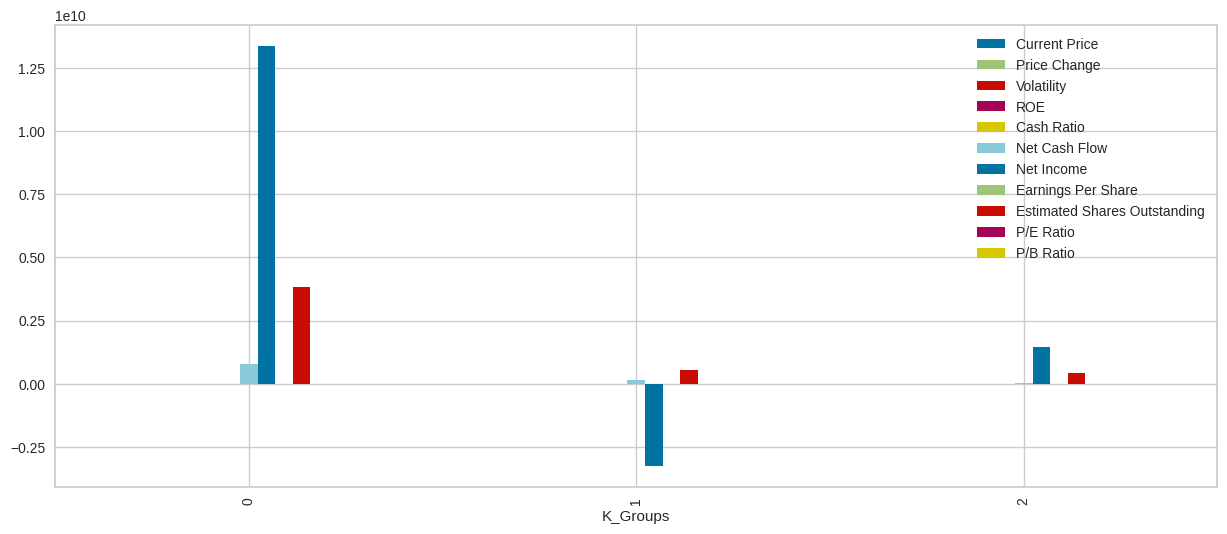

In [ ]:
df_k3.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='K_Groups'>

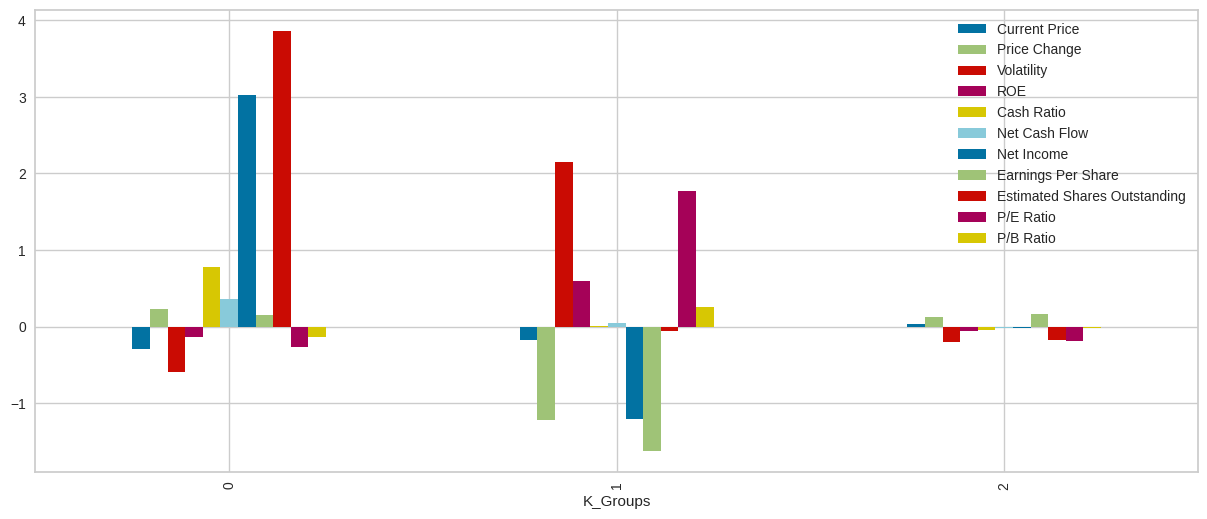

In [ ]:
subset_scaled_df_k3.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

In [ ]:
# Companies in each cluster group
for name in df_k3['K_Groups'].unique():
  print("Cluster {} contains these companies:".format(name))
  print(df_k3[df_k3['K_Groups'] == name]["Security"].unique())
  print()

Cluster 2 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' '

In [ ]:
#Displaying how many companies are in each sector
df_k3.groupby(["GICS Sector"])["Security"].count()

GICS Sector
Consumer Discretionary         40
Consumer Staples               19
Energy                         30
Financials                     49
Health Care                    40
Industrials                    53
Information Technology         33
Materials                      20
Real Estate                    27
Telecommunications Services     5
Utilities                      24
Name: Security, dtype: int64

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df_k3.groupby(["K_Groups", "GICS Sector"])["Security"].count()

K_Groups  GICS Sector                
0         Consumer Discretionary          1
          Consumer Staples                1
          Energy                          1
          Financials                      4
          Health Care                     3
          Information Technology          2
          Telecommunications Services     2
1         Consumer Discretionary          2
          Energy                         23
          Health Care                     1
          Industrials                     1
          Information Technology          4
          Materials                       1
2         Consumer Discretionary         37
          Consumer Staples               18
          Energy                          6
          Financials                     45
          Health Care                    36
          Industrials                    52
          Information Technology         27
          Materials                      19
          Real Estate                 

- Groups seem to seperated by mostly Net income and volitility
  - cluster 0: high net income, low volitility
  - Cluster 1: negative net income, high volitility
  - Cluster 2: low net income, moderate volatility
- Cluster 0: Very low volitility, High net income, high estimated shares outstanding, lowest current price
- Cluster 1: had low or negative price change, highest volitility,very minimal or negative net income, mostly netative earnings per share, and highest P/E ratio
- Cluster 2: highest current price & price change, low net income, most variability in P/B ratio



###4 K-Groups

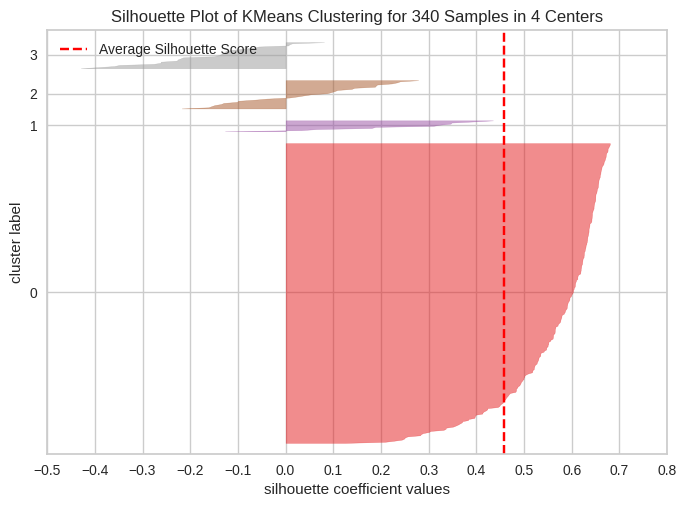

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhoutte Graph
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

####Selecting Model for Cluster

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
#Creating a copy of dataframe to preserve for later use
df_k4 = df.copy()

#Creating a copy of scaled dataframe
subset_scaled_df_k4 = subset_scaled_df.copy()

In [ ]:
# Adding Kmeans cluster labels to dataframe
df_k4["K_Groups"] = kmeans.labels_

# Adding Kmeans cluster labels to scaled dataframe
subset_scaled_df_k4["K_Groups"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = df_k4.groupby("K_Groups").mean()

In [ ]:
cluster_profile["number_in_K_Group"] = (
    df_k4.groupby("K_Groups")["Security"].count().values
)

In [ ]:
# Display Cluster Profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

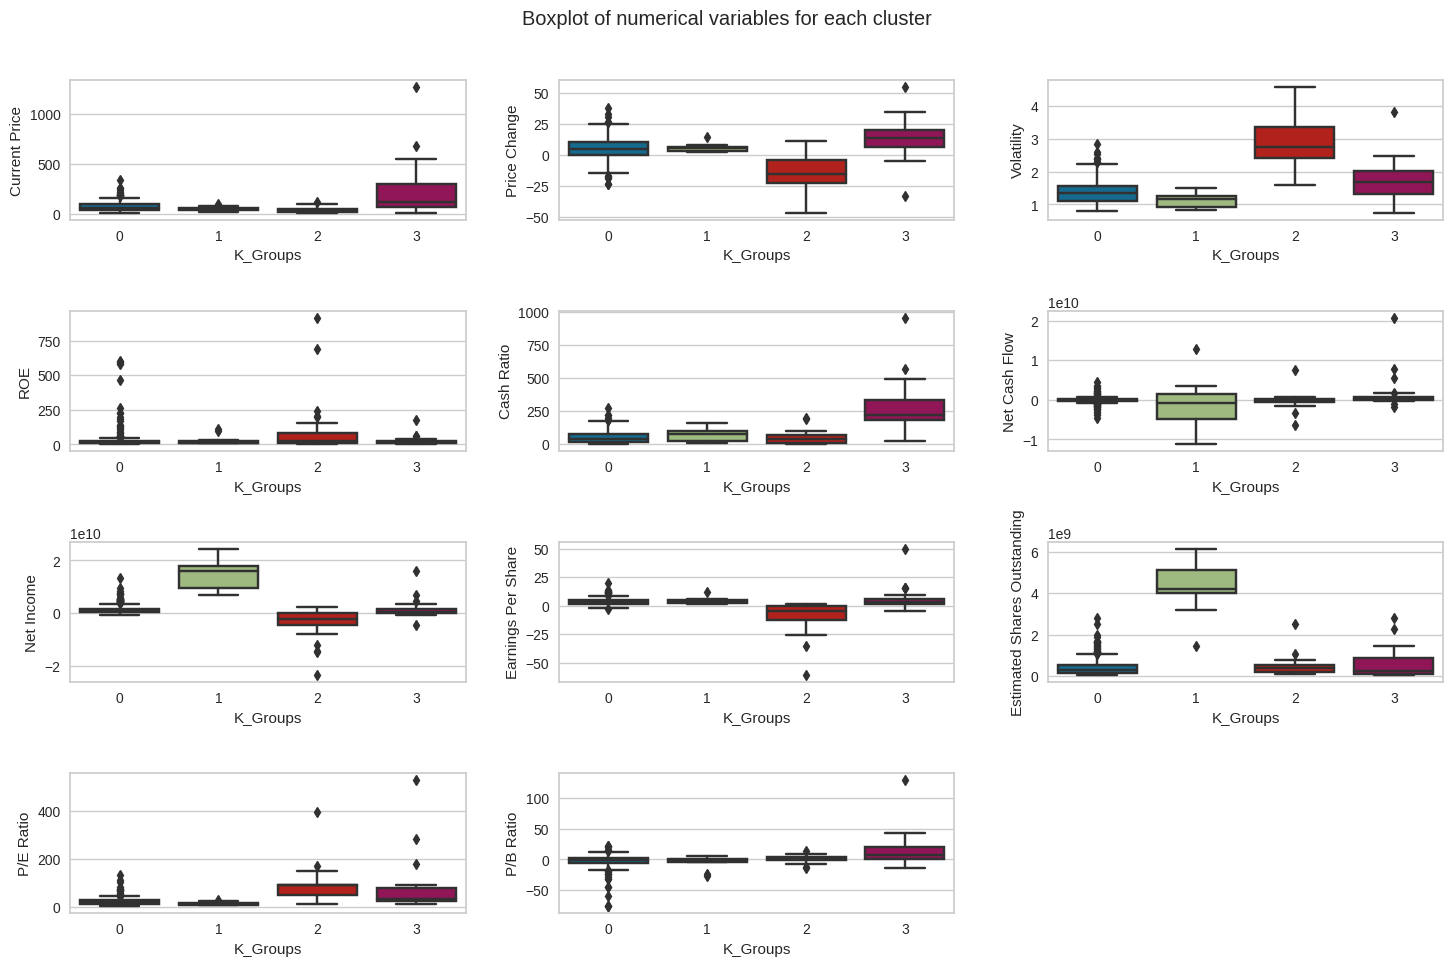

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_k4, x="K_Groups", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_Groups'>

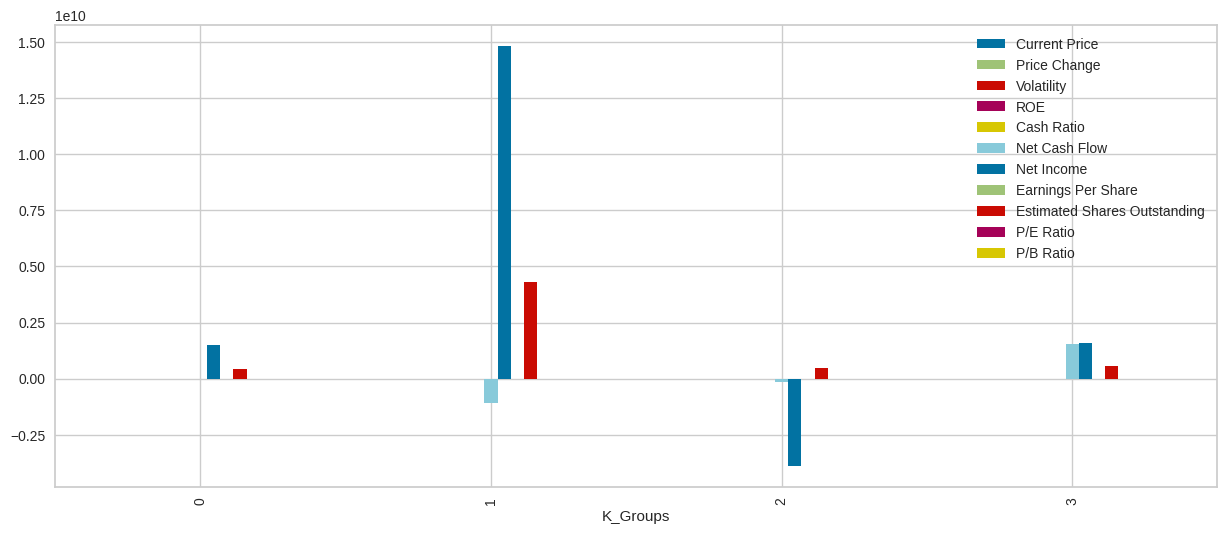

In [ ]:
df_k4.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='K_Groups'>

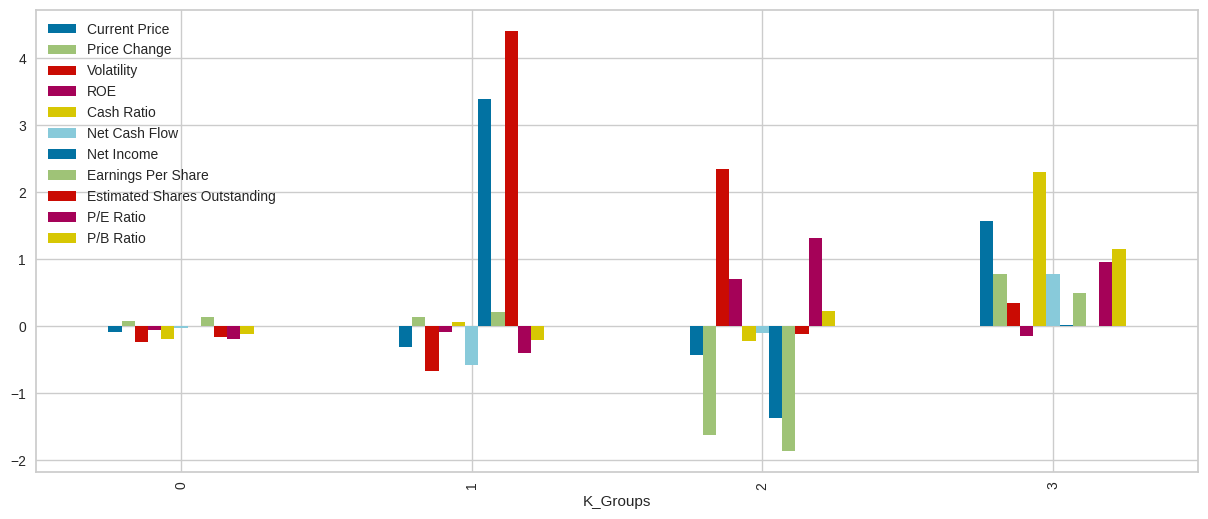

In [ ]:
subset_scaled_df_k4.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

In [ ]:
# Companies in each cluster group
for name in df_k4['K_Groups'].unique():
  print("Cluster {} contains these companies:".format(name))
  print(df_k4[df_k4['K_Groups'] == name]["Security"].unique())
  print()

Cluster 0 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International

In [ ]:
#Displaying how many companies are in each sector
df_k4.groupby(["GICS Sector"])["Security"].count()

GICS Sector
Consumer Discretionary         40
Consumer Staples               19
Energy                         30
Financials                     49
Health Care                    40
Industrials                    53
Information Technology         33
Materials                      20
Real Estate                    27
Telecommunications Services     5
Utilities                      24
Name: Security, dtype: int64

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df_k4.groupby(["K_Groups", "GICS Sector"])["Security"].count()

K_Groups  GICS Sector                
0         Consumer Discretionary         33
          Consumer Staples               17
          Energy                          6
          Financials                     45
          Health Care                    29
          Industrials                    52
          Information Technology         24
          Materials                      19
          Real Estate                    26
          Telecommunications Services     2
          Utilities                      24
1         Consumer Discretionary          1
          Consumer Staples                1
          Energy                          1
          Financials                      3
          Health Care                     2
          Information Technology          1
          Telecommunications Services     2
2         Energy                         22
          Industrials                     1
          Information Technology          3
          Materials                   

- Cluster 0: has the most companies contained, moderate earnings per share, low volitility, a negative cash flow
- Cluster 1: has the largest net income by far, and largest estimated shares outstanding, but has the lowest net cash flow (very large negative),lowest volitility
- Cluster 2: largest volatility, largest ROE, and largest P/E ratio, a negative price change overall, negative earnings pers share (lowest), lowest cash ratio
- Cluster 3: Largest: current price, price change, Cash ratio, Net Cash Flow, Earnings Per share, and P/B ratio; moderate volitility

###6 K-Groups

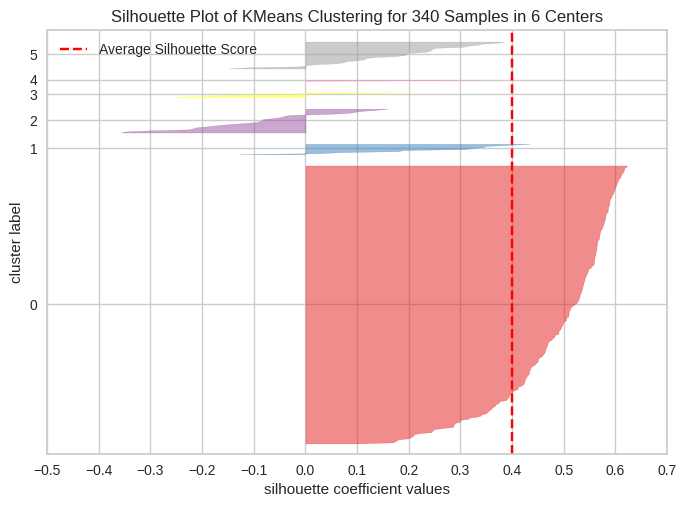

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhoutte Graph
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

####Selecting Model for Cluster

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
#Creating a copy of dataframe to preserve for later use
df_k6 = df.copy()

#Creating a copy of scaled dataframe
subset_scaled_df_k6 = subset_scaled_df.copy()

In [ ]:
# Adding Kmeans cluster labels to dataframe
df_k6["K_Groups"] = kmeans.labels_

# Adding Kmeans cluster labels to scaled dataframe
subset_scaled_df_k6["K_Groups"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = df_k6.groupby("K_Groups").mean()

In [ ]:
cluster_profile["number_in_K_Group"] = (
    df_k6.groupby("K_Groups")["Security"].count().values
)

In [ ]:
# Display Cluster Profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

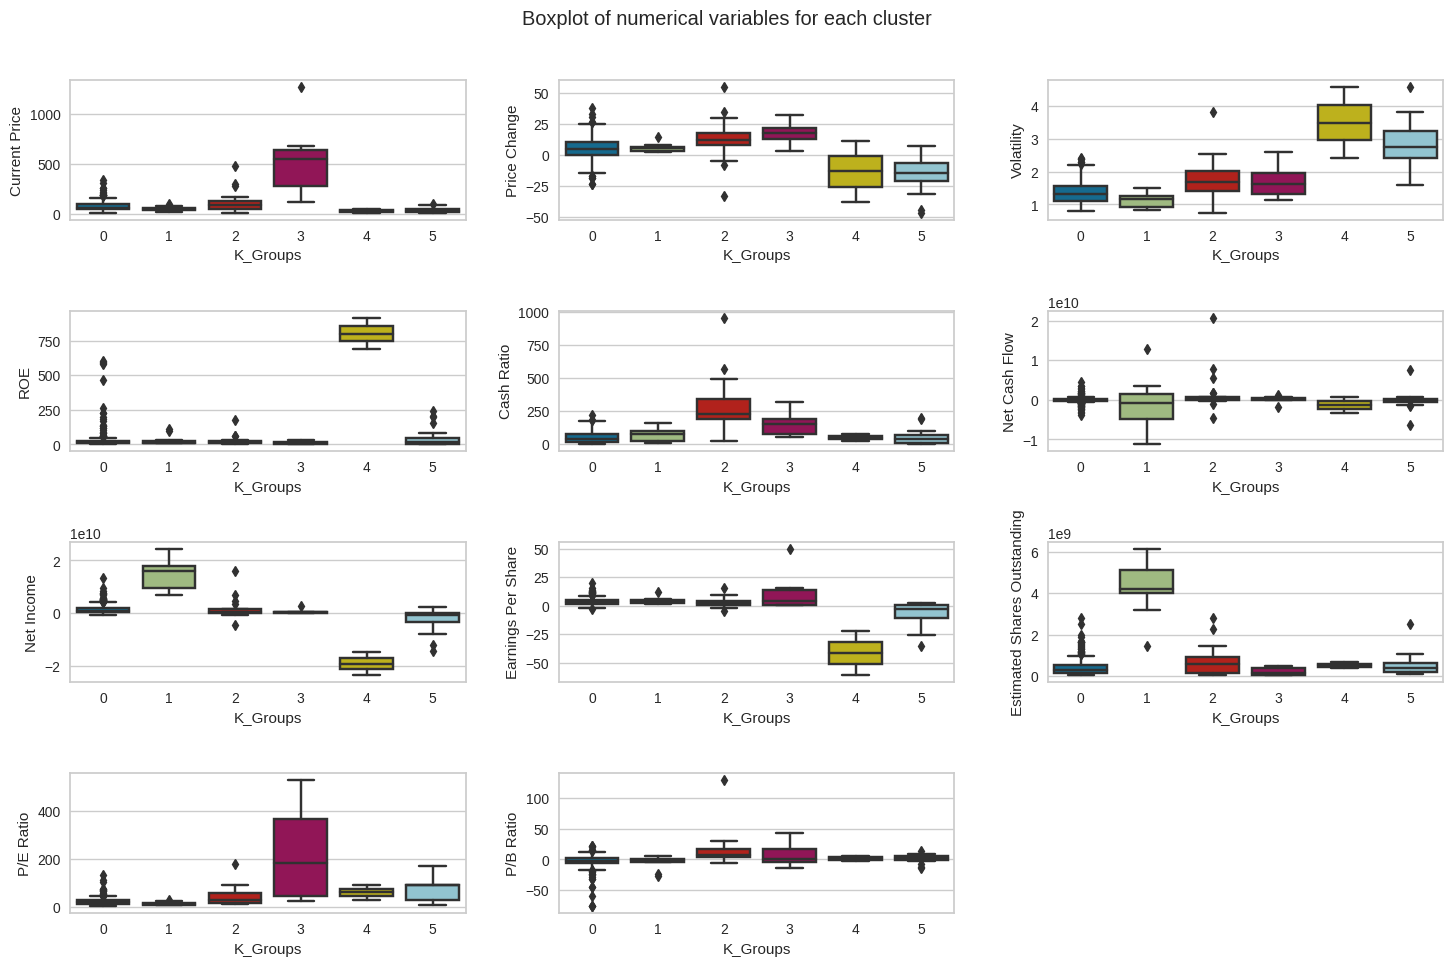

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_k6, x="K_Groups", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_Groups'>

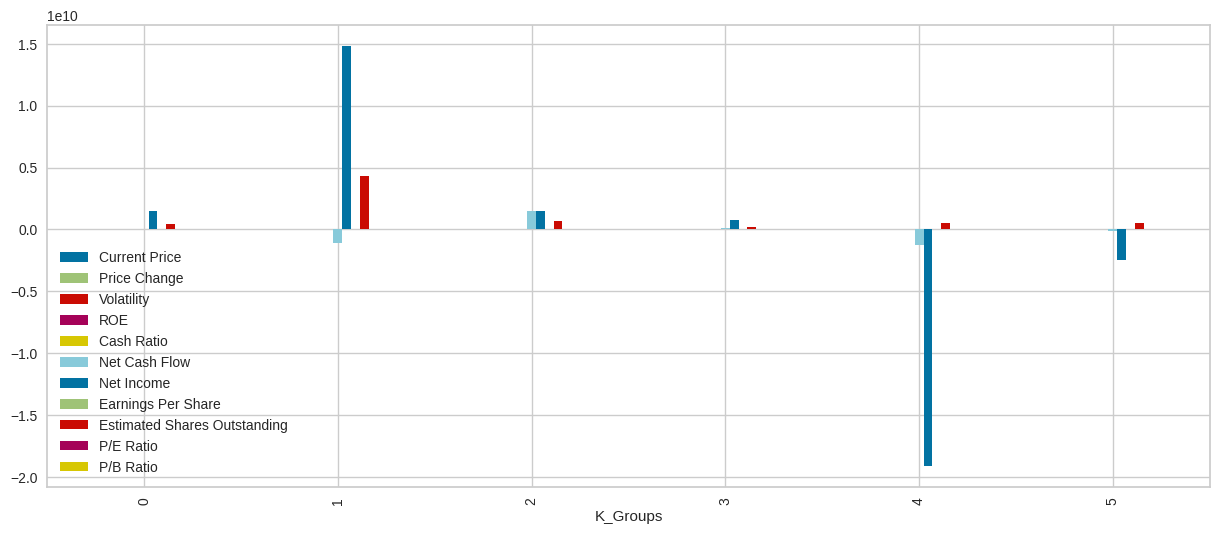

In [ ]:
df_k6.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='K_Groups'>

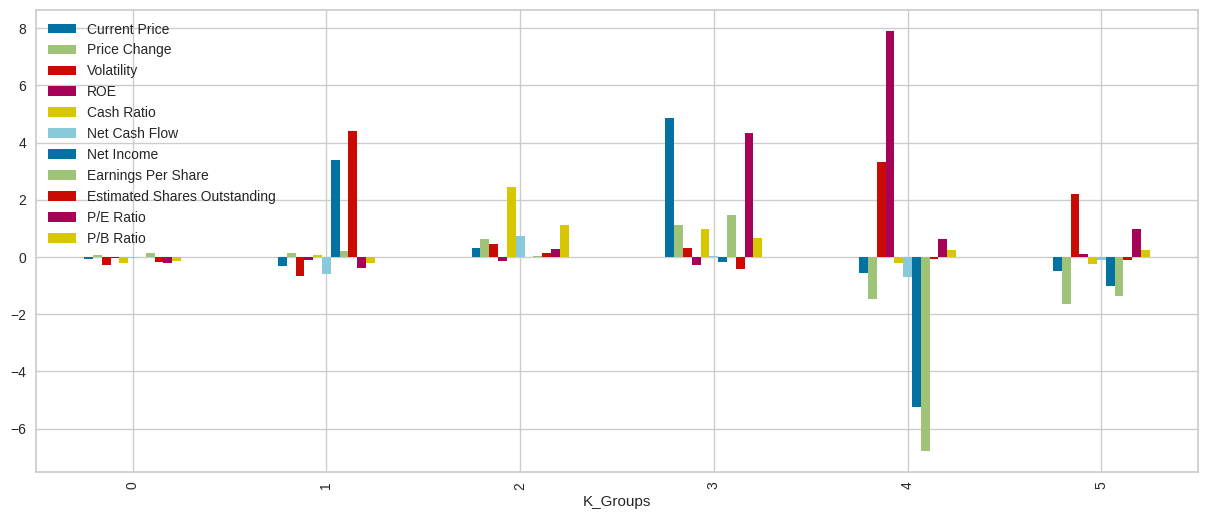

In [ ]:
subset_scaled_df_k6.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

In [ ]:
# Companies in each cluster group
for name in df_k6['K_Groups'].unique():
  print("Cluster {} contains these companies:".format(name))
  print(df_k6[df_k6['K_Groups'] == name]["Security"].unique())
  print()

Cluster 0 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 

In [ ]:
#Displaying how many companies are in each sector
df_k6.groupby(["GICS Sector"])["Security"].count()

GICS Sector
Consumer Discretionary         40
Consumer Staples               19
Energy                         30
Financials                     49
Health Care                    40
Industrials                    53
Information Technology         33
Materials                      20
Real Estate                    27
Telecommunications Services     5
Utilities                      24
Name: Security, dtype: int64

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df_k6.groupby(["K_Groups", "GICS Sector"])["Security"].count()

K_Groups  GICS Sector                
0         Consumer Discretionary         33
          Consumer Staples               17
          Energy                          5
          Financials                     45
          Health Care                    30
          Industrials                    51
          Information Technology         20
          Materials                      17
          Real Estate                    26
          Telecommunications Services     2
          Utilities                      24
1         Consumer Discretionary          1
          Consumer Staples                1
          Energy                          1
          Financials                      3
          Health Care                     2
          Information Technology          1
          Telecommunications Services     2
2         Consumer Discretionary          4
          Consumer Staples                1
          Energy                          1
          Financials                  

- Cluster 0: has the most companies, lowest price change, and all other variables are in the middle
- Cluster 1: has the highest net income and estimated shares outstanding, has the lowest P/B ratio and volatility, a negative net cash flow, second highest earnings per share
- Cluster 2: highest Cash Ratio, Net Cash Flow, and P/B ratio; second highest current price
- Cluster 3: highest current price, price change, earnings per share, and P/E ratio; second highest cash ratio and P/B ratio
- Cluster 4: highest volatility and ROE (is over 750 higher than the next cluster); lowest Earings per share; this is only a group of 2 and both are in the energy sector
- Cluster 5: has lowest price change (negative), high volatility, lowest Cash ratio, and a negative earnings per share

###8 K-Groups

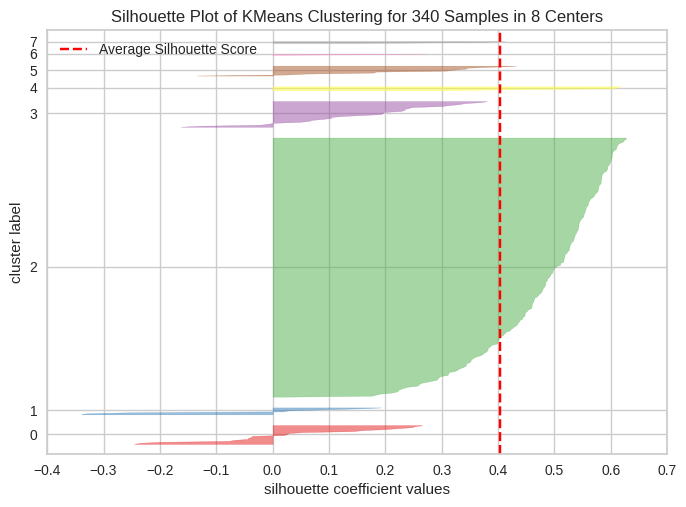

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhoutte Graph
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

####Selecting Model for Cluster

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(random_state=1)

In [ ]:
#Creating a copy of dataframe to preserve for later use
df_k8 = df.copy()

#Creating a copy of scaled dataframe
subset_scaled_df_k8 = subset_scaled_df.copy()

In [ ]:
# Adding Kmeans cluster labels to dataframe
df_k8["K_Groups"] = kmeans.labels_

# Adding Kmeans cluster labels to scaled dataframe
subset_scaled_df_k8["K_Groups"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = df_k8.groupby("K_Groups").mean()

In [ ]:
cluster_profile["number_in_K_Group"] = (
    df_k8.groupby("K_Groups")["Security"].count().values
)

In [ ]:
# Display Cluster Profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

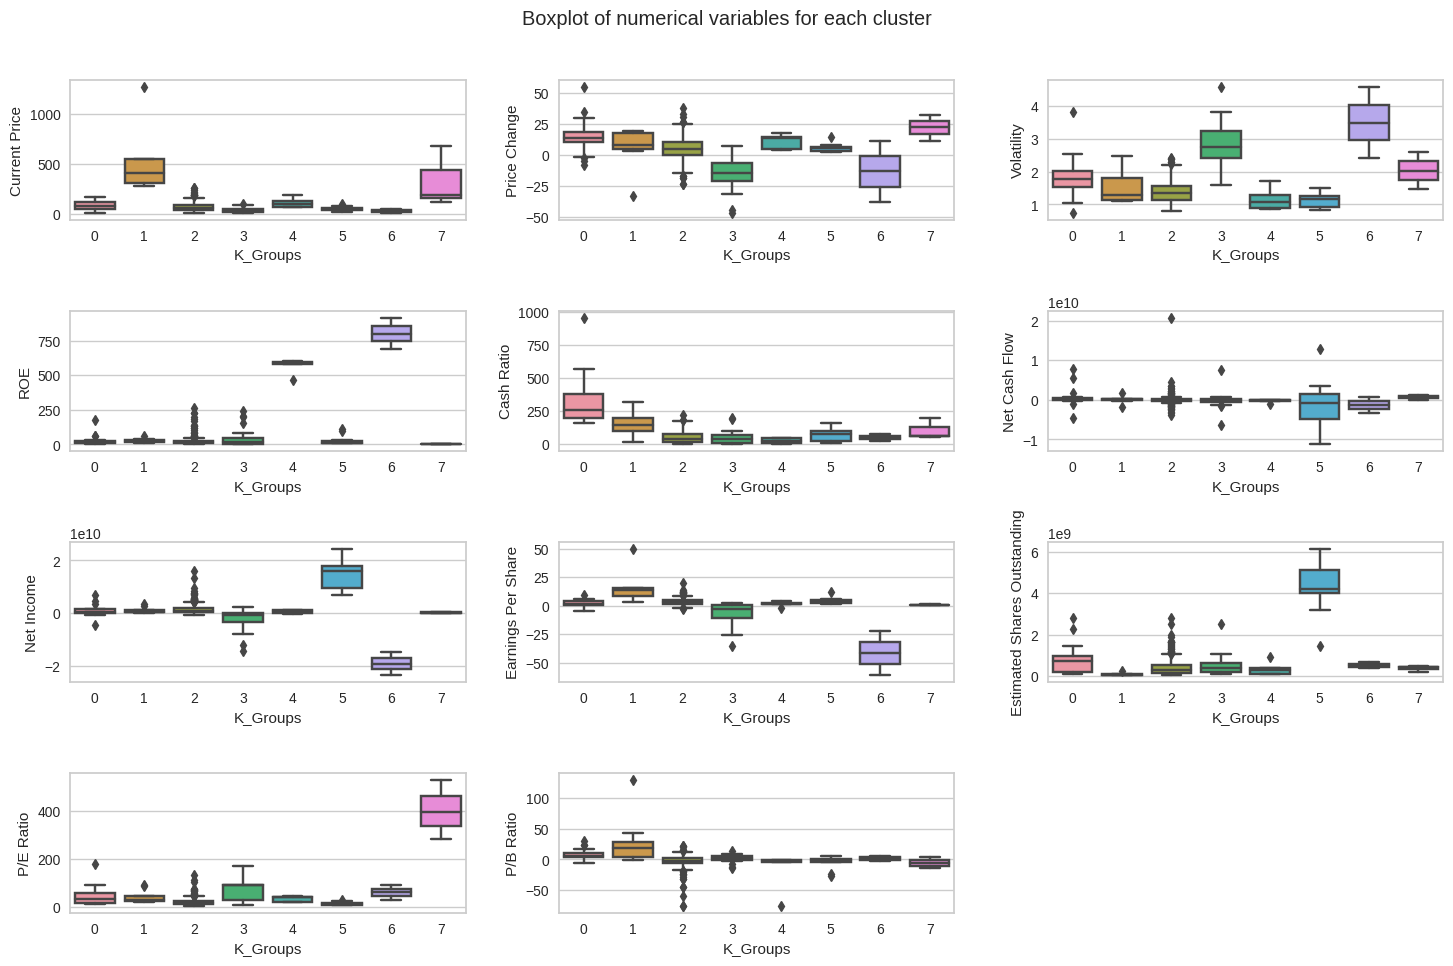

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_k8, x="K_Groups", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_Groups'>

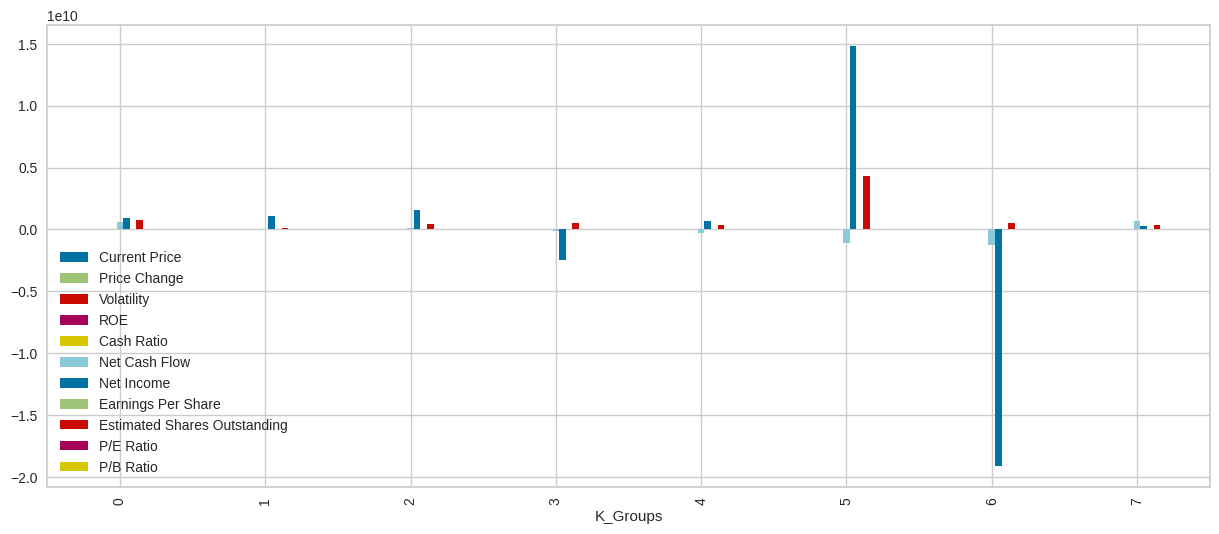

In [ ]:
df_k8.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='K_Groups'>

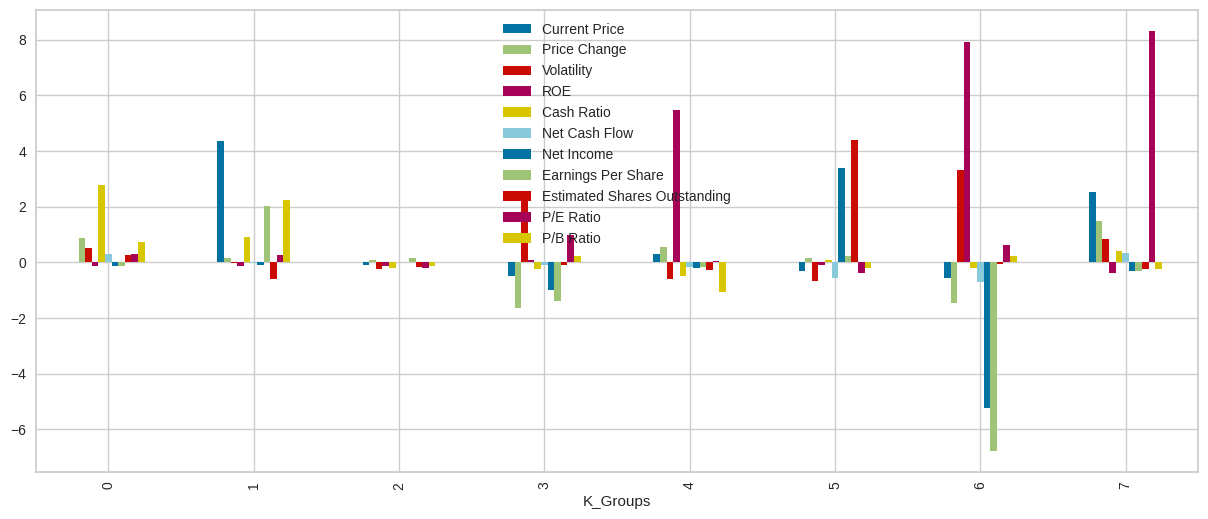

In [ ]:
subset_scaled_df_k8.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

In [ ]:
# Companies in each cluster group
for name in df_k8['K_Groups'].unique():
  print("Cluster {} contains these companies:".format(name))
  print(df_k8[df_k8['K_Groups'] == name]["Security"].unique())
  print()

Cluster 2 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 'CF Ind

In [ ]:
#Displaying how many companies are in each sector
df_k8.groupby(["GICS Sector"])["Security"].count()

GICS Sector
Consumer Discretionary         40
Consumer Staples               19
Energy                         30
Financials                     49
Health Care                    40
Industrials                    53
Information Technology         33
Materials                      20
Real Estate                    27
Telecommunications Services     5
Utilities                      24
Name: Security, dtype: int64

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df_k8.groupby(["K_Groups", "GICS Sector"])["Security"].count()

K_Groups  GICS Sector                
0         Consumer Discretionary          3
          Consumer Staples                1
          Energy                          1
          Health Care                     5
          Information Technology          8
          Materials                       1
          Telecommunications Services     1
1         Consumer Discretionary          2
          Health Care                     4
          Information Technology          1
          Real Estate                     1
2         Consumer Discretionary         32
          Consumer Staples               15
          Energy                          5
          Financials                     45
          Health Care                    28
          Industrials                    50
          Information Technology         20
          Materials                      17
          Real Estate                    26
          Telecommunications Services     2
          Utilities                   

- This clustering shows quite a bit of differences btween the clusters, but there are several clusters with very few companies, not lending to talking about generalizations; therefore, this would not be ideal to cluster, unless we wanted to pinpoint ceratian companies or if those companies are outliers

## Model Selected for K-Means Clustering

- Choosing a K of 6 for K-means clustering because it is depicting the best overall outlay of how the stock market fluctuates.  
  - There is a large group (cluster 0) which has a small price change, but stays in the middle of the pack, which is typical of most stocks.
  - Cluster 1 & Cluster 4 remained the same even when brken into more groups, showing they are clustered approriately
  - Cluster 5 remained the same for 4 through 8 clusters, showing these companies are clustered appropriately
- Cluster 4 are outliers from the group because of how much it changed the mean of the other cluster they were previously in, when there was less clusters
- Cluster 3 seems to be the hot stocks on the market at this time since they had the largest price change, overall current price, earnings per share, and have a P/E ratio over tripple the next cluster

**Observations**

- **Cluster 0**
  - Count in Cluster: **270 and all sectors represented and all utilities**
  - Current Price: low-medium (73.85)
  - Price Change: low (5.11)
  - Volatility: low (1.3)
  - ROE: low with several high outliers (35.26)
  - Cash Ratio: low (50.64)
  - Net Cash Flow: low
  - Net Income: low
  - Earnings Per Share: low
  - Estimated Shares Outstanding: low
  - P/E Ratio:low
  - P/B Ratio: low in the negatives, with several low outliers
- **Cluster 1**
  - Count in Cluster: 11, from 7 sectors
  - Current Price:low (50.5)
  - Price Change: **lowest positive with little variability**
  - Volatility: **lowest**
  - ROE: low
  - Cash Ratio: low-medium
  - Net Cash Flow: large negative
  - Net Income: **highest**
  - Earnings Per Share: low
  - Estimated Shares Outstanding: **highest,** minimum value excluding the low outlier is greater than all other groupings maximums
  - P/E Ratio: **lowest**
  - P/B Ratio: **lowest in the negatives**
  
- **Cluster 2**
  - Count in Cluster: 24 from 9 sectors
  - Current Price: medium (111.6)
  - Price Change: medium (11.8)
  - Volatility: low-medium (1.8)
  - ROE: Low
  - Cash Ratio: **Highest (290) almost double the next highst group**
  - Net Cash Flow: **Highest**
  - Net Income: low
  - Earnings Per Share: **lowest**
  - Estimated Shares Outstanding: low-medium
  - P/E Ratio: low
  - P/B Ratio: **highest (13.9)**

- **Cluster 3**
  - Count in Cluster:6 from 3 sectors
  - Current Price: **Highest **(557.5)
  - Price Change: **Highest** (17.4)
  - Volatility: low-medium (1.7)
  - ROE: **lowest** (12)
  - Cash Ratio: medium-high
  - Net Cash Flow: low
  - Net Income: lowest positive
  - Earnings Per Share: **highest** (12.4)
  - Estimated Shares Outstanding: lowest
  - P/E Ratio: **Highest**, median is higher than all other points from other sectors
  - P/B Ratio: medium

- **Cluster 4**
  - Count in Cluster: 2; Energy sector only - 'Apache Corporation' 'Chesapeake Energy'
  - Current Price:** lowest** (24.5)
  - Price Change: **negative** medium
  - Volatility: **Highest** (3.5)
  - ROE: **Highest** (802) next highest is less than 50
  - Cash Ratio: low
  - Net Cash Flow: **negative lowest**
  - Net Income: **negative lowest**
  - Earnings Per Share: **lowest negative **(-41.8))
  - Estimated Shares Outstanding: low-medium
  - P/E Ratio: medium
  - P/B Ratio: low

- **Cluster 5**
  - Count in Cluster: 27; from four sectors; 21 are from the energy sector, this is **70% of energy sector**
  - Current Price: low
  - Price Change: **largest negative** (-15.5)
  - Volatility: Medium-high (2.8)
  - ROE: low-medium
  - Cash Ratio: **lowest**
  - Net Cash Flow: low negative
  - Net Income: negative
  - Earnings Per Share: negative low-medium
  - Estimated Shares Outstanding: low
  - P/E Ratio:low-medium
  - P/B Ratio:low


**Clusters**
- Cluster 0: has the most companies, lowest price change, and all other variables are in the middle
- Cluster 1: has the highest net income and estimated shares outstanding, has the lowest P/B ratio and volatility, a negative net cash flow, second highest earnings per share
- Cluster 2: highest Cash Ratio, Net Cash Flow, and P/B ratio; second highest current price
- Cluster 3: highest current price, price change, earnings per share, and P/E ratio; second highest cash ratio and P/B ratio
- Cluster 4: highest volatility and ROE (is over 750 higher than the next cluster); lowest Earings per share; this is only a group of 2 and both are in the energy sector
- Cluster 5: has lowest price change (negative), high volatility, lowest Cash ratio, and a negative earnings per share

###6 K-Groups

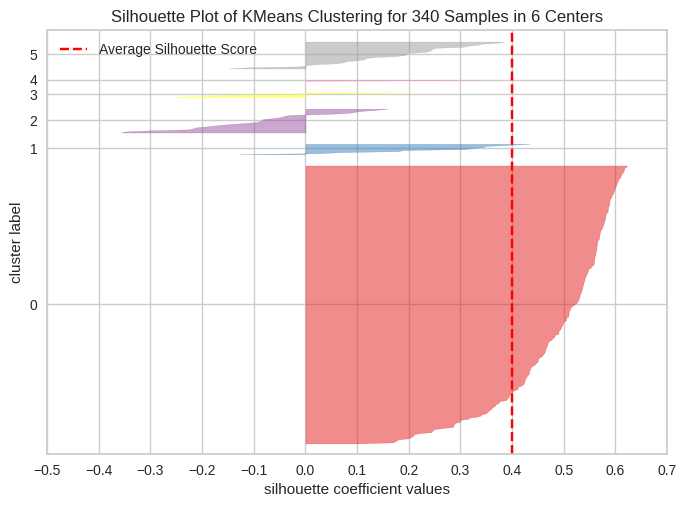

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhoutte Graph
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

####Selecting Model for Cluster

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
#Creating a copy of dataframe to preserve for later use
df_k6 = df.copy()

#Creating a copy of scaled dataframe
subset_scaled_df_k6 = subset_scaled_df.copy()

In [ ]:
# Adding Kmeans cluster labels to dataframe
df_k6["K_Groups"] = kmeans.labels_

# Adding Kmeans cluster labels to scaled dataframe
subset_scaled_df_k6["K_Groups"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = df_k6.groupby("K_Groups").mean()

In [ ]:
cluster_profile["number_in_K_Group"] = (
    df_k6.groupby("K_Groups")["Security"].count().values
)

In [ ]:
# Display Cluster Profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

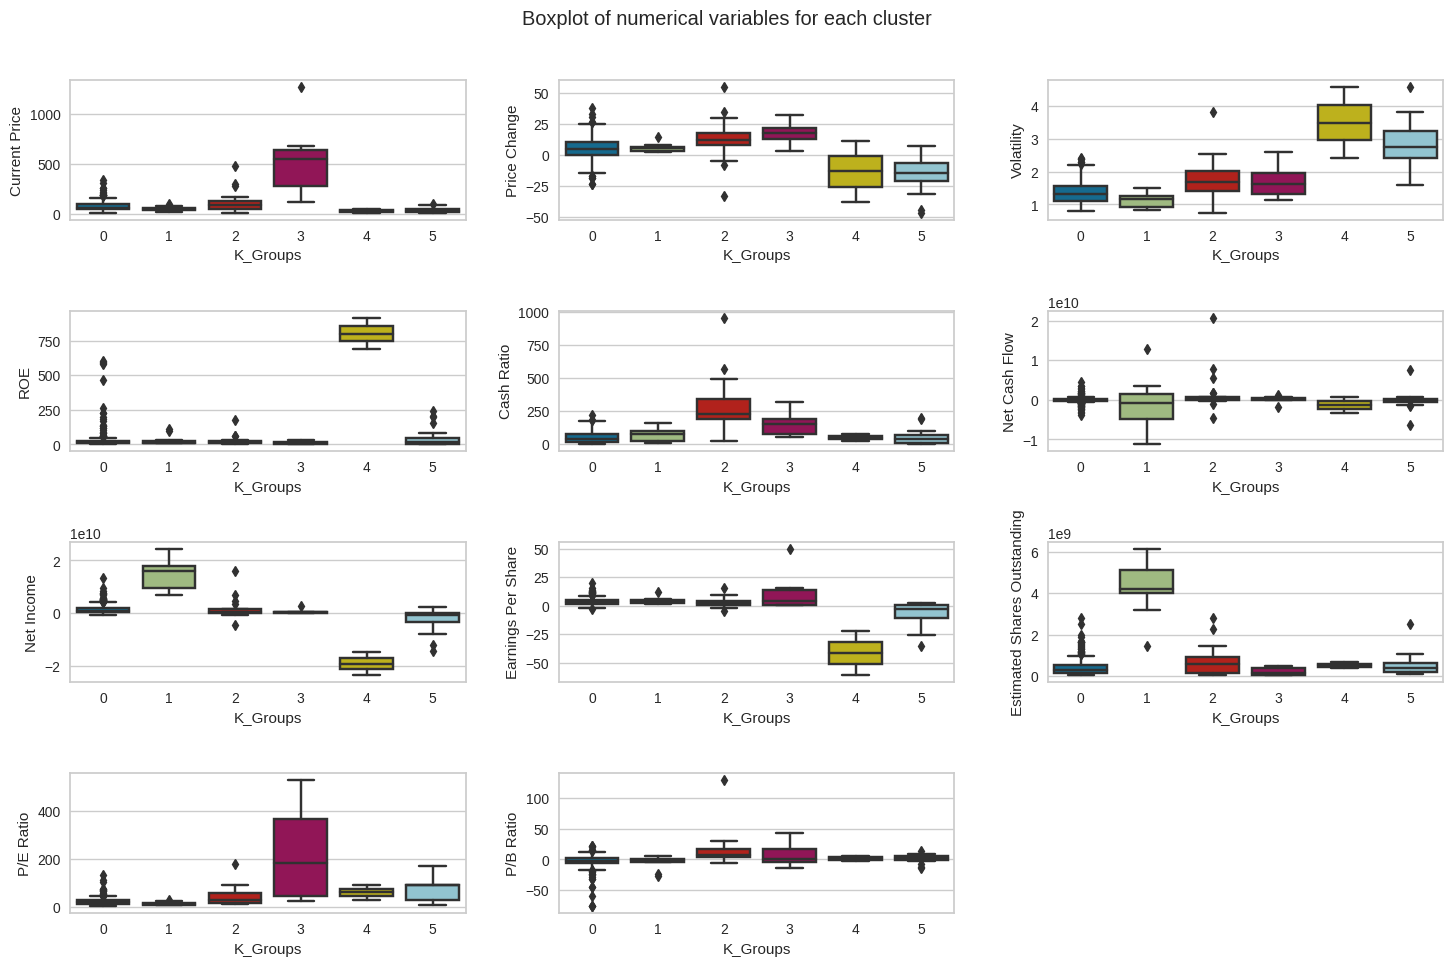

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_k6, x="K_Groups", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_Groups'>

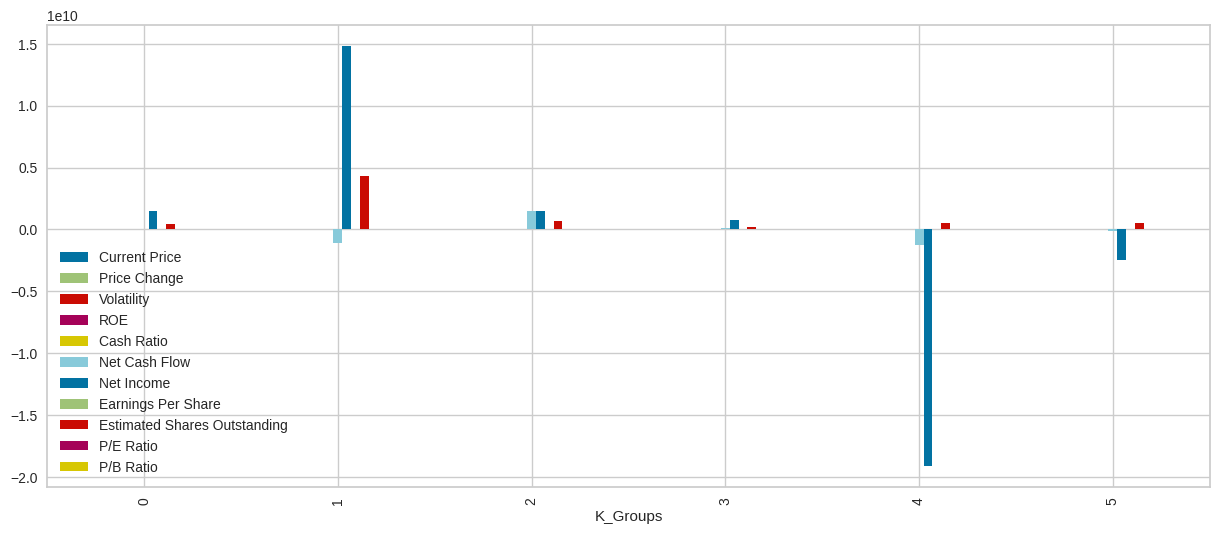

In [ ]:
df_k6.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='K_Groups'>

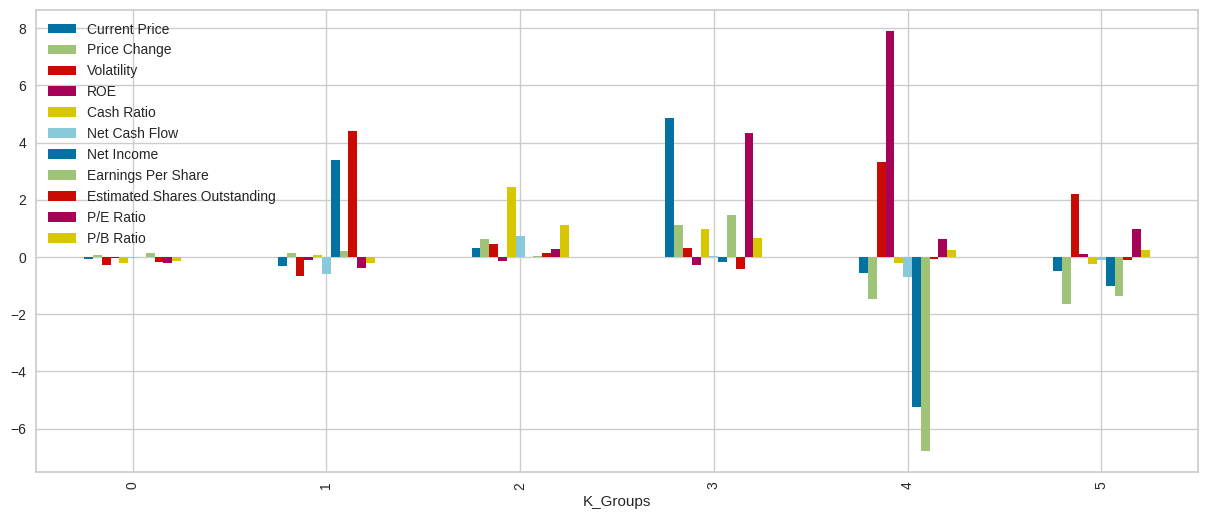

In [ ]:
subset_scaled_df_k6.groupby("K_Groups").mean().plot.bar(figsize=(15, 6))

In [ ]:
# Companies in each cluster group
for name in df_k6['K_Groups'].unique():
  print("Cluster {} contains these companies:".format(name))
  print(df_k6[df_k6['K_Groups'] == name]["Security"].unique())
  print()

Cluster 0 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 

In [ ]:
#Displaying how many companies are in each sector
df_k6.groupby(["GICS Sector"])["Security"].count()

GICS Sector
Consumer Discretionary         40
Consumer Staples               19
Energy                         30
Financials                     49
Health Care                    40
Industrials                    53
Information Technology         33
Materials                      20
Real Estate                    27
Telecommunications Services     5
Utilities                      24
Name: Security, dtype: int64

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df_k6.groupby(["K_Groups", "GICS Sector"])["Security"].count()

K_Groups  GICS Sector                
0         Consumer Discretionary         33
          Consumer Staples               17
          Energy                          5
          Financials                     45
          Health Care                    30
          Industrials                    51
          Information Technology         20
          Materials                      17
          Real Estate                    26
          Telecommunications Services     2
          Utilities                      24
1         Consumer Discretionary          1
          Consumer Staples                1
          Energy                          1
          Financials                      3
          Health Care                     2
          Information Technology          1
          Telecommunications Services     2
2         Consumer Discretionary          4
          Consumer Staples                1
          Energy                          1
          Financials                  

- Cluster 0: has the most companies, lowest price change, and all other variables are in the middle
- Cluster 1: has the highest net income and estimated shares outstanding, has the lowest P/B ratio and volatility, a negative net cash flow, second highest earnings per share
- Cluster 2: highest Cash Ratio, Net Cash Flow, and P/B ratio; second highest current price
- Cluster 3: highest current price, price change, earnings per share, and P/E ratio; second highest cash ratio and P/B ratio
- Cluster 4: highest volatility and ROE (is over 750 higher than the next cluster); lowest Earings per share; this is only a group of 2 and both are in the energy sector
- Cluster 5: has lowest price change (negative), high volatility, lowest Cash ratio, and a negative earnings per share

## Hierarchical Clustering

In [ ]:
# Creating a copy of the subset scaled dataframe for Hierarchical Clustering
HC_df = subset_scaled_df.copy()

### Checking Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(HC_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(HC_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


####Explore different linkage methods with Euclidean distance

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(HC_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(HC_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Displaying dendrograms for the different linkage methods.**

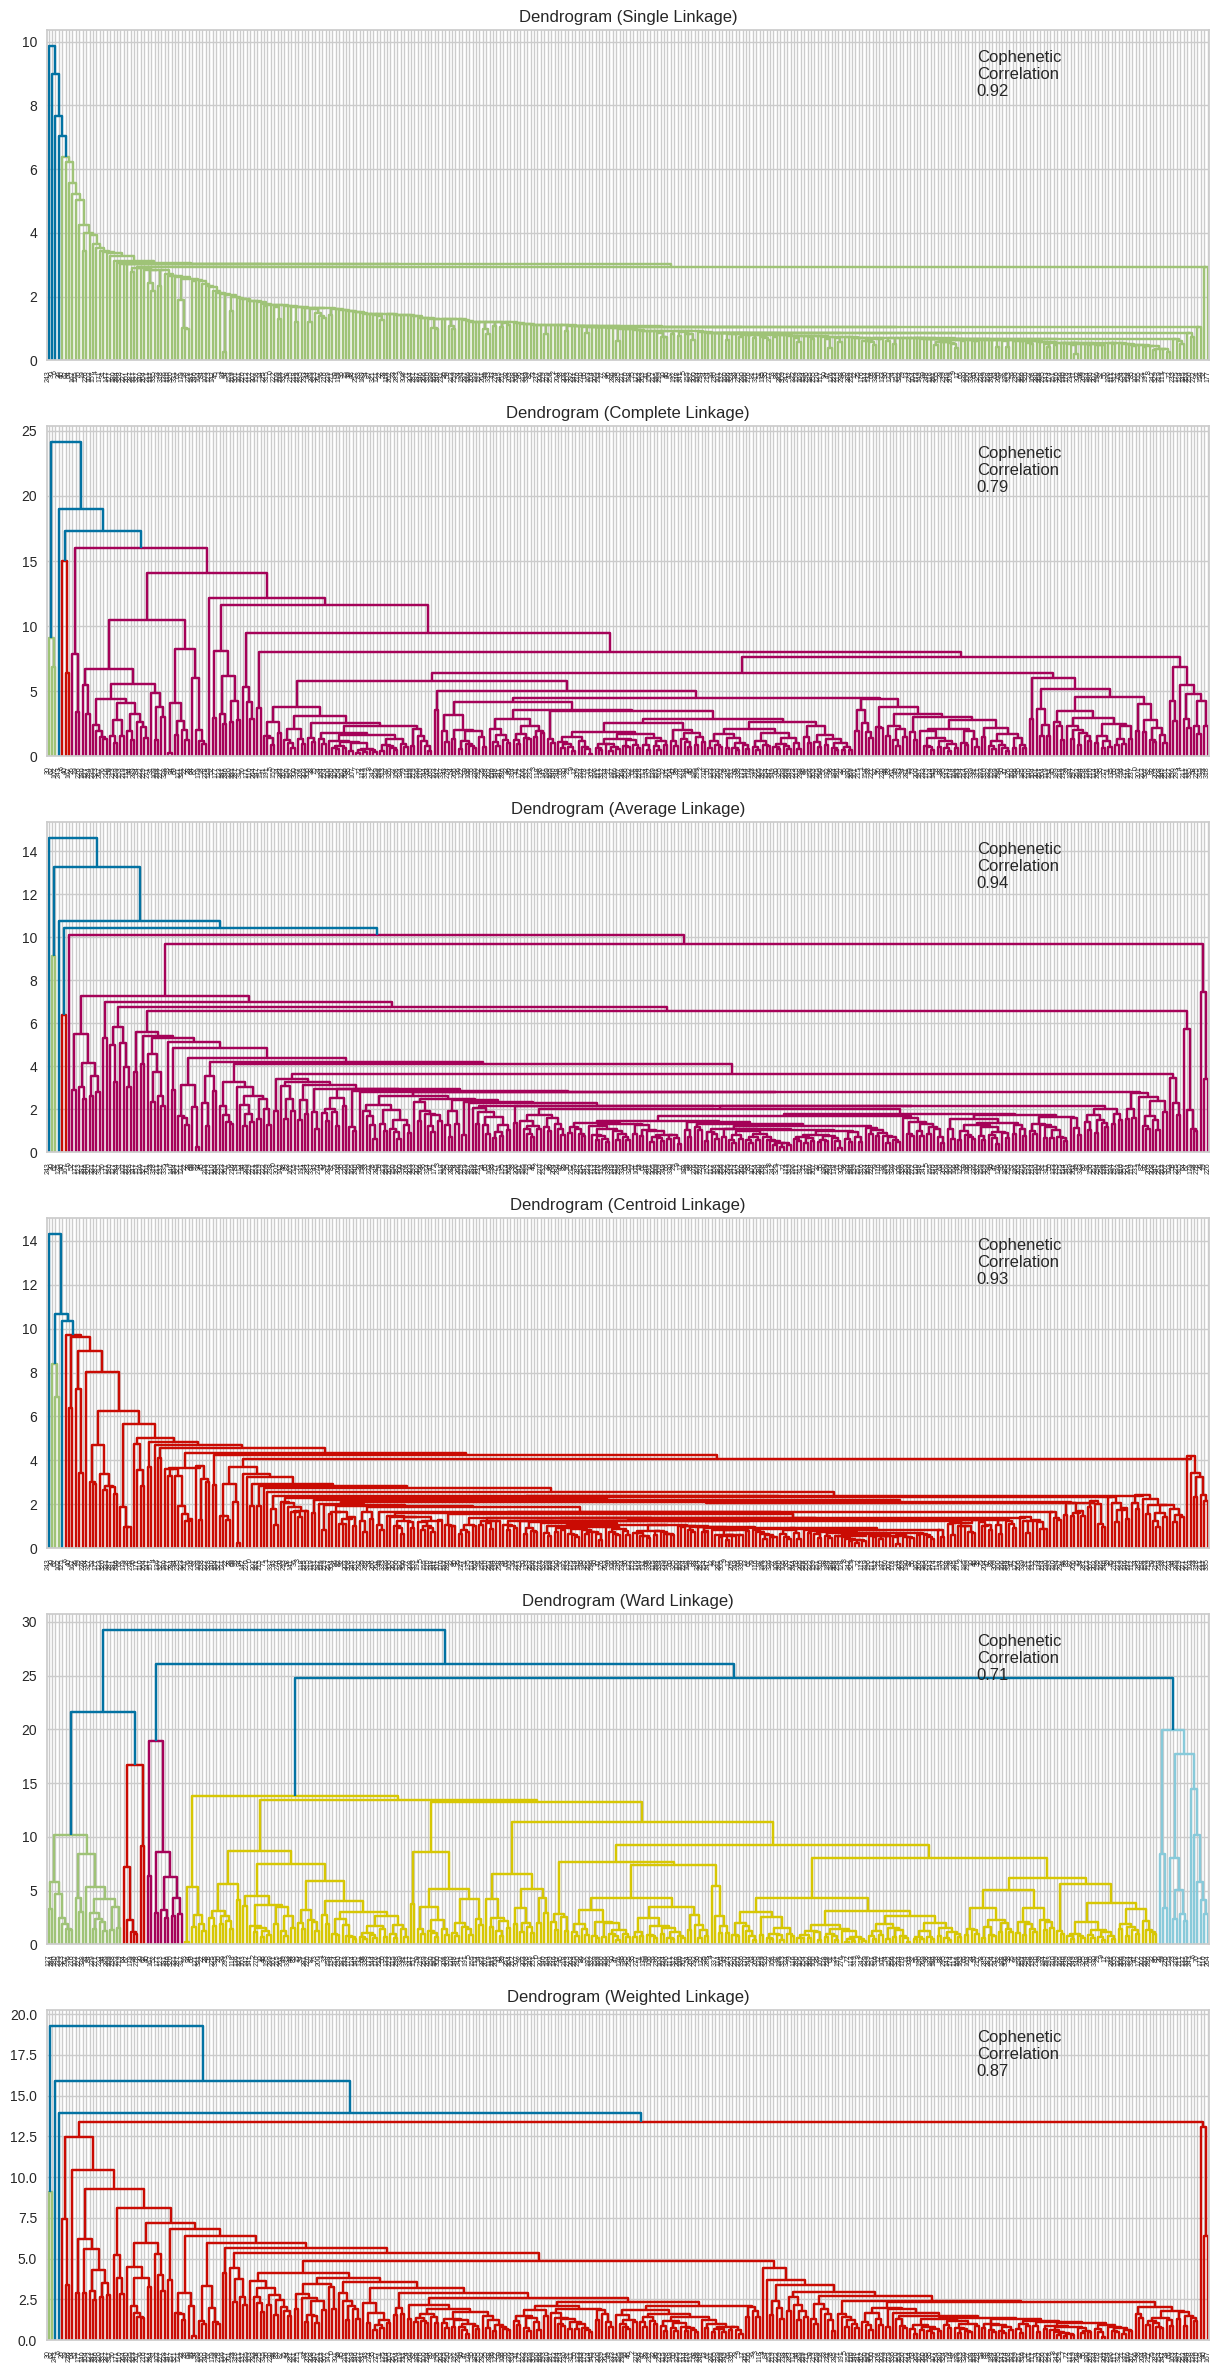

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(HC_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HC_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average linkage method at .94.
- We will move ahead with average linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage. This appears to be where most linkages are approximately the same.

### Creating Model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(HC_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [ ]:
#Creating a copy of dataframe to preserve dataframe
df2 = df.copy()

In [ ]:
# Adding HC Cluster Labels to scaled dataframe
HC_df["HC_Clusters"] = HCmodel.labels_
#Adding HC Cluster Labels to original dataframe
df2["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
# Companies in the HC Clusters
for name in df2["HC_Clusters"].unique():
    print("Cluster {} contains these companies:".format(name))
    print(df2[df2["HC_Clusters"] == name]["Security"].unique())
    print()

Cluster 0 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Bank

**Observation**
- There are two of the three clusters which two or less companies; therefore this doesn't seem like an appropriate use.  This doesn' not look good because the clusters do not have enough variability.


- Lets try using the Ward linkage as it has more distinct and seperated clusters ( as seen fro it's dendrogram).  6 appears to be the appropriate number of clusters fro the dendorgram for Ward linkage.

### Creating Model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(HC_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [ ]:
#Creating a copy of dataframe to preserve dataframe
df3 = df.copy()

In [ ]:
# Adding HC Cluster Labels to scaled dataframe
HC_df["HC_Clusters"] = HCmodel.labels_
#Adding HC Cluster Labels to original dataframe
df3["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile = df3.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df3.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
# Companies in the HC Clusters
for name in df3["HC_Clusters"].unique():
    print("Cluster {} contains these companies:".format(name))
    print(df3[df3["HC_Clusters"] == name]["Security"].unique())
    print()

Cluster 3 contains these companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Gro

In [ ]:
# Displaying how many Companies are in each sector within each K_Group Cluster
df3.groupby(["HC_Clusters", "GICS Sector"])["Security"].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

- Using the Ward method there is more variability between the clusters.

In [ ]:
# Displaying Cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

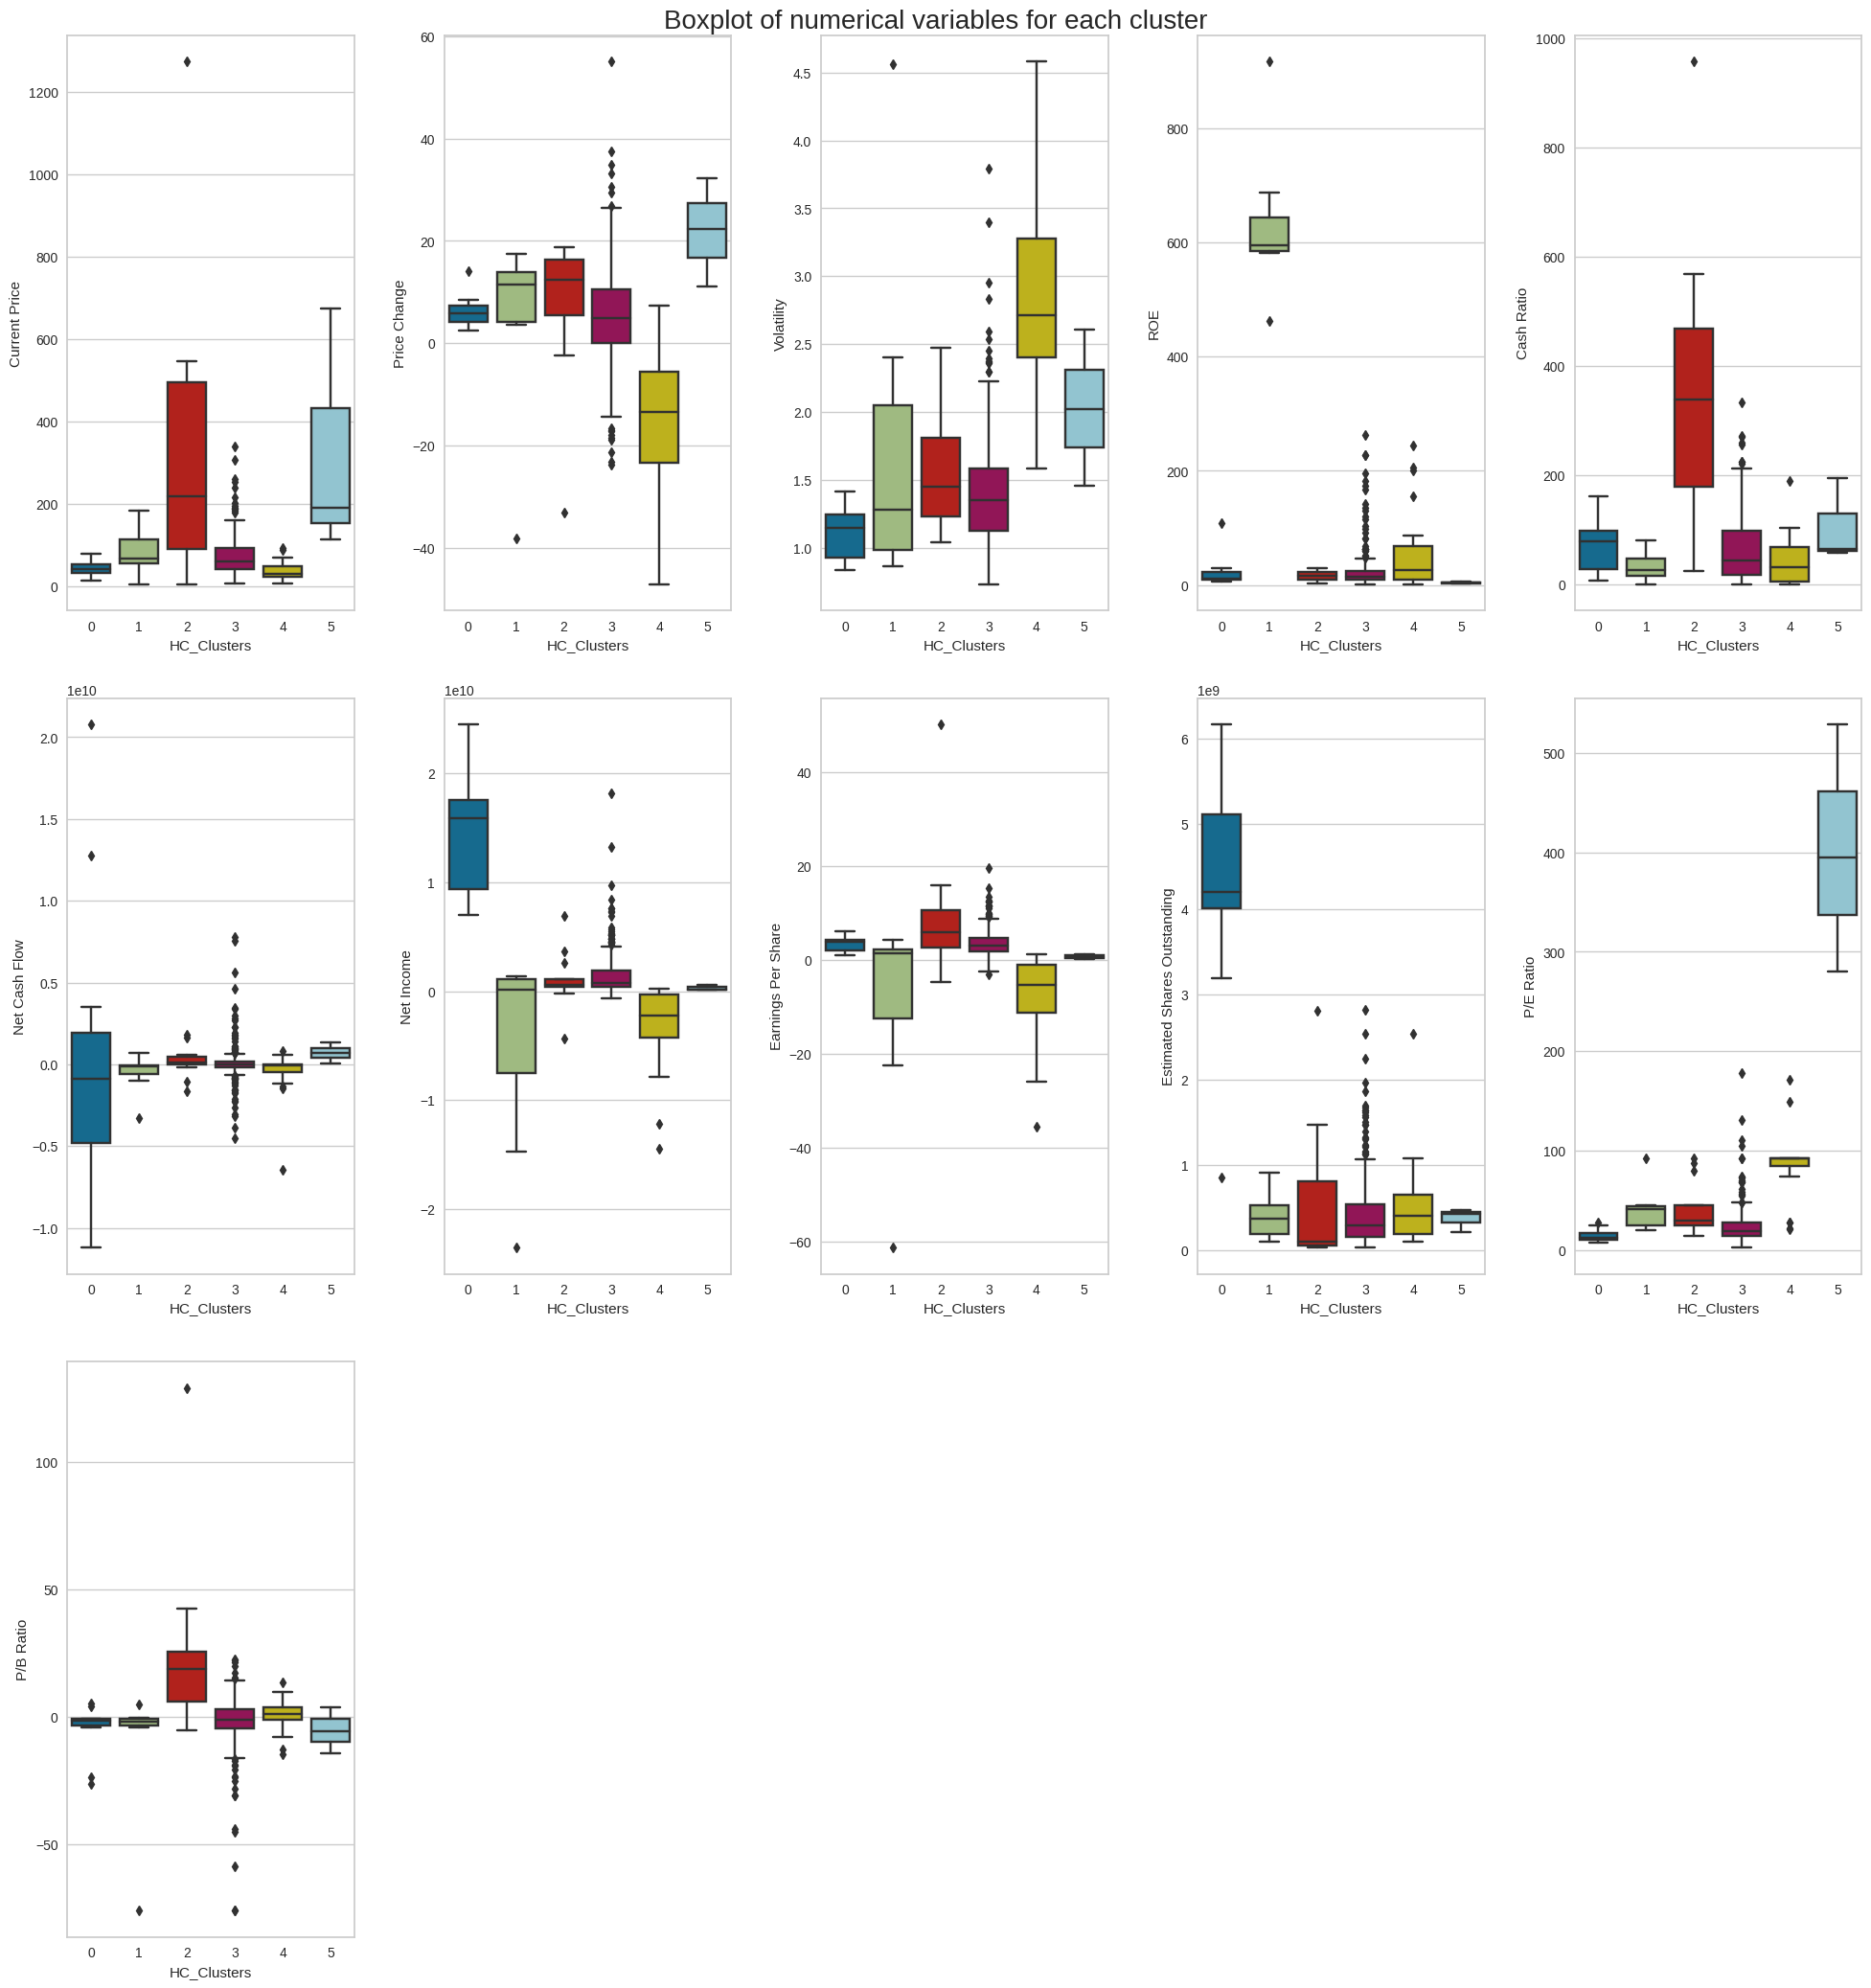

In [ ]:
# Plotting boxplots of clusters from Ward
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(data=df3, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='HC_Clusters'>

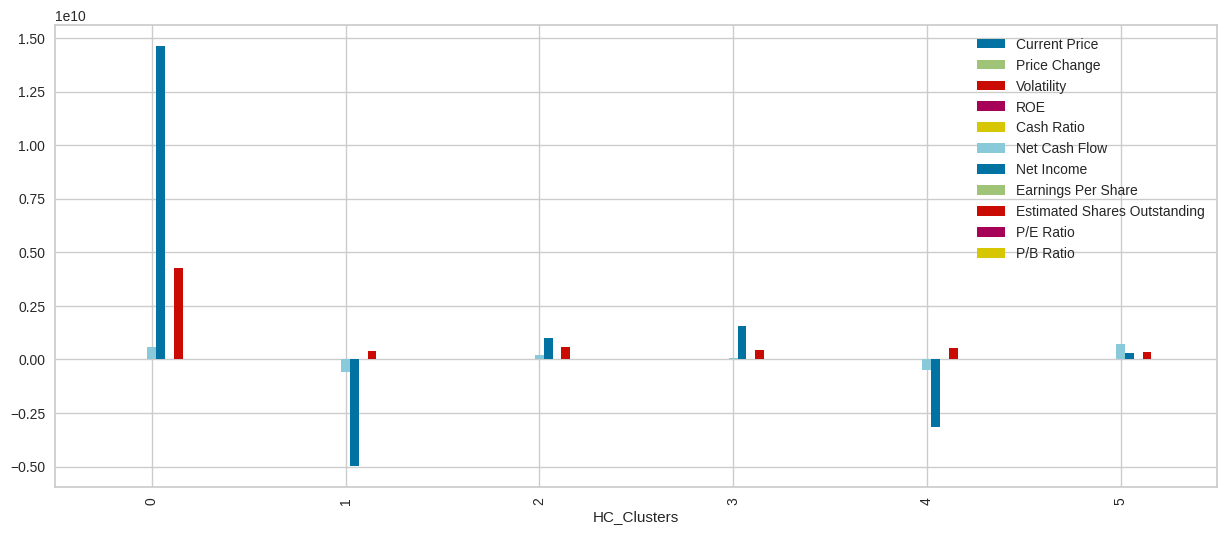

In [ ]:
#Bargraph of clusters
df3.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_Clusters'>

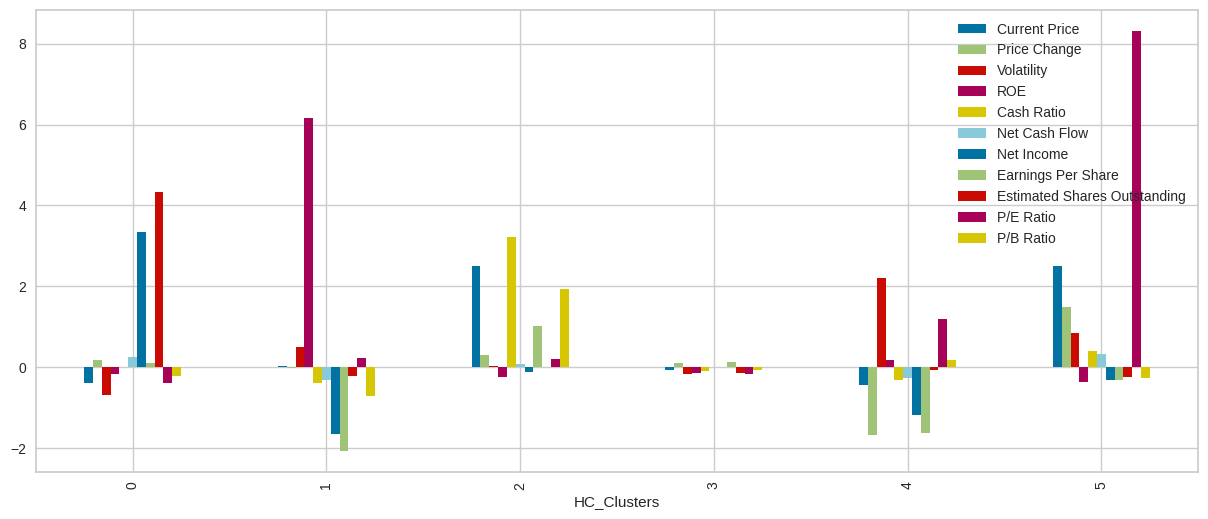

In [ ]:
#Bargraphs of Scaled Clusters
HC_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

**Observations**

- **Cluster 0**
  - Count in Cluster: 11 from 7 sectors
  - Current Price: low
  - Price Change: low
  - Volatility: **lowest**
  - ROE: low
  - Cash Ratio: medium
  - Net Cash Flow: medium with large variability
  - Net Income: **Highest**
  - Earnings Per Share: low
  - Estimated Shares Outstanding: **Highest**; Minimum is higher than all high outliers in other clusters
  - P/E Ratio: **Lowest** with low variability
  - P/B Ratio: negative low
- **Cluster 1**
  - Count in Cluster: 7, from 5 sectors; 'Apache Corporation' 'Chesapeake Energy'
  - Current Price: medium
  - Price Change: low
  - Volatility: low-medium
  - ROE: **Highest**; Lowest outlier is higher than any other sectors maximum outlier; mean is over ten times higher than all other sectors
  - Cash Ratio: **Lowest** with low variability
  - Net Cash Flow: **Lowest negative**
  - Net Income: **Lowest negative**
  - Earnings Per Share: **Lowest negative**
  - Estimated Shares Outstanding: low
  - P/E Ratio: low
  - P/B Ratio: **lowest negative**
  
- **Cluster 2**
  - Count in Cluster: 12 from 6 sectors
  - Current Price: **High** (325)
  - Price Change: Medium
  - Volatility: low
  - ROE:low
  - Cash Ratio: **Highest** (360) with high variability
  - Net Cash Flow: low
  - Net Income: low
  - Earnings Per Share: **Highest**(9.54)
  - Estimated Shares Outstanding: low
  - P/E Ratio:low
  - P/B Ratio: **Highest** with one very extreme high outlier

- **Cluster 3**
  - Count in Cluster: **285 from all sectors; all utilities**
  - Current Price: low-medium (72.7)
  - Price Change: low (5.3) with high variability
  - Volatility: low (1.4) with high variability and several high outliers
  - ROE: low (25.6) with several high outliers
  - Cash Ratio: low-medium
  - Net Cash Flow: low with several high and low outliers
  - Net Income: low with several high outlers
  - Earnings Per Share: low
  - Estimated Shares Outstanding: low
  - P/E Ratio: low
  - P/B Ratio: low negative

- **Cluster 4**
  - Count in Cluster:22 from 3 sectors; 20 are from the energy sector
  - Current Price: **Lowest**
  - Price Change: **Lowest Negative**
  - Volatility: **Highest** (2.8)
  - ROE: low-medium (57)
  - Cash Ratio: low (42)
  - Net Cash Flow: Low negative
  - Net Income: Lowest Median
  - Earnings Per Share: negative medium
  - Estimated Shares Outstanding: low
  - P/E Ratio: medium
  - P/B Ratio: low

- **Cluster 5**
  - Count in Cluster: 3 from 3 sectors; 'Alexion Pharmaceuticals' 'Amazon.com Inc' 'Netflix Inc.'
  - Current Price: **Highest** (327)
  - Price Change: **Highest** (21.9)
  - Volatility: medium (2.1)
  - ROE: **Lowest** with low variability
  - Cash Ratio: Medium
  - Net Cash Flow: **Highest** with low variability
  - Net Income: Low with low variability
  - Earnings Per Share: low positive with low variability
  - Estimated Shares Outstanding: low with low variability
  - P/E Ratio: **Highest(400.9); four times higher than any other cluster** These three were also the highest outliers on P/E Ratio
  - P/B Ratio: low negative


## K-means vs Hierarchical Clustering

K-means clustering took less time to execute because of the number of companies in the market.

**- Both Clustering Methods**
  - Gave 6 clusters
  - One Cluster had about 80% or more of companies
    - K-means cluster 0 (270 companies);  Hierarchical cluster 3 (285 companies)
    - This clusters were mostly low on all aspects
    - Had similar price change and current price
    - This group is similar to the majority of companies because there is a slow and steady grwoth in the market
  - Gave a cluster that contained majority of Energy companies
    - K-means cluster 5;  Hierarchical cluster 4
  - Gave a cluster that had an extremely high ROE compared to other clusters (contained  'Apache Corporation' 'Chesapeake Energy')
    - K-means cluster 4;  Hierarchical cluster 1
  - Gave a cluster that had highest income and highest estimated shares outstanding; this also had the same amount in these clusters (11); and all except two of the companies are in each cluster
    - K-means cluster 1;  Hierarchical cluster 0
  - Gave a cluster with highest current price, highest price change, and highest P/E Ratio
    - K-means cluster 3;  Hierarchical cluster 5
  - Gave a cluster with highest cash Ratio and P/B Ratio
    - K-means cluster 2;  Hierarchical cluster 2


**Differences**
  - Hierarchical cluster 5 gave more emphasis to P/E Ratio (400.9); while the highest P/E ratio for k-means was 225
  - K-means cluster 3 gave more emphasis to Current Price (557); while the highest one for Hierarchical was 327
  - If K-means cluster went to 8 clusters
    - It would have made a group of the the companies shown in Cluster 5 for the Heirarchical cluster ('Alexion Pharmaceuticals' 'Amazon.com Inc' 'Netflix Inc.')
    - It would have made a group of 5 copanies that went with the 2 energy companies in Hierarchical cluster 1.  These companies are 'Allegion' 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark' 'S&P Global, Inc.'

It is challenging to state which cluster gave more distinct clusters because they each did very similar.  If we chose to do more k clusters for k-means then we would have ended up getting more distinct clusters and even ones similar to the Hierarichical clusters, which was stated.  Cluster sizes in each method were similar as well.  

## Actionable Insights and Recommendations

- If investors are looking for long term growth at a reliable rates that goes witht the arket there are several companies that are avalable.  This can be seen in K-means cluster 0 and Hierarchical cluster 3.  
- If investors are looking for a hot company for growth short term but are okay with the higher risk of volatility then they can look at companies in k-means cluster 3 or hierarchical cluster 5.  
- If investors are scared of hih volatility then they should in general stay away from the energy sector.  On the other hand this could be a place for short term goals becasue of the volatility and the high price changes that occur.  If you are a day trader and can take the risks this might be a place for you.

I would recommend once you decide what your investor is willing to risk or wanting, then it would be easier to determine where to invest their money, and then we could also come back to the clustering and make more informed decisions.  The market is ever changing, and thus the clusters will also be changing, but there is always going to be a majority of companies that make slow and steady growth through the market, and these are the ideal for investors getting into the market for the long run.    


## Dimensionality Reduction using PCA for visualization

- Using PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are seperated.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2, changing this number will change the variance ratio, more components will create better variance
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.3712899567725855

- The first two principal components explain 37.1% of the variance in the data.

<Axes: xlabel='Component 1', ylabel='Component 2'>

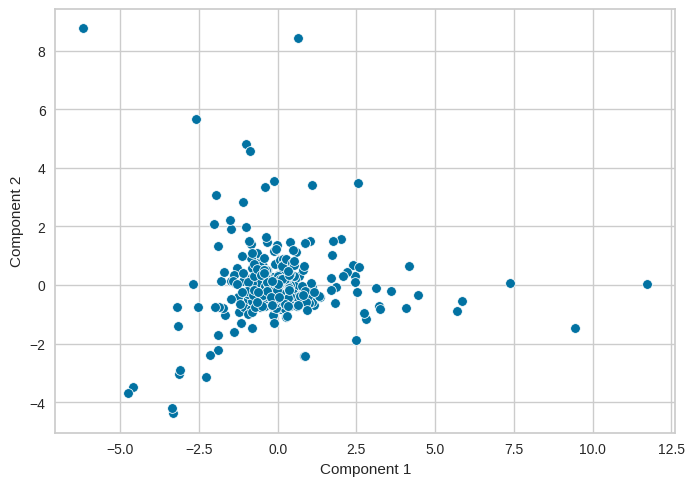

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- It is difficult to see the two clusters it seperated; which would explain the only 37% of the variance in the data.  
- We can see there is a major cluster of data around (0,0). This highlights the large clusters in each K-means and Hierarchical clusters (K-means cluster 0 with 270 companies, and Hierarchical cluster 3 with 285 companies.

Now, let's colour the scatterplot to identify the location of the other clusters to better help demonstrate the cluster groups.

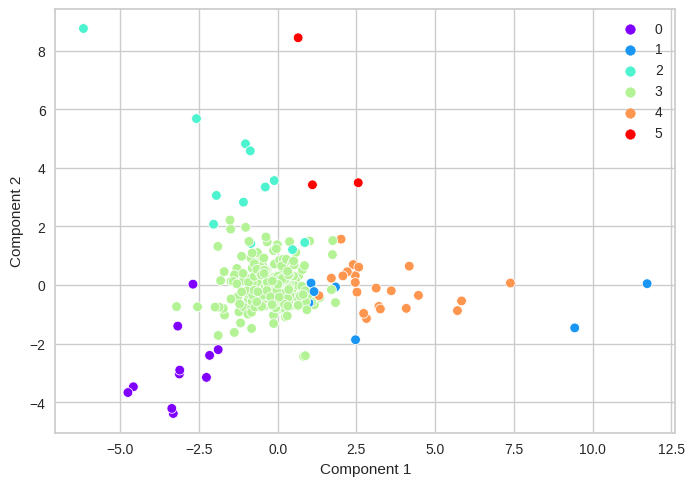

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df3["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1));

**According to this distribution between component 1 and 2**
- The majority of the companies are in cluster 3; which goes with our previous explanations.  
- The other clusters seem to be relatively close together with their own clusters (low variability).
- Cluster 1 seems like it could have been split into two more clustes, which is probably because of the two energy companies which got cluster togethered in the K-means and then grouped with five other companies through hierarchical clustering.  

___